In [122]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Requirements.txt as a cell
!pip install numpy==1.24.4 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.12.2 \
scikit-learn==1.2.2 shap==0.42.1 lime==0.2.0.1 xgboost==1.7.6 lightgbm==3.3.5 \
--trusted-host pypi.org --trusted-host files.pythonhosted.org


# INDIAN PREMIER LEAGUE DATA ANALYTICS
The Indian Premier League (IPL) is a professional Twenty20 cricket league in India usually contested between March and May of every year by eight teams representing eight different cities or states in India. The league was founded by
the Board of Control for Cricket in India (BCCI) in 2007. The IPL is the most-attended cricket league in the world and the brand value of the IPL in 2019 was ₹475 billion (US$6.7 billion)
### Dataset Exploratory Analysis
#### Dataset link: https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020
#### 2025 Dataset Link used for Predicting and comparision with trained 2008-2024 model: https://www.kaggle.com/datasets/krishd123/ipl-2025-records?select=matches.csv


## Exploratory Data analysis
### Utilises Medallion architecture for understanding, transforming and producing the final dataset used further for Training ML models
#### Medallion architecture contains of Bronze, Silver and Gold Layer of Dataset analysis


### Bronze layer
#### Loading of raw data in notebook, loading of different libraries required

In [123]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly
from plotly.offline import plot, iplot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [124]:
# from google.colab import drive
# drive.mount('/content/drive')

In [125]:
# Load data
matches = pd.read_csv('matches.csv')
# matches = pd.read_csv('/content/drive/MyDrive/DS_Project_files/matches.csv')
deliveries = pd.read_csv('deliveries.csv')
# deliveries = pd.read_csv('/content/drive/MyDrive/DS_Project_files/deliveries.csv')


### Silver layer
#### Understanding, Cleaning, standardizing, filtering dataset

#### Describe Data

In [126]:
print(f"Matches DataFrame shape: {matches.shape} (rows, columns)")
print(f"Deliveries DataFrame shape: {deliveries.shape} (rows, columns)")


Matches DataFrame shape: (1095, 20) (rows, columns)
Deliveries DataFrame shape: (260920, 17) (rows, columns)


In [127]:
matches.head()

id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkata Knight Riders  Royal Challengers Bangalore         field   
1          Chennai Super Kings          Chennai Super Kings           bat   
2             Rajasthan Royals             Rajasthan Royals           bat   
3  Royal Challengers Bangalore               Mumbai Indians           bat   
4              Deccan Chargers              Deccan Chargers           bat   

                        winner   result  result_margin  target_runs  \
0        Kolkata Knight Riders     runs          140.0        223.0   
1          Chennai Super Kings     runs           33.0        241.0   
2             Delhi Daredevils  wickets            9.0        130.0   
3  Royal Challengers Bangalore  wickets            5.0        166.0   
4        Kolkata Knight Riders  wickets            5.0        111.0   

   target_overs super_over method    umpire1         umpire2  
0          20.0          N    NaN  Asad Rauf     RE Koertzen  
1          20.0          N    NaN  MR Benson      SL Shastri  
2          20.0          N    NaN  Aleem Dar  GA Pratapkumar  
3          20.0          N    NaN   SJ Davis       DJ Harper  
4          20.0          N    NaN  BF Bowden     K Hariharan

In [128]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [129]:
deliveries.head()

match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0           1     legbyes          0              NaN            NaN     NaN  
1           0         NaN          0              NaN            NaN     NaN  
2           1       wides          0              NaN            NaN     NaN  
3           0         NaN          0              NaN            NaN     NaN  
4           0         NaN          0              NaN            NaN     NaN

In [130]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [131]:
matches.describe()

id  result_margin  target_runs  target_overs
count  1.095000e+03    1076.000000  1092.000000   1092.000000
mean   9.048283e+05      17.259294   165.684066     19.759341
std    3.677402e+05      21.787444    33.427048      1.581108
min    3.359820e+05       1.000000    43.000000      5.000000
25%    5.483315e+05       6.000000   146.000000     20.000000
50%    9.809610e+05       8.000000   166.000000     20.000000
75%    1.254062e+06      20.000000   187.000000     20.000000
max    1.426312e+06     146.000000   288.000000     20.000000

In [132]:
matches.describe(include='object')

season    city        date match_type player_of_match         venue  \
count    1095    1044        1095       1095            1090          1095   
unique     17      36         823          8             291            58   
top      2013  Mumbai  2017-04-09     League  AB de Villiers  Eden Gardens   
freq       76     173           2       1029              25            77   

                              team1           team2     toss_winner  \
count                          1095            1095            1095   
unique                           19              19              19   
top     Royal Challengers Bangalore  Mumbai Indians  Mumbai Indians   
freq                            135             138             143   

       toss_decision          winner   result super_over method       umpire1  \
count           1095            1090     1095       1095     21          1095   
unique             2              19        4          2      1            62   
top            field  Mumbai Indians  wickets          N    D/L  AK Chaudhary   
freq             704             144      578       1081     21           115   

       umpire2  
count     1095  
unique      62  
top     S Ravi  
freq        83

In [133]:
deliveries.describe()

match_id         inning           over           ball  \
count  2.609200e+05  260920.000000  260920.000000  260920.000000   
mean   9.070665e+05       1.483531       9.197677       3.624486   
std    3.679913e+05       0.502643       5.683484       1.814920   
min    3.359820e+05       1.000000       0.000000       1.000000   
25%    5.483340e+05       1.000000       4.000000       2.000000   
50%    9.809670e+05       1.000000       9.000000       4.000000   
75%    1.254066e+06       2.000000      14.000000       5.000000   
max    1.426312e+06       6.000000      19.000000      11.000000   

        batsman_runs     extra_runs     total_runs      is_wicket  
count  260920.000000  260920.000000  260920.000000  260920.000000  
mean        1.265001       0.067806       1.332807       0.049632  
std         1.639298       0.343265       1.626416       0.217184  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         1.000000       0.000000       1.000000       0.000000  
75%         1.000000       0.000000       1.000000       0.000000  
max         6.000000       7.000000       7.000000       1.000000

In [134]:
deliveries.describe(include='object')

batting_team    bowling_team   batter    bowler non_striker  \
count           260920          260920   260920    260920      260920   
unique              19              19      673       530         663   
top     Mumbai Indians  Mumbai Indians  V Kohli  R Ashwin     V Kohli   
freq             31437           31505     6236      4679        6067   

       extras_type player_dismissed dismissal_kind   fielder  
count        14125            12950          12950      9354  
unique           5              629             10       607  
top          wides        RG Sharma         caught  MS Dhoni  
freq          8380              223           8063       220

In [135]:
# Date to Year for better EDA
matches['year'] = pd.to_datetime(matches['date']).dt.year

#### Explore Data

##### Explore Data related with Matches

In [136]:
#Number of Matches Played
total_matches = matches.shape[0]
print(f"Total matches played: {total_matches}")

Total matches played: 1095


In [137]:
#Number of Seasons Played
print(f"The dataset includes {matches['season'].nunique()} unique IPL seasons.")

The dataset includes 17 unique IPL seasons.


In [138]:
#Total number of players
all_players = pd.concat([deliveries['batter'], deliveries['non_striker'], deliveries['bowler']])
total_players = all_players.nunique()
print(f"Total number of players: {total_players}")

Total number of players: 732


Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Name: winner, dtype: int64


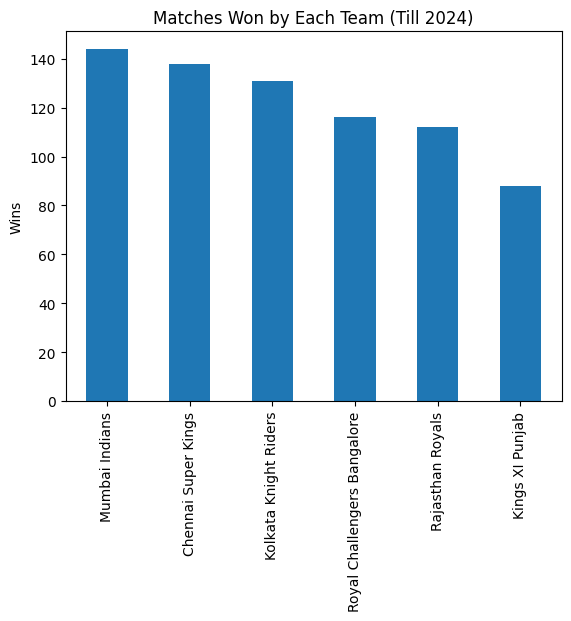

In [139]:
#Maximum number of matches won by each team till 2024
team_wins = matches['winner'].value_counts()[0:6]
print(team_wins)
team_wins.plot(kind='bar', title='Matches Won by Each Team (Till 2024)')
plt.ylabel('Wins')
plt.show()

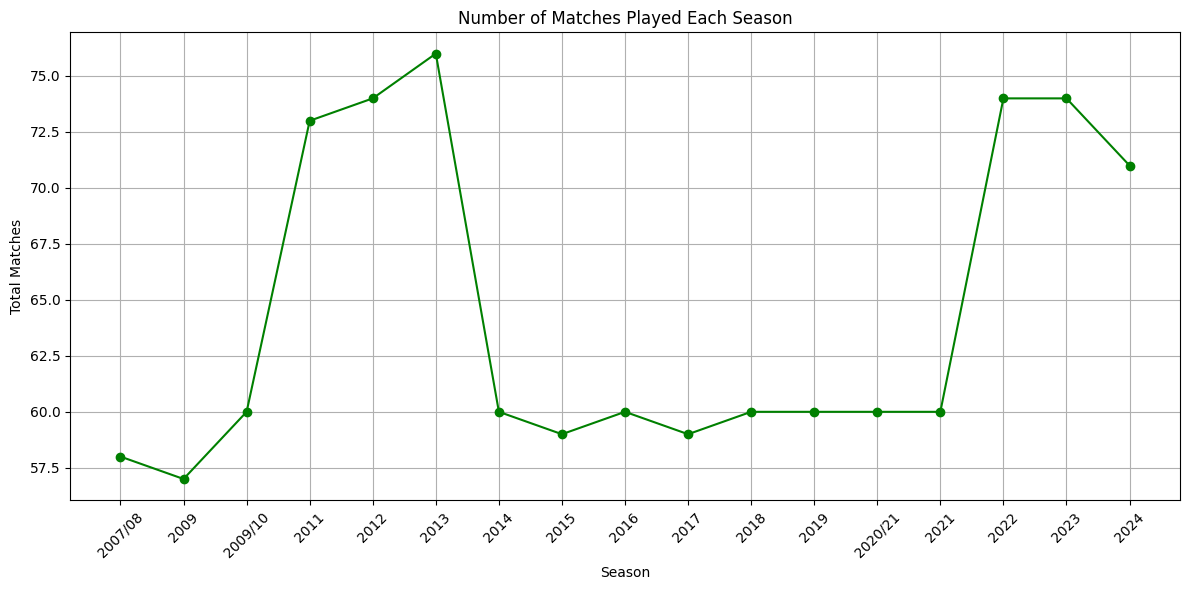

In [140]:
matches_per_season = matches.groupby('season').size().reset_index(name='Total Matches')

# Step 2: Plotting as a line chart
plt.figure(figsize=(12, 6))
plt.plot(matches_per_season['season'], matches_per_season['Total Matches'], marker='o', linestyle='-', color='green')
plt.title('Number of Matches Played Each Season')
plt.xlabel('Season')
plt.ylabel('Total Matches')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Super Over Matches Each Year:
   year  Super Overs
0  2009            1
1  2010            1
2  2013            2
3  2014            1
4  2015            1
5  2017            1
6  2019            2
7  2020            4
8  2021            1


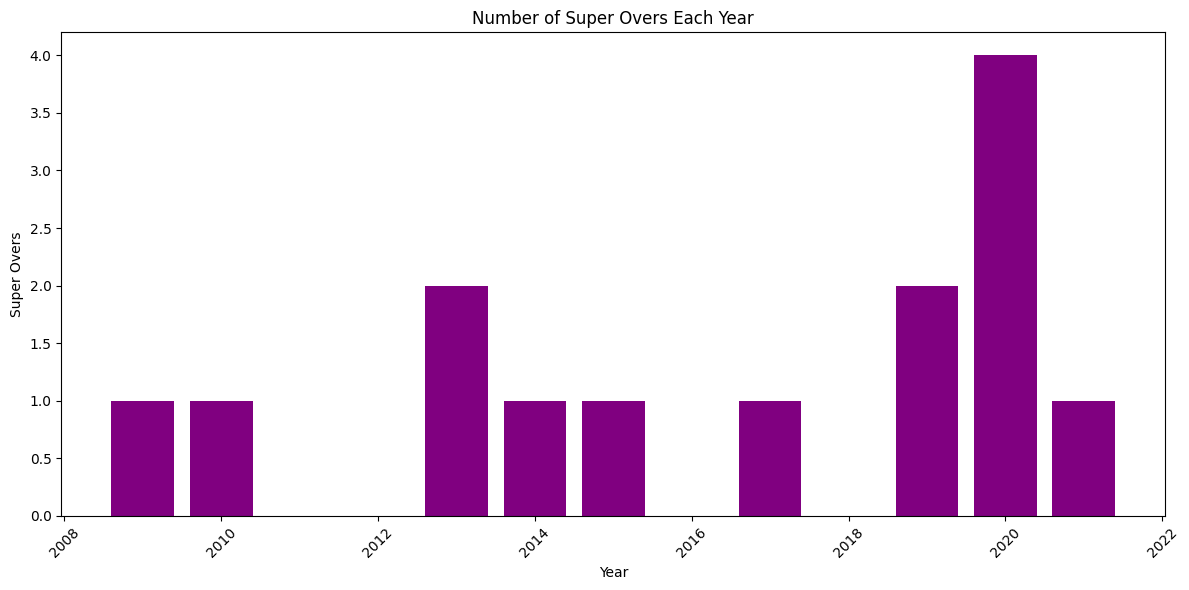

In [141]:
# Super over typically starts from 3rd inning onwards
super_over_ids = deliveries[deliveries['inning'] > 2]['match_id'].unique()
super_over_matches = matches[matches['id'].isin(super_over_ids)]
super_over_per_year = super_over_matches.groupby('year').size().reset_index(name='Super Overs')
print("Super Over Matches Each Year:")
print(super_over_per_year)
# Plotting Super Overs per Year
plt.figure(figsize=(12, 6))
plt.bar(super_over_per_year['year'], super_over_per_year['Super Overs'], color='purple')
plt.title('Number of Super Overs Each Year')
plt.xlabel('Year')
plt.ylabel('Super Overs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [142]:
# Additional: Total number of unique venues
unique_venues = matches['venue'].nunique()
print(f"Total number of unique venues IPL matches were played at: {unique_venues}")

Total number of unique venues IPL matches were played at: 58


Matches played in each venue:
Eden Gardens                                  77
Wankhede Stadium                              73
M Chinnaswamy Stadium                         65
Feroz Shah Kotla                              60
Rajiv Gandhi International Stadium, Uppal     49
MA Chidambaram Stadium, Chepauk               48
Sawai Mansingh Stadium                        47
Dubai International Cricket Stadium           46
Wankhede Stadium, Mumbai                      45
Punjab Cricket Association Stadium, Mohali    35
Name: venue, dtype: int64


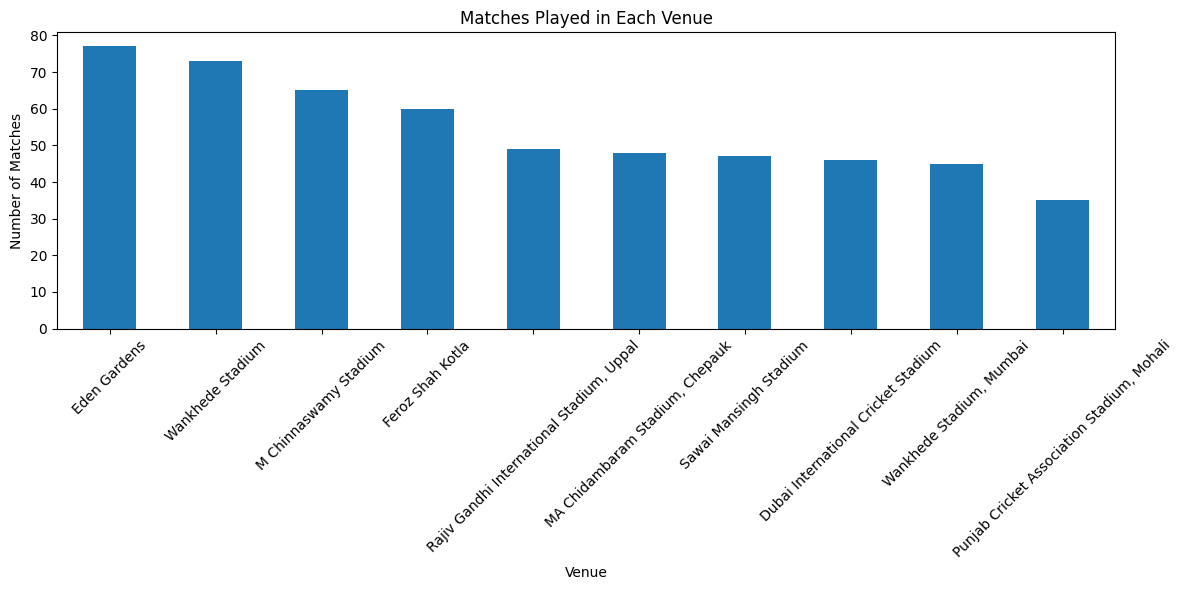

In [143]:
#Matches played in each venue
df_venue_counts = matches['venue'].value_counts().head(10)
print("Matches played in each venue:")
print(df_venue_counts)
# Plotting the number of matches played in each venue
plt.figure(figsize=(12, 6))
df_venue_counts.plot(kind='bar', title='Matches Played in Each Venue')
plt.ylabel('Number of Matches')
plt.xlabel('Venue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [144]:
#Number of matches won after winning the toss
won_after_toss_count = matches[matches['toss_winner'] == matches['winner']].shape[0]
print(f"number of matches won after winning the toss {won_after_toss_count}")

number of matches won after winning the toss 554


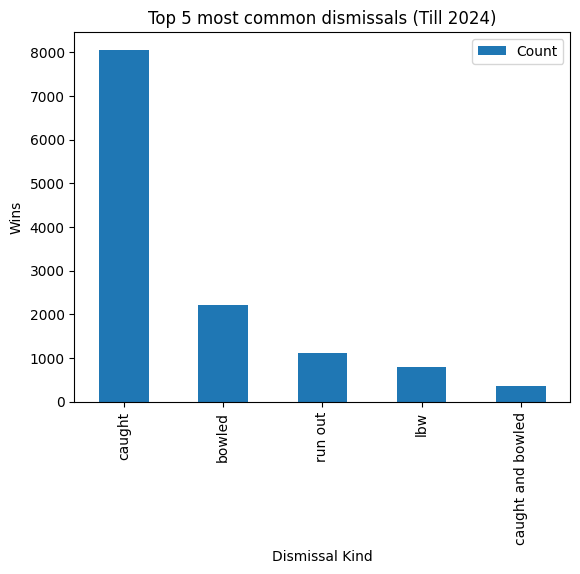

Top 5 most common dismissals:
      Dismissal Kind  Count
0             caught   8063
1             bowled   2212
2            run out   1114
3                lbw    800
4  caught and bowled    367


In [145]:
# Top 5 most commom dissmissals
top_5_dismissals_df = deliveries['dismissal_kind'].value_counts().dropna().head(5).reset_index()
top_5_dismissals_df.columns = ['Dismissal Kind', 'Count']
top_5_dismissals_df.plot(kind='bar', title='Top 5 most common dismissals (Till 2024)',x='Dismissal Kind',y='Count')
plt.xlabel('Dismissal Kind')
plt.ylabel('Wins')
plt.show()
print("Top 5 most common dismissals:")
print(top_5_dismissals_df)

Number of players played each season:
     Season  Unique Players
0   2007/08             154
1      2009             150
2   2009/10             164
3      2011             180
4      2012             170
5      2013             172
6      2014             133
7      2015             129
8      2016             136
9      2017             143
10     2018             138
11     2019             144
12  2020/21             133
13     2021             149
14     2022             174
15     2023             177
16     2024             171


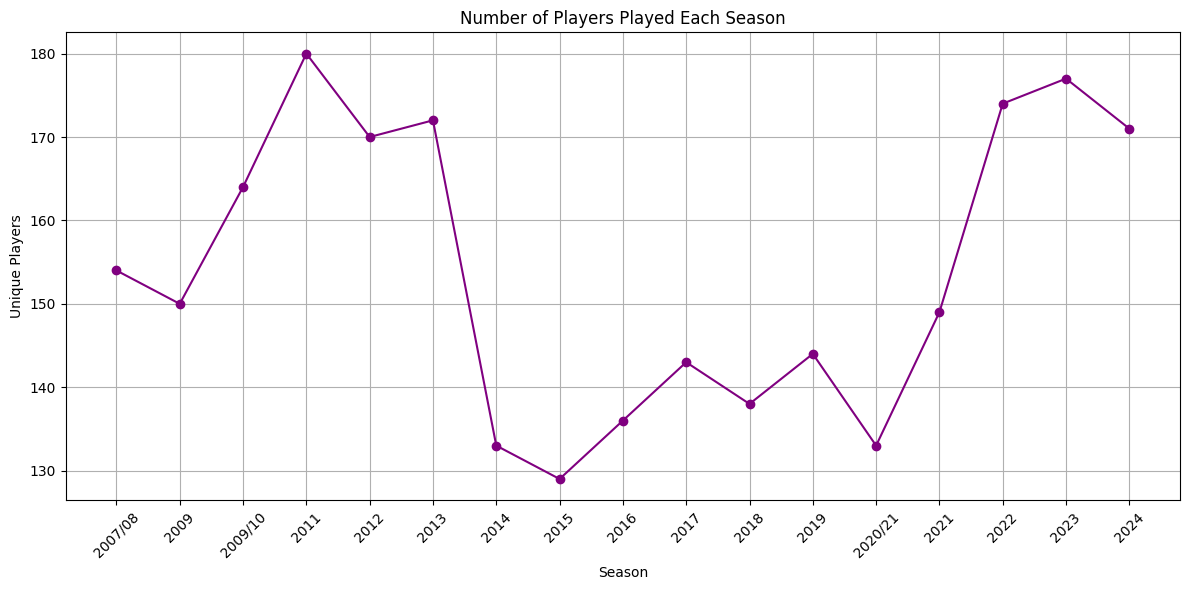

In [146]:
#Number of players played each season
players_each_season_df = (
    matches[['id', 'season']]
    .merge(deliveries[['match_id', 'batter']], left_on='id', right_on='match_id')
    .groupby('season')['batter'].nunique()
    .reset_index()
)
players_each_season_df.columns = ['Season', 'Unique Players']
print("Number of players played each season:")
print(players_each_season_df)
plt.figure(figsize=(12, 6))
plt.plot(players_each_season_df['Season'], players_each_season_df['Unique Players'], marker='o', linestyle='-', color='purple')
plt.title('Number of Players Played Each Season')
plt.xlabel('Season')
plt.ylabel('Unique Players')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Total Runs Scored Each Season:
     Season  Total Runs
0   2007/08       17937
1      2009       16353
2   2009/10       18883
3      2011       21154
4      2012       22453
5      2013       22602
6      2014       18931
7      2015       18353
8      2016       18862
9      2017       18786
10     2018       19901
11     2019       19434
12  2020/21       19416
13     2021       18637
14     2022       24395
15     2023       25688
16     2024       25971


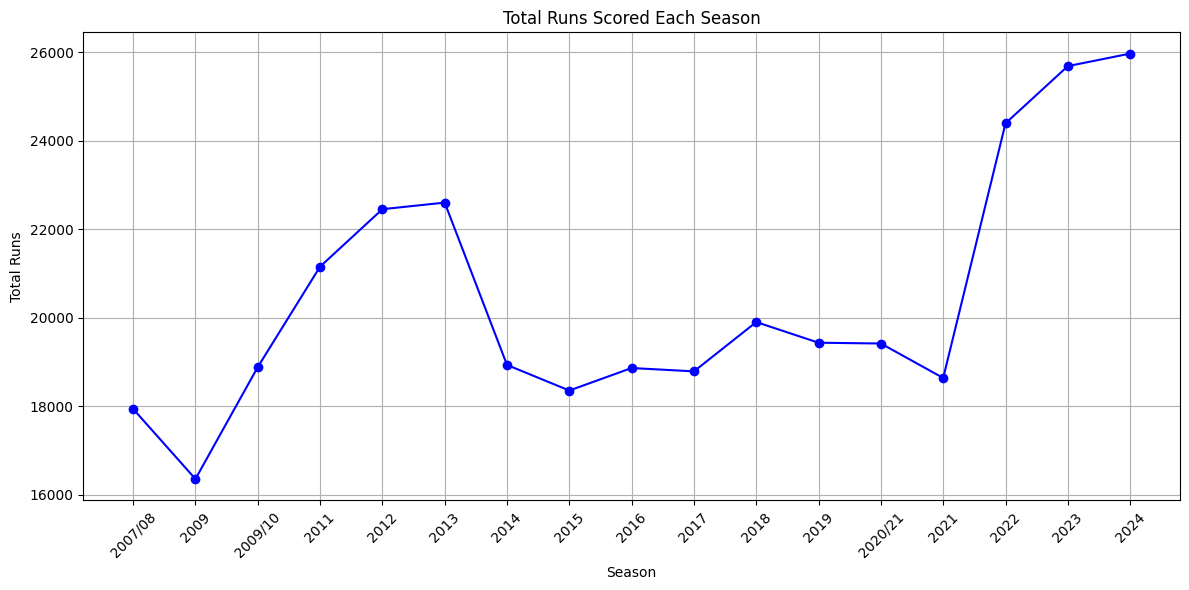

In [147]:
#Total runs scored each season
season_map = matches.set_index('id')['season'].to_dict()

deliveries['season'] = deliveries['match_id'].map(season_map)

seasonal_runs = deliveries.groupby('season')['total_runs'].sum().reset_index()
seasonal_runs.columns = ['Season', 'Total Runs']

print("Total Runs Scored Each Season:")
print(seasonal_runs)
plt.figure(figsize=(12, 6))
plt.plot(seasonal_runs['Season'], seasonal_runs['Total Runs'], marker='o', linestyle='-', color='blue')
plt.title('Total Runs Scored Each Season')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

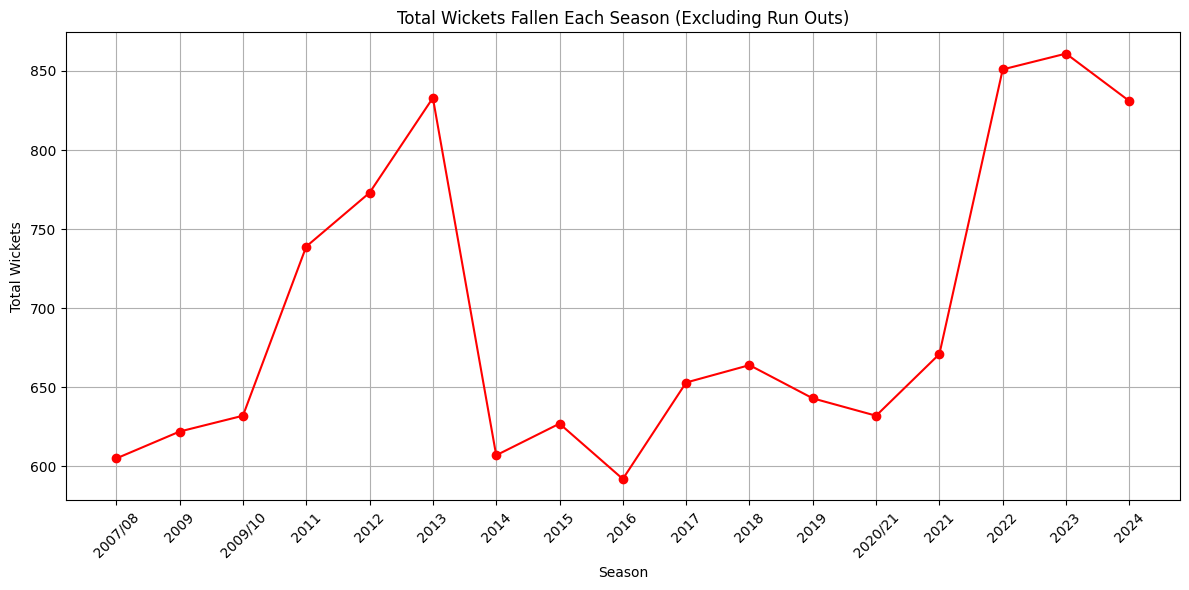

In [148]:
#most number of wickets
season_map = matches.set_index('id')['season'].to_dict()

deliveries['season'] = deliveries['match_id'].map(season_map)

valid_wickets = deliveries[
    (deliveries['is_wicket'] == 1) &
    (deliveries['dismissal_kind'] != 'run out')
]

wickets_per_season = valid_wickets.groupby('season').size().reset_index(name='Total Wickets')

wickets_per_season.sort_values('season')
# Plotting the total wickets taken each season
plt.figure(figsize=(12, 6))
plt.plot(wickets_per_season['season'], wickets_per_season['Total Wickets'], marker='o', linestyle='-', color='red')
plt.title('Total Wickets Fallen Each Season (Excluding Run Outs)')
plt.xlabel('Season')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### Explore Data related with Players (Batsman, Bowler & All-Rounder)

In [149]:
#Number of Batsmen
batsmen = deliveries['batter'].nunique()
print(f"Number of Batsmen: {batsmen}")

Number of Batsmen: 673


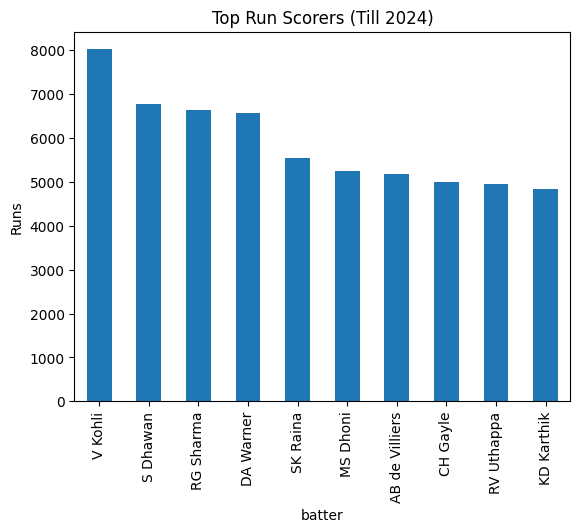

In [150]:
#Most runs by a player till 2024
top_batters = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
top_batters.plot(kind='bar', title='Top Run Scorers (Till 2024)')
plt.ylabel('Runs')
plt.show()

Top scorer each year:
      year         batter  batsman_runs
115   2008       SE Marsh           616
229   2009      ML Hayden           572
446   2010   SR Tendulkar           618
502   2011       CH Gayle           608
684   2012       CH Gayle           733
910   2013     MEK Hussey           733
1088  2014     RV Uthappa           660
1148  2015      DA Warner           562
1383  2016        V Kohli           973
1422  2017      DA Warner           641
1594  2018  KS Williamson           735
1694  2019      DA Warner           692
1866  2020       KL Rahul           676
2051  2021     RD Gaikwad           635
2144  2022     JC Buttler           863
2423  2023   Shubman Gill           890
2606  2024        V Kohli           741


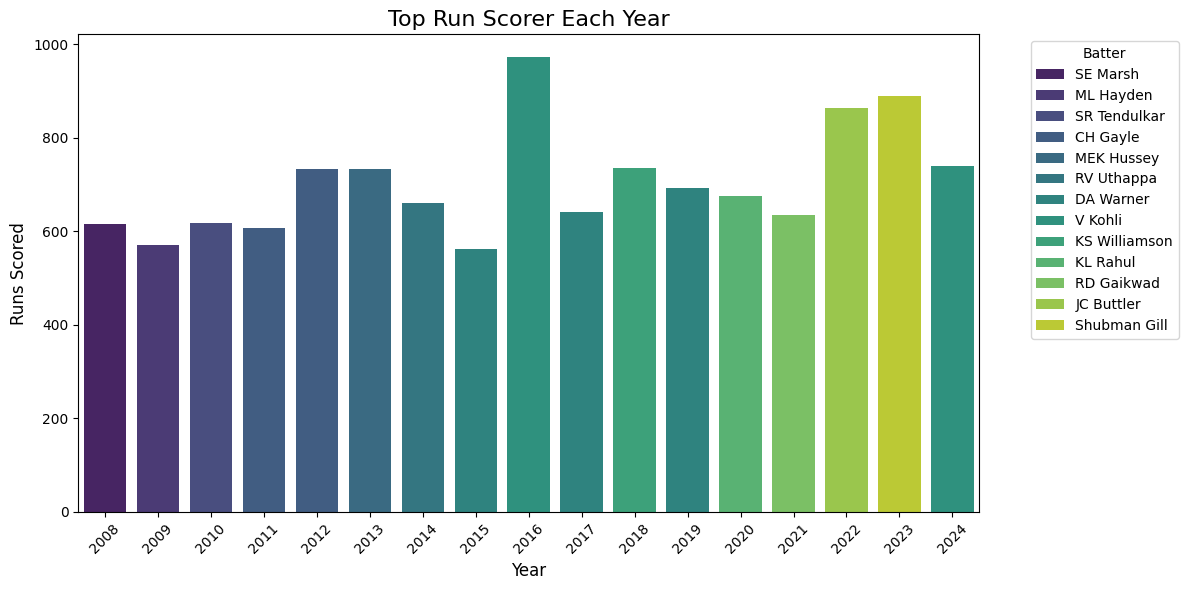

In [151]:
#Highest run scorer each year
deliveries_with_year = deliveries.merge(matches[['id', 'year']], left_on='match_id', right_on='id')
yearly_batters = deliveries_with_year.groupby(['year', 'batter'])['batsman_runs'].sum().reset_index()
top_each_year = yearly_batters.sort_values(['year', 'batsman_runs'], ascending=[True, False]).groupby('year').head(1)
print("Top scorer each year:")
print(top_each_year)

# Plotting the top run scorer each year
plt.figure(figsize=(12, 6))
sns.barplot(data=top_each_year, x='year', y='batsman_runs', hue='batter', dodge=False, palette='viridis')

plt.title('Top Run Scorer Each Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Runs Scored', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Batter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Top strike rates (min 15 matches with min 10 balls each):
             batter  total_runs  total_balls  matches_played  strike_rate
464         TM Head         737          419              15   175.894988
424       SP Narine        1223          698              34   175.214900
27       AD Russell        2315         1346              68   171.991085
459        TH David         587          349              21   168.194842
156       H Klaasen         928          563              23   164.831261
237  LS Livingstone         856          526              23   162.737643
295        N Pooran        1646         1020              46   161.372549
91        CH Morris         428          268              16   159.701493
152      GJ Maxwell        2500         1578              68   158.428390
326      PJ Cummins         421          266              15   158.270677


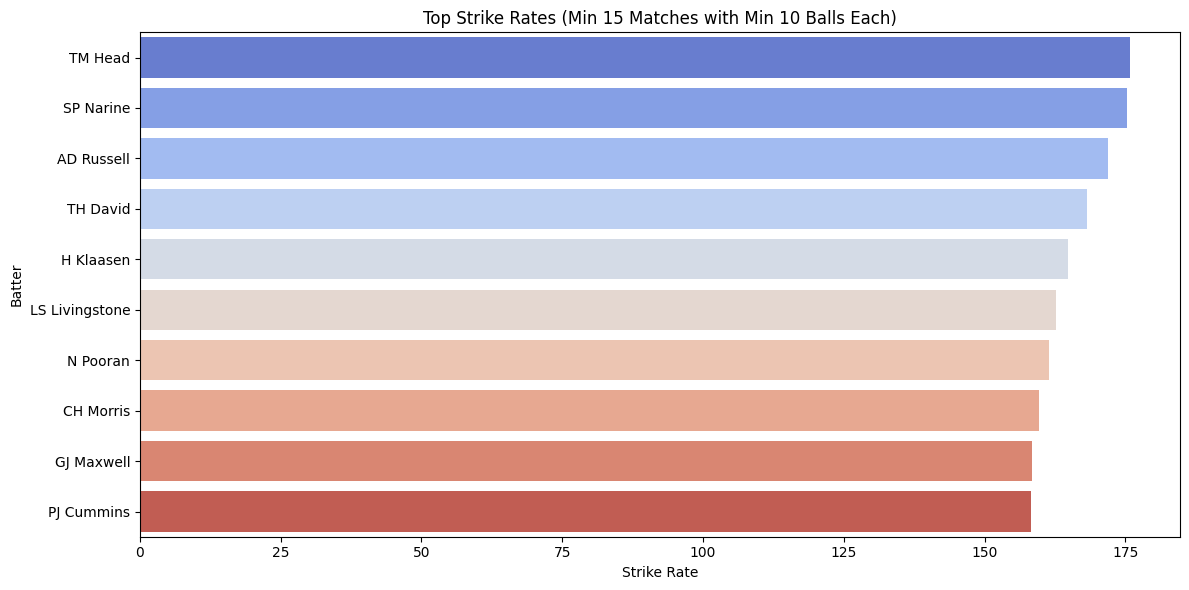

In [152]:
#Batter strike rate with at least 15 matches and 10+ balls faced per match
deliveries_with_year['ball_count'] = 1
batter_match_stats = deliveries_with_year.groupby(['batter', 'match_id']).agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('ball_count', 'sum')
).reset_index()

batter_match_stats = batter_match_stats[batter_match_stats['balls_faced'] >= 10]

qualified_matches = batter_match_stats.groupby('batter').size().reset_index(name='matches_played')

total_stats = batter_match_stats.groupby('batter').agg(
    total_runs=('total_runs', 'sum'),
    total_balls=('balls_faced', 'sum')
).reset_index()

batter_sr = pd.merge(total_stats, qualified_matches, on='batter')
batter_sr = batter_sr[batter_sr['matches_played'] >= 15]
batter_sr['strike_rate'] = (batter_sr['total_runs'] / batter_sr['total_balls']) * 100
print("Top strike rates (min 15 matches with min 10 balls each):")
print(batter_sr.sort_values('strike_rate', ascending=False).head(10))
# Plotting the top strike rates
plt.figure(figsize=(12, 6))
sns.barplot(data=batter_sr.sort_values('strike_rate', ascending=False).head(10), x='strike_rate', y='batter', palette='coolwarm')
plt.title('Top Strike Rates (Min 15 Matches with Min 10 Balls Each)')
plt.xlabel('Strike Rate')
plt.ylabel('Batter')
plt.tight_layout()
plt.show()

Top 10 Most Consistent Batters (Min 50 Matches):
           batter       mean        std  count  consistency_score
454      R Dravid  26.512195  19.519692     82           1.358228
470     RA Jadeja  16.438889  12.434932    180           1.321993
261     JP Duminy  27.053333  20.466118     75           1.321860
563  SR Tendulkar  29.923077  22.656537     78           1.320726
188  F du Plessis  33.123188  25.326900    138           1.307826
289      KL Rahul  38.434426  29.442755    122           1.305395
562     SPD Smith  26.827957  20.652205     93           1.299036
374      MS Dhoni  22.995614  18.281812    228           1.257841
542      SE Marsh  36.072464  29.014864     69           1.243241
490       RR Pant  29.972727  24.226931    110           1.237166


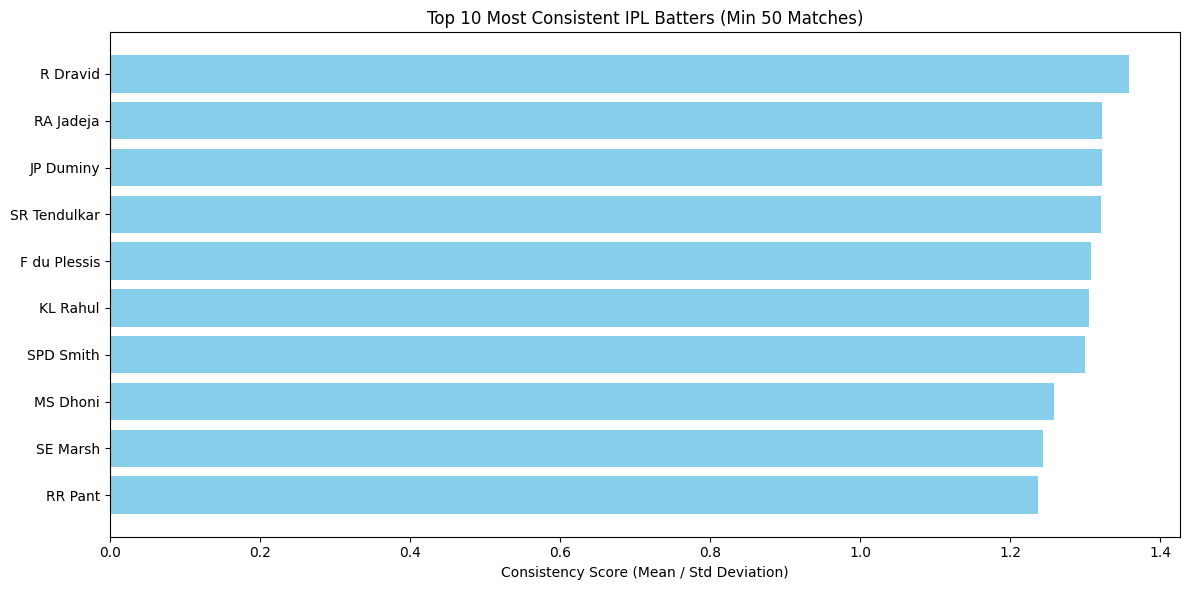

In [153]:
# Most consistent IPL batters with at least 50 matches played

batter_scores = deliveries.groupby(['batter', 'match_id'])['batsman_runs'].sum().reset_index()

batter_summary = batter_scores.groupby('batter')['batsman_runs'].agg(['mean', 'std', 'count']).reset_index()

batter_summary_50 = batter_summary[batter_summary['count'] >= 50]

batter_summary_50['consistency_score'] = batter_summary_50['mean'] / batter_summary_50['std']
most_consistent_50 = batter_summary_50.sort_values('consistency_score', ascending=False).head(10)

print("Top 10 Most Consistent Batters (Min 50 Matches):")
print(most_consistent_50[['batter', 'mean', 'std', 'count', 'consistency_score']])

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.barh(most_consistent_50['batter'], most_consistent_50['consistency_score'], color='skyblue')
plt.xlabel('Consistency Score (Mean / Std Deviation)')
plt.title('Top 10 Most Consistent IPL Batters (Min 50 Matches)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Elite IPL Finishers in Death Overs (16–20):

             batter  batsman_runs  ball  strike_rate  matches_played
27   AB de Villiers          1868   867   215.455594             170
444         RR Pant           923   480   192.291667             110
109        CH Gayle           581   304   191.118421             141
217      JC Buttler           596   319   186.833856             106
515       SV Samson           780   430   181.395349             162
34       AD Russell          1324   739   179.161028             104
567         V Kohli          1469   824   178.276699             244
551        TH David           540   308   175.324675              35


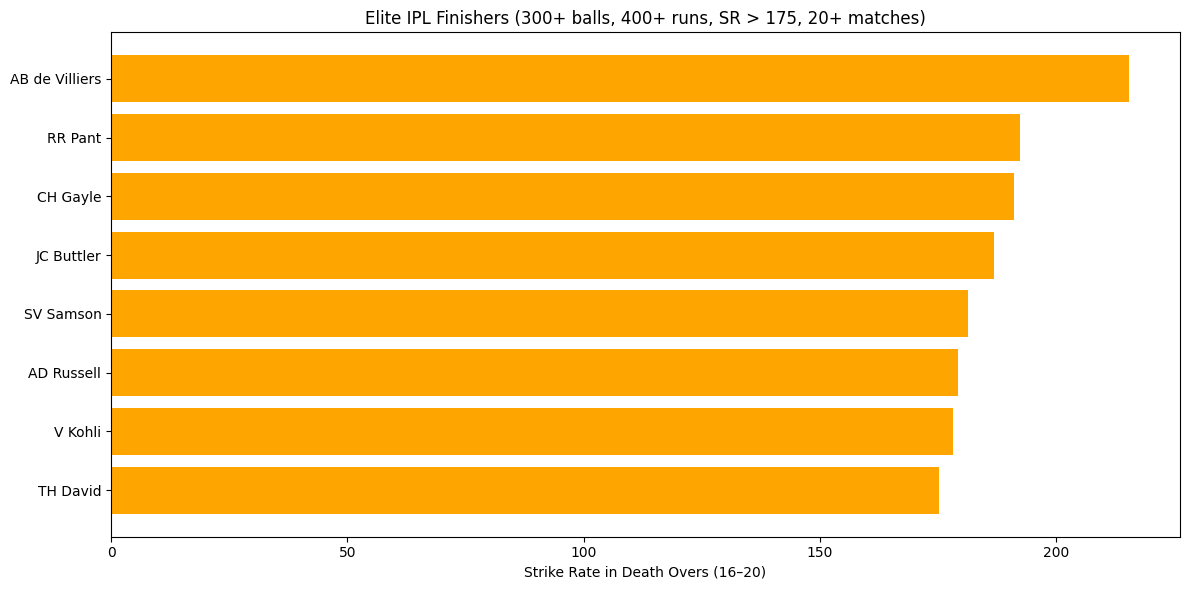

In [154]:
# Best IPL finishers in death overs (16–20) with specific criteria

batter_matches = deliveries.groupby('batter')['match_id'].nunique().reset_index(name='matches_played')

death_overs = deliveries[deliveries['over'] >= 15]

death_stats = death_overs.groupby('batter').agg({
    'batsman_runs': 'sum',
    'ball': 'count'
}).reset_index()

death_stats['strike_rate'] = (death_stats['batsman_runs'] / death_stats['ball']) * 100


death_stats = pd.merge(death_stats, batter_matches, on='batter', how='left')

elite_finishers = death_stats[
    (death_stats['ball'] >= 300) &
    (death_stats['strike_rate'] > 175) &
    (death_stats['batsman_runs'] > 400) &
    (death_stats['matches_played'] > 20)
]

elite_finishers_sorted = elite_finishers.sort_values('strike_rate', ascending=False)


print("Elite IPL Finishers in Death Overs (16–20):\n")
print(elite_finishers_sorted[['batter', 'batsman_runs', 'ball', 'strike_rate', 'matches_played']])

plt.figure(figsize=(12, 6))
plt.barh(elite_finishers_sorted['batter'], elite_finishers_sorted['strike_rate'], color='orange')
plt.xlabel('Strike Rate in Death Overs (16–20)')
plt.title('Elite IPL Finishers (300+ balls, 400+ runs, SR > 175, 20+ matches)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


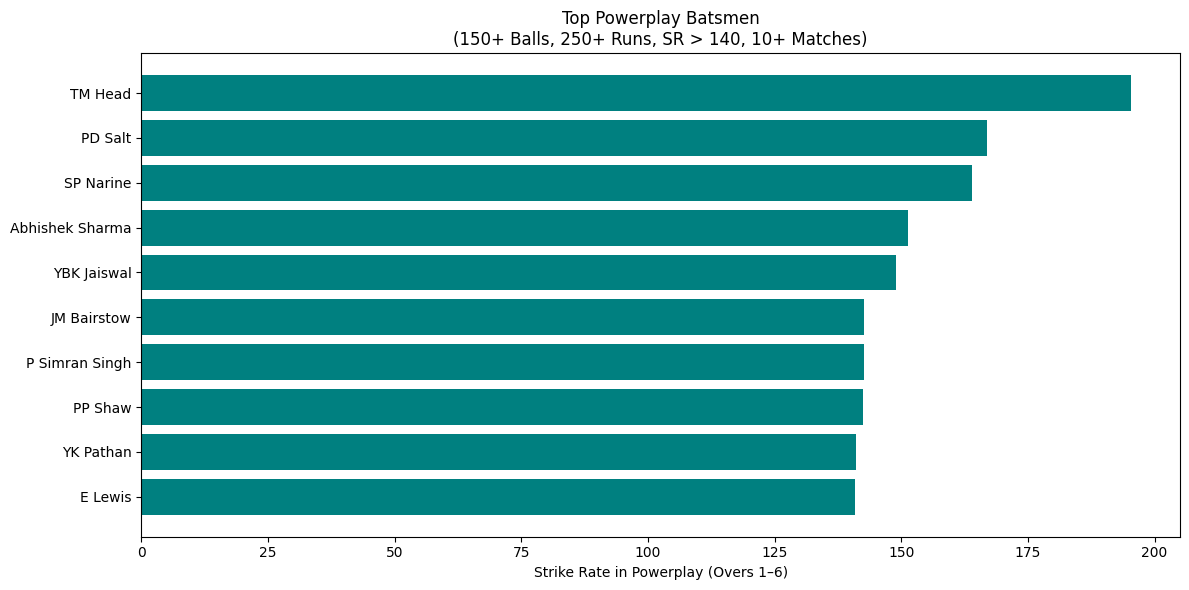

In [155]:
# Top players # in powerplay overs (1–6) with specific criteria
batter_matches = deliveries.groupby('batter')['match_id'].nunique().reset_index(name='matches_played')

powerplay = deliveries[deliveries['over'] < 6]

pp_stats = powerplay.groupby('batter').agg({
    'batsman_runs': 'sum',
    'ball': 'count'
}).reset_index()

pp_stats['strike_rate'] = (pp_stats['batsman_runs'] / pp_stats['ball']) * 100

pp_stats = pd.merge(pp_stats, batter_matches, on='batter', how='left')

# - Min 200 balls faced
# - Min 400 runs
# - Strike rate > 175
# - Min 25 matches
pp_top_filtered = pp_stats[
    (pp_stats['ball'] >= 150) &
    (pp_stats['batsman_runs'] > 250) &
    (pp_stats['strike_rate'] > 140) &
    (pp_stats['matches_played'] > 10)
]

pp_top_10 = pp_top_filtered.sort_values('strike_rate', ascending=False).head(10)

pp_top_10[['batter', 'batsman_runs', 'ball', 'strike_rate', 'matches_played']]

plt.figure(figsize=(12, 6))
plt.barh(pp_top_10['batter'], pp_top_10['strike_rate'], color='teal')
plt.xlabel('Strike Rate in Powerplay (Overs 1–6)')
plt.title('Top Powerplay Batsmen\n(150+ Balls, 250+ Runs, SR > 140, 10+ Matches)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



In [156]:
# Count of 4s and 6s
num_fours = deliveries[deliveries['batsman_runs'] == 4].shape[0]
num_sixes = deliveries[deliveries['batsman_runs'] == 6].shape[0]

print(f"Total number of fours hit: {num_fours}")
print(f"Total number of sixes hit: {num_sixes}")


Total number of fours hit: 29850
Total number of sixes hit: 13051


Top six-hitting batter per season:

    year           batter  Sixes
0   2008    ST Jayasuriya     31
1   2009     AC Gilchrist     29
2   2010       RV Uthappa     27
3   2011         CH Gayle     44
4   2012         CH Gayle     59
5   2013         CH Gayle     52
6   2014       GJ Maxwell     36
7   2015         CH Gayle     38
8   2016          V Kohli     38
9   2017        DA Warner     26
10  2018          RR Pant     37
11  2019       AD Russell     52
12  2020     Ishan Kishan     30
13  2021         KL Rahul     30
14  2022       JC Buttler     45
15  2023     F du Plessis     36
16  2024  Abhishek Sharma     42


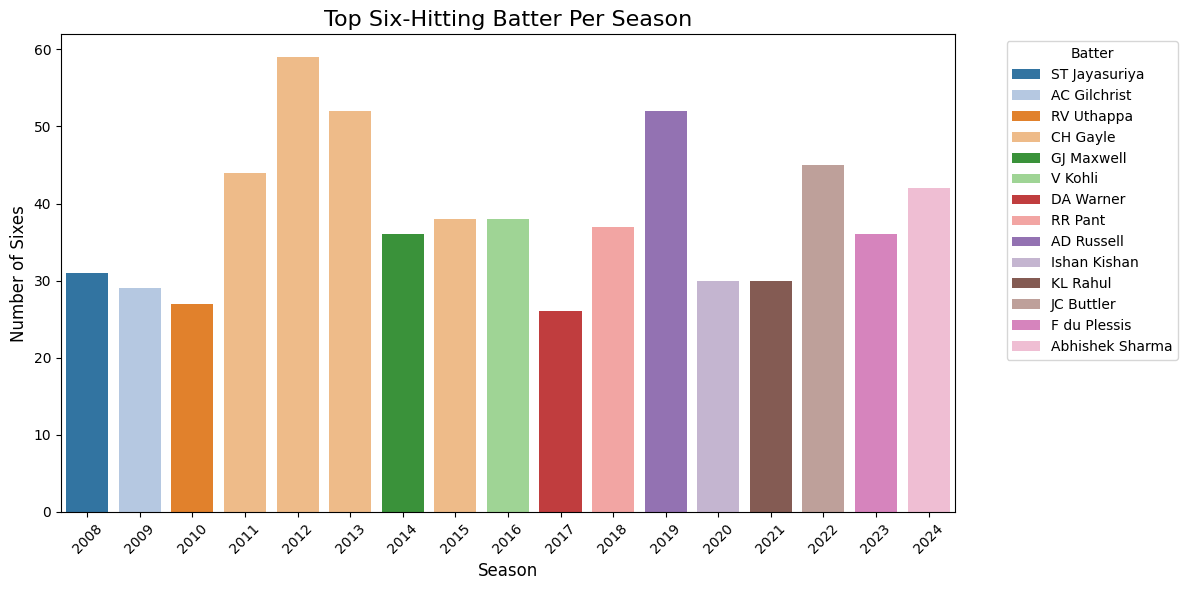

In [157]:
#Most sixes hit by a player in each season
sixes = deliveries_with_year[deliveries_with_year['batsman_runs'] == 6]

sixes_per_batter = sixes.groupby(['year', 'batter']).size().reset_index(name='Sixes')
top_six_hitters = sixes_per_batter.sort_values(['year', 'Sixes'], ascending=[True, False]) \
                                   .groupby('year').head(1).reset_index(drop=True)

print("Top six-hitting batter per season:\n")
print(top_six_hitters)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_six_hitters, x='year', y='Sixes', hue='batter', dodge=False, palette='tab20')


plt.title("Top Six-Hitting Batter Per Season", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Sixes", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Batter", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Top four-hitting batter per season:

    year        batter  Fours
0   2008     G Gambhir     68
1   2009     ML Hayden     60
2   2010  SR Tendulkar     86
3   2011  SR Tendulkar     67
4   2012     AM Rahane     73
5   2013    MEK Hussey     81
6   2014    RV Uthappa     74
7   2015     DA Warner     65
8   2016     DA Warner     88
9   2017     DA Warner     63
10  2018       RR Pant     68
11  2019      S Dhawan     64
12  2020      S Dhawan     67
13  2021    RD Gaikwad     64
14  2022    JC Buttler     84
15  2023  Shubman Gill     85
16  2024       TM Head     64


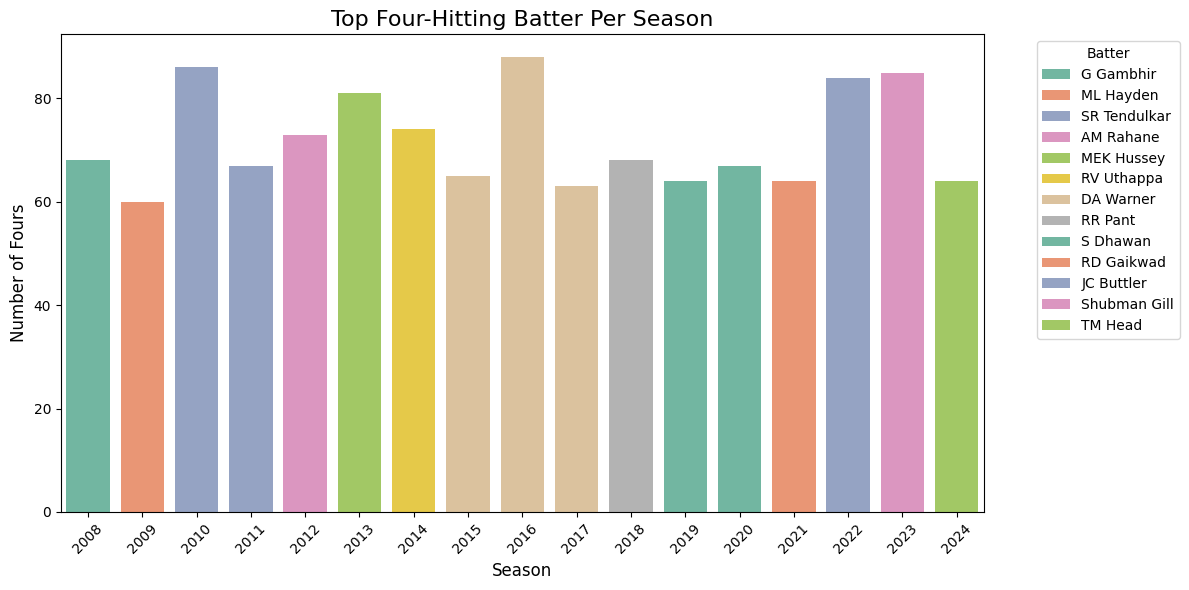

In [158]:
# Most fours hit by a player in each season
fours = deliveries_with_year[deliveries_with_year['batsman_runs'] == 4]

fours_per_batter = fours.groupby(['year', 'batter']).size().reset_index(name='Fours')

top_four_hitters = fours_per_batter.sort_values(['year', 'Fours'], ascending=[True, False]) \
                                   .groupby('year').head(1).reset_index(drop=True)
print("Top four-hitting batter per season:\n")
print(top_four_hitters)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_four_hitters, x='year', y='Fours', hue='batter', dodge=False, palette='Set2')

plt.title("Top Four-Hitting Batter Per Season", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Fours", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Batter", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [159]:
#Number of Bowlers
bowlers = deliveries['bowler'].nunique()
print(f"Number of Bowlers: {bowlers}")

Number of Bowlers: 530


bowler
YS Chahal     213
DJ Bravo      207
PP Chawla     201
SP Narine     200
R Ashwin      198
B Kumar       195
SL Malinga    188
A Mishra      183
JJ Bumrah     182
RA Jadeja     169
dtype: int64


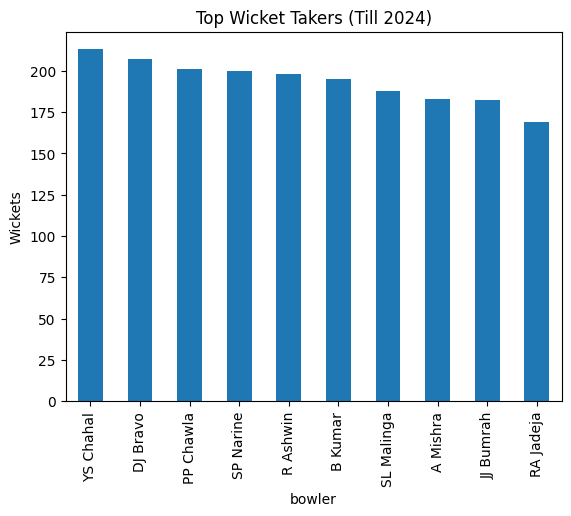

In [160]:
#Most wickets till 2024
wickets = deliveries[deliveries['player_dismissed'].notnull()]
most_wickets = wickets.groupby('bowler').size().sort_values(ascending=False).head(10)
print(most_wickets)
most_wickets.plot(kind='bar', title='Top Wicket Takers (Till 2024)')
plt.ylabel('Wickets')
plt.show()

Top wicket taker each year:
      year         bowler  wickets
77    2008  Sohail Tanvir       24
157   2009       RP Singh       26
248   2010        PP Ojha       22
375   2011     SL Malinga       30
447   2012       M Morkel       30
519   2013       DJ Bravo       34
650   2014      MM Sharma       26
708   2015       DJ Bravo       28
791   2016        B Kumar       24
879   2017        B Kumar       28
962   2018         AJ Tye       28
1077  2019       K Rabada       29
1161  2020       K Rabada       32
1232  2021       HV Patel       35
1402  2022      YS Chahal       29
1469  2023      MM Sharma       31
1542  2024       HV Patel       30


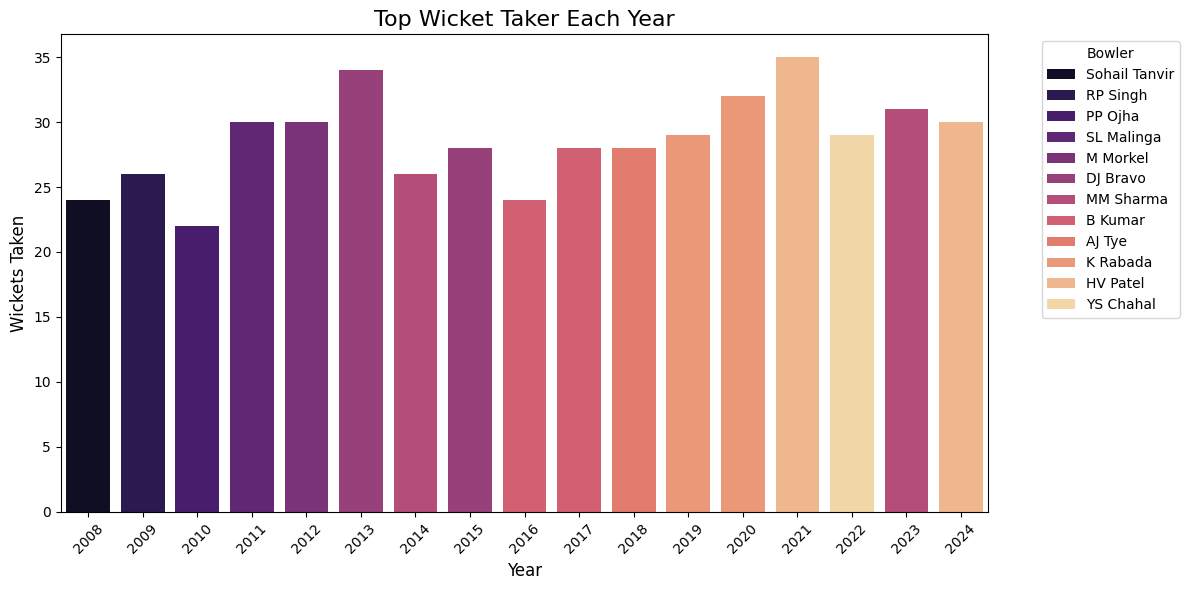

In [161]:
#Highest wicket taker each year
yearly_wickets = deliveries_with_year[deliveries_with_year['player_dismissed'].notnull()]
yearly_wkts = yearly_wickets.groupby(['year', 'bowler']).size().reset_index(name='wickets')
top_wkts_year = yearly_wkts.sort_values(['year', 'wickets'], ascending=[True, False]).groupby('year').head(1)
print("Top wicket taker each year:")
print(top_wkts_year)

# Plotting the top wicket taker each year
plt.figure(figsize=(12, 6))
sns.barplot(data=top_wkts_year, x='year', y='wickets', hue='bowler', dodge=False, palette='magma')

plt.title('Top Wicket Taker Each Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Wickets Taken', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Bowler', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [162]:
#Maximum runs conceded in an over
worst_over = deliveries.groupby(['match_id', 'over', 'bowler'])['total_runs'].sum().reset_index()
worst_over_sorted = worst_over.sort_values(by='total_runs', ascending=False).head(5)
print("Worst overs (max runs conceded):")
print(worst_over_sorted)

Worst overs (max runs conceded):
       match_id  over          bowler  total_runs
32158   1254076    19        HV Patel          37
8581     501247     2  P Parameswaran          37
34286   1304060    15         DR Sams          35
5702     419139    12       RS Bopara          33
17587    734047     5         P Awana          33


Most economical bowlers (min 15 matches):
                   economy
bowler                    
A Kumble          6.646999
M Muralitharan    6.698292
J Yadav           6.738693
SP Narine         6.761216
RE van der Merwe  6.791209
DW Steyn          6.791411
DL Vettori        6.833121
Rashid Khan       6.907963
J Botha           6.922426
MJ Santner        6.940541


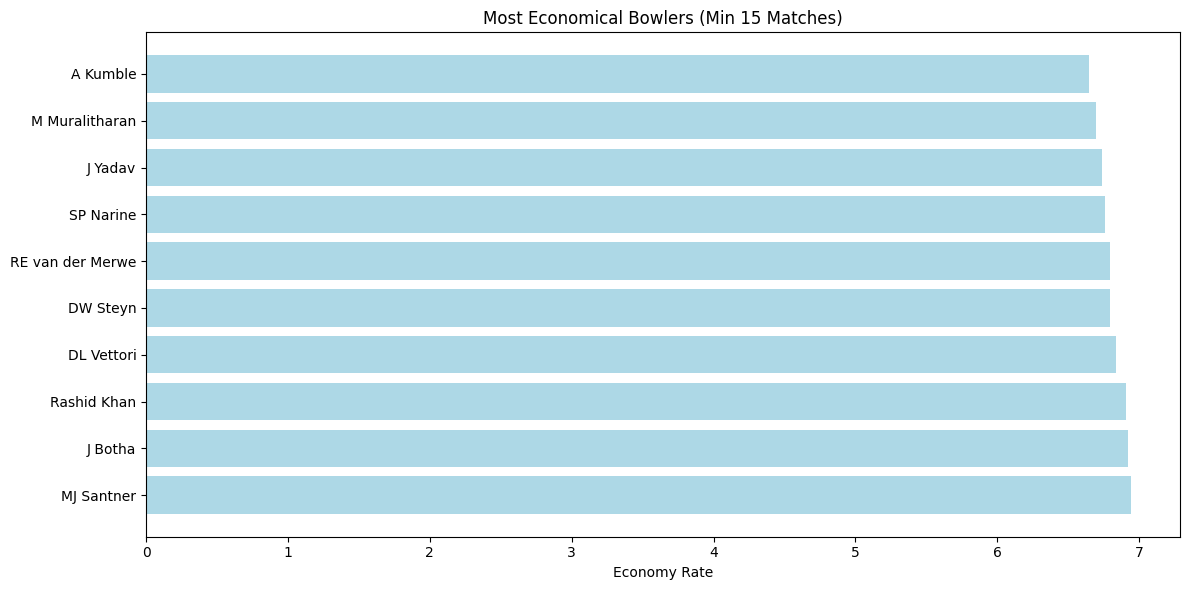

In [163]:
#Most economical bowler (min 15 matches -> Almost a season)
bowler_stats = deliveries.groupby('bowler').agg(
    balls=('ball', 'count'),
    runs=('total_runs', 'sum'),
    matches=('match_id', pd.Series.nunique)
)
bowler_stats['economy'] = bowler_stats['runs'] / (bowler_stats['balls'] / 6)
bowler_stats = bowler_stats[bowler_stats['matches'] >= 15].sort_values('economy').head(10)
print("Most economical bowlers (min 15 matches):")
print(bowler_stats[['economy']])
# Plotting the most economical bowlers
plt.figure(figsize=(12, 6))
plt.barh(bowler_stats.index, bowler_stats['economy'], color='lightblue')
plt.xlabel('Economy Rate')
plt.title('Most Economical Bowlers (Min 15 Matches)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [164]:
#Number of All-rounders
bat_set = set(deliveries['batter'].unique())
bowl_set = set(deliveries['bowler'].unique())
all_rounders = bat_set.intersection(bowl_set)
print(f"Number of All rounders: {len(all_rounders)}")

Number of All rounders: 471


player  runs  wickets  total_contrib
291   RA Jadeja  2959      160           6159
338    SK Raina  5536       25           6036
348   SR Watson  3880       92           5720
95     DJ Bravo  1560      183           5220
347   SP Narine  1534      180           5134
176  KA Pollard  3437       69           4817
25   AD Russell  2488      115           4788
269   PP Chawla   624      192           4464
276    R Ashwin   800      181           4420
406   YS Chahal    37      205           4137

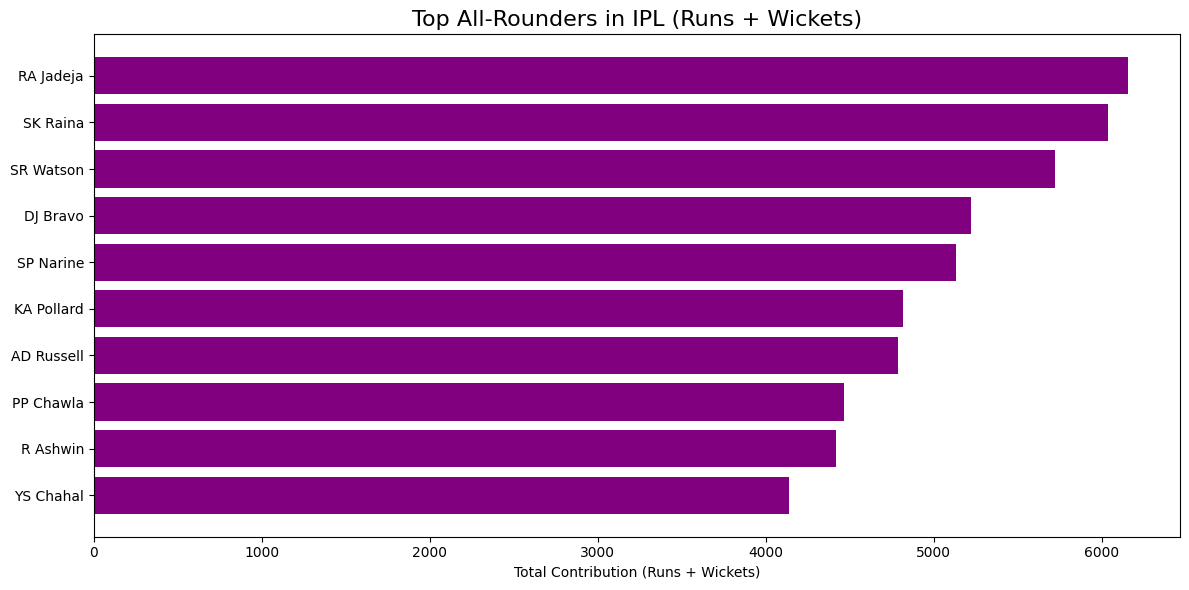

In [165]:
#Top All-Rounders based on Runs and Wickets

runs = deliveries.groupby('batter')['batsman_runs'].sum().reset_index()
runs.columns = ['player', 'runs']


wickets = deliveries[deliveries['is_wicket'] == 1]
wickets = wickets[wickets['dismissal_kind'] != 'run out']
wicket_counts = wickets.groupby('bowler').size().reset_index(name='wickets')
wicket_counts.columns = ['player', 'wickets']

all_rounders = pd.merge(runs, wicket_counts, on='player')
all_rounders['total_contrib'] = all_rounders['runs'] + all_rounders['wickets'] * 20  # weight wickets higher
all_rounders= all_rounders[all_rounders['wickets']> 20]  # Filter out players with no wickets

top_all_rounders = all_rounders.sort_values('total_contrib', ascending=False).head(10)
display(top_all_rounders)
# Plotting the top all-rounders
plt.figure(figsize=(12, 6))
plt.barh(top_all_rounders['player'], top_all_rounders['total_contrib'], color='purple')
plt.xlabel('Total Contribution (Runs + Wickets)')
plt.title('Top All-Rounders in IPL (Runs + Wickets)', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


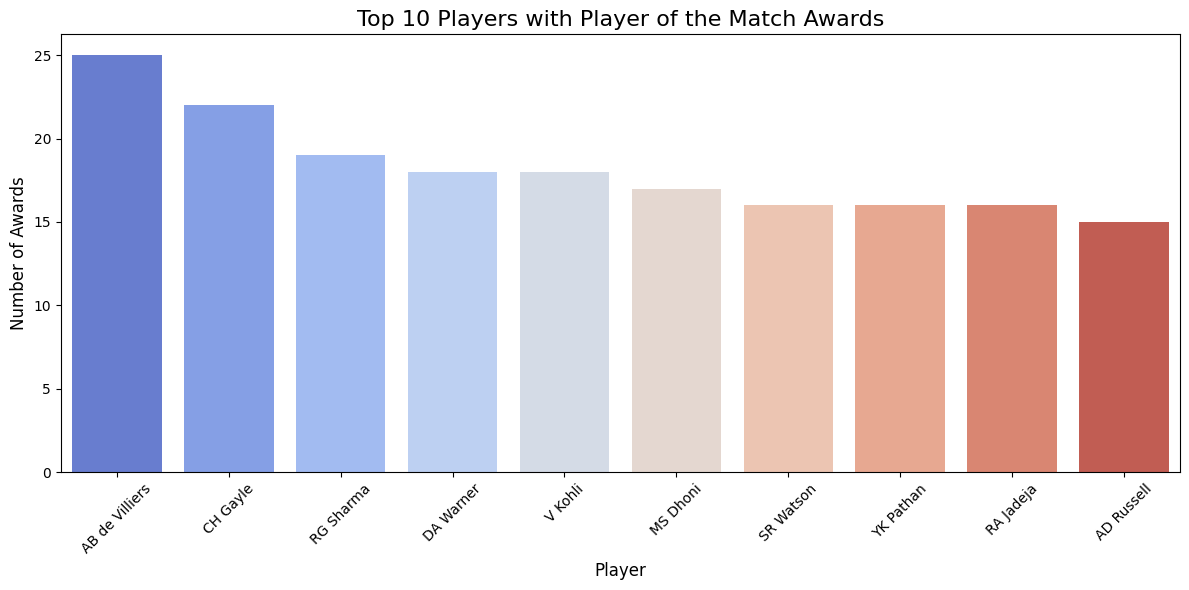

In [166]:
#Top 10 players with Player of the Match awards
top_10_players_df = matches['player_of_match'].value_counts().head(10).reset_index()
top_10_players_df.columns = ['Player', 'Awards']
top_10_players_df
# Plotting the top 10 players with Player of the Match awards
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_players_df, x='Player', y='Awards', palette='coolwarm')
plt.title('Top 10 Players with Player of the Match Awards', fontsize=16)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Number of Awards', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Explore Data related with Teams

In [167]:
#Number of unique teams and their names
all_teams = pd.concat([matches['team1'], matches['team2'], matches['winner']]).dropna().unique()
print(f"Total number of unique IPL teams: {len(all_teams)}")
print("Team names:")
for team in sorted(all_teams):
    print(team)

Total number of unique IPL teams: 19
Team names:
Chennai Super Kings
Deccan Chargers
Delhi Capitals
Delhi Daredevils
Gujarat Lions
Gujarat Titans
Kings XI Punjab
Kochi Tuskers Kerala
Kolkata Knight Riders
Lucknow Super Giants
Mumbai Indians
Pune Warriors
Punjab Kings
Rajasthan Royals
Rising Pune Supergiant
Rising Pune Supergiants
Royal Challengers Bangalore
Royal Challengers Bengaluru
Sunrisers Hyderabad


     year                 batting_team  total_runs
6    2008             Rajasthan Royals        2601
9    2009              Deccan Chargers        2408
21   2010               Mumbai Indians        2738
24   2011          Chennai Super Kings        2560
34   2012          Chennai Super Kings        2831
47   2013               Mumbai Indians        2975
54   2014              Kings XI Punjab        2987
64   2015               Mumbai Indians        2734
74   2016  Royal Challengers Bangalore        2981
80   2017               Mumbai Indians        2800
84   2018          Chennai Super Kings        2809
96   2019               Mumbai Indians        2670
101  2020               Delhi Capitals        2780
108  2021          Chennai Super Kings        2733
123  2022             Rajasthan Royals        2943
128  2023               Gujarat Titans        3054
145  2024          Sunrisers Hyderabad        3052


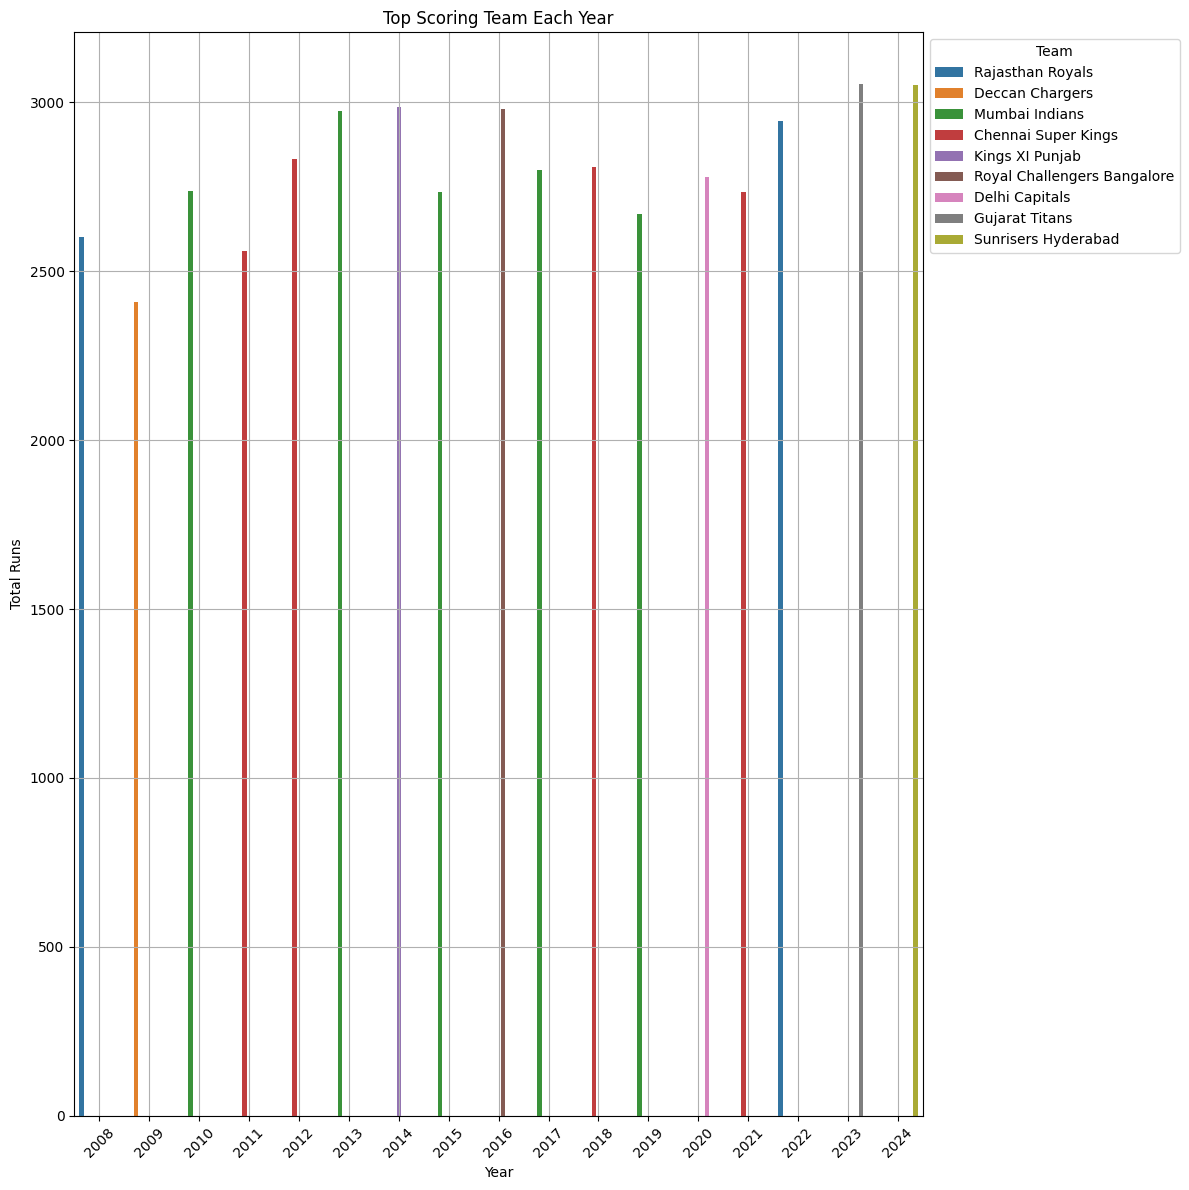

In [168]:
# Top scoring team each year
total_runs_yearly = deliveries_with_year.groupby(['year', 'batting_team'])['total_runs'].sum().reset_index()# Group by year and team, sum the total runs


sorted_runs = total_runs_yearly.sort_values(['year', 'total_runs'], ascending=[True, False])


top_team_each_year = sorted_runs.groupby('year').head(1)


print(top_team_each_year)

# Plotting
plt.figure(figsize=(12, 12))
sns.barplot(data=top_team_each_year, x='year', y='total_runs', hue='batting_team')

plt.title('Top Scoring Team Each Year')
plt.xlabel('Year')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.legend(title='Team', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

Maximum number of sixes hit by a team per season:

    year                 batting_team  Sixes
0   2008              Kings XI Punjab     95
1   2009              Deccan Chargers     99
2   2010          Chennai Super Kings     98
3   2011  Royal Challengers Bangalore     94
4   2012  Royal Challengers Bangalore    118
5   2013               Mumbai Indians    117
6   2014              Kings XI Punjab    127
7   2015               Mumbai Indians    120
8   2016  Royal Challengers Bangalore    142
9   2017               Mumbai Indians    118
10  2018          Chennai Super Kings    145
11  2019        Kolkata Knight Riders    143
12  2020               Mumbai Indians    137
13  2021          Chennai Super Kings    115
14  2022             Rajasthan Royals    137
15  2023               Mumbai Indians    140
16  2024          Sunrisers Hyderabad    178


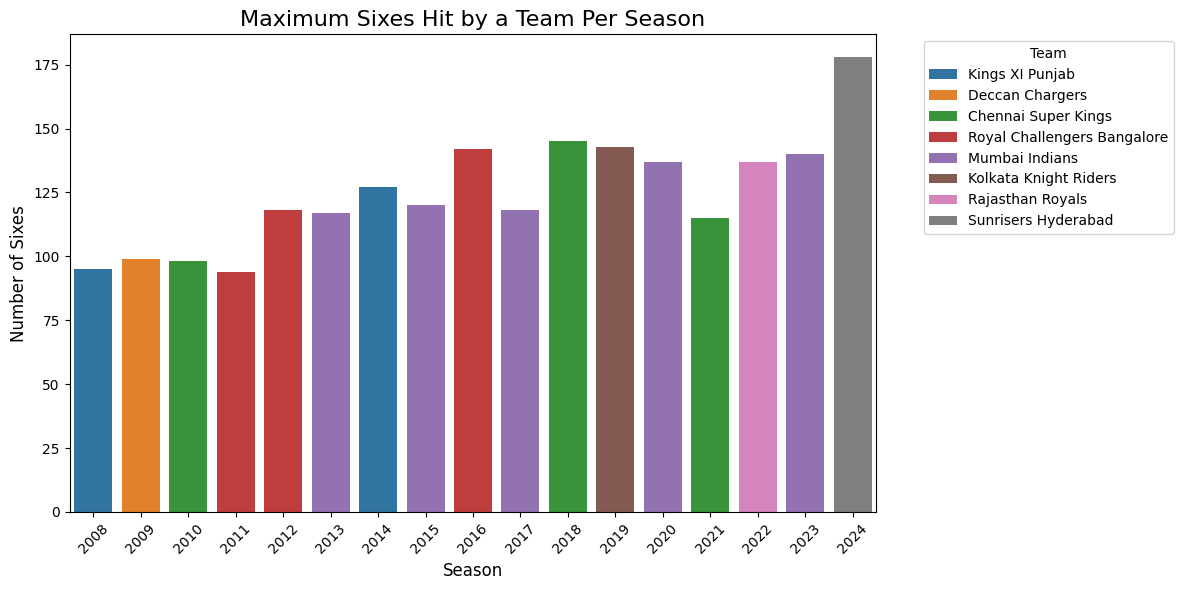

In [169]:
#Maximum number of 6's hit by a Team per season
sixes = deliveries_with_year[deliveries_with_year['batsman_runs'] == 6]

sixes_per_team = sixes.groupby(['year', 'batting_team']).size().reset_index(name='Sixes')

max_sixes_per_season = sixes_per_team.sort_values(['year', 'Sixes'], ascending=[True, False]) \
                                      .groupby('year').head(1).reset_index(drop=True)

print("Maximum number of sixes hit by a team per season:\n")
print(max_sixes_per_season)

plt.figure(figsize=(12, 6))
sns.barplot(data=max_sixes_per_season, x='year', y='Sixes', hue='batting_team', dodge=False, palette='tab10')

plt.title("Maximum Sixes Hit by a Team Per Season", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Sixes", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Maximum number of fours hit by a team per season:

    year                 batting_team  Fours
0   2008             Rajasthan Royals    259
1   2009          Chennai Super Kings    192
2   2010               Mumbai Indians    261
3   2011  Royal Challengers Bangalore    225
4   2012             Rajasthan Royals    246
5   2013             Rajasthan Royals    267
6   2014              Kings XI Punjab    262
7   2015          Chennai Super Kings    249
8   2016                Gujarat Lions    242
9   2017        Kolkata Knight Riders    228
10  2018        Kolkata Knight Riders    253
11  2019               Delhi Capitals    237
12  2020               Delhi Capitals    237
13  2021               Delhi Capitals    234
14  2022             Rajasthan Royals    251
15  2023               Mumbai Indians    265
16  2024        Kolkata Knight Riders    238


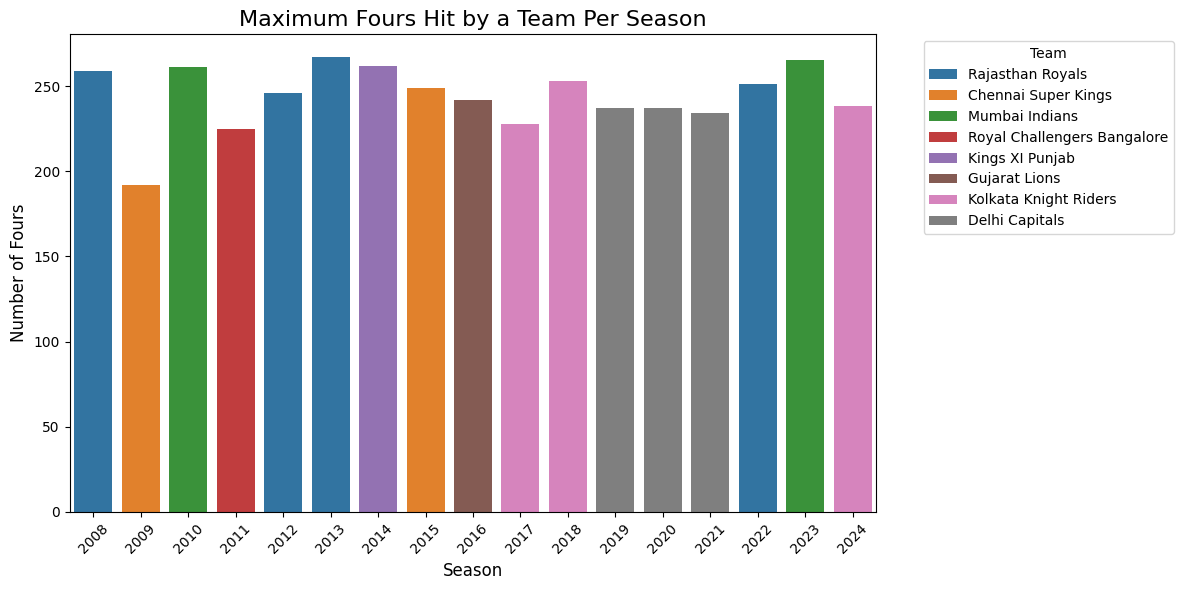

In [170]:
# Maximum number of 4's hit by a Team per season

fours = deliveries_with_year[deliveries_with_year['batsman_runs'] == 4]

fours_per_team = fours.groupby(['year', 'batting_team']).size().reset_index(name='Fours')

max_fours_per_season = fours_per_team.sort_values(['year', 'Fours'], ascending=[True, False]) \
                                      .groupby('year').head(1).reset_index(drop=True)

print("Maximum number of fours hit by a team per season:\n")
print(max_fours_per_season)

plt.figure(figsize=(12, 6))
sns.barplot(data=max_fours_per_season, x='year', y='Fours', hue='batting_team', dodge=False, palette='tab10')

plt.title("Maximum Fours Hit by a Team Per Season", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Fours", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Team with most home wins after winning toss:
Mumbai Indians                 33
Chennai Super Kings            33
Kolkata Knight Riders          29
Royal Challengers Bangalore    26
Rajasthan Royals               21
Name: team1, dtype: int64


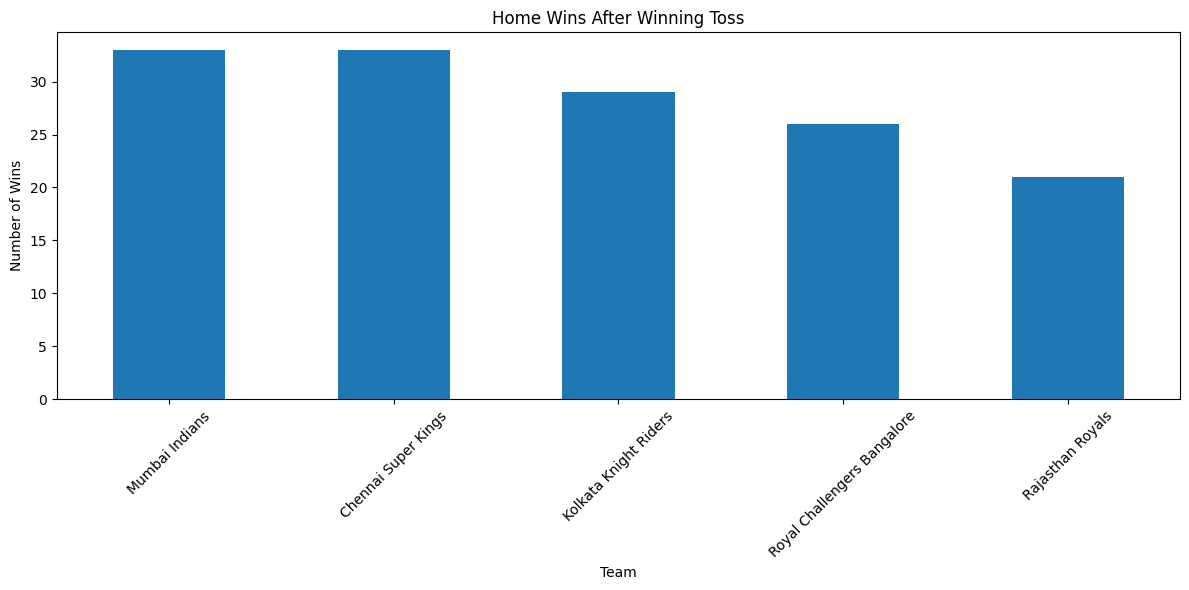

In [171]:
#Team winning most home matches after winning toss
home_win_toss = matches[(matches['toss_winner'] == matches['team1']) &
                        (matches['winner'] == matches['team1'])]
home_wins = home_win_toss['team1'].value_counts()
print("Team with most home wins after winning toss:")
print(home_wins.head(5))
# Plotting the home wins after winning toss
plt.figure(figsize=(12, 6))
home_wins.head(5).plot(kind='bar', title='Home Wins After Winning Toss')
plt.ylabel('Number of Wins')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Team with most home wins after losing toss:
Chennai Super Kings            42
Royal Challengers Bangalore    40
Mumbai Indians                 37
Kolkata Knight Riders          36
Rajasthan Royals               34
Name: team1, dtype: int64


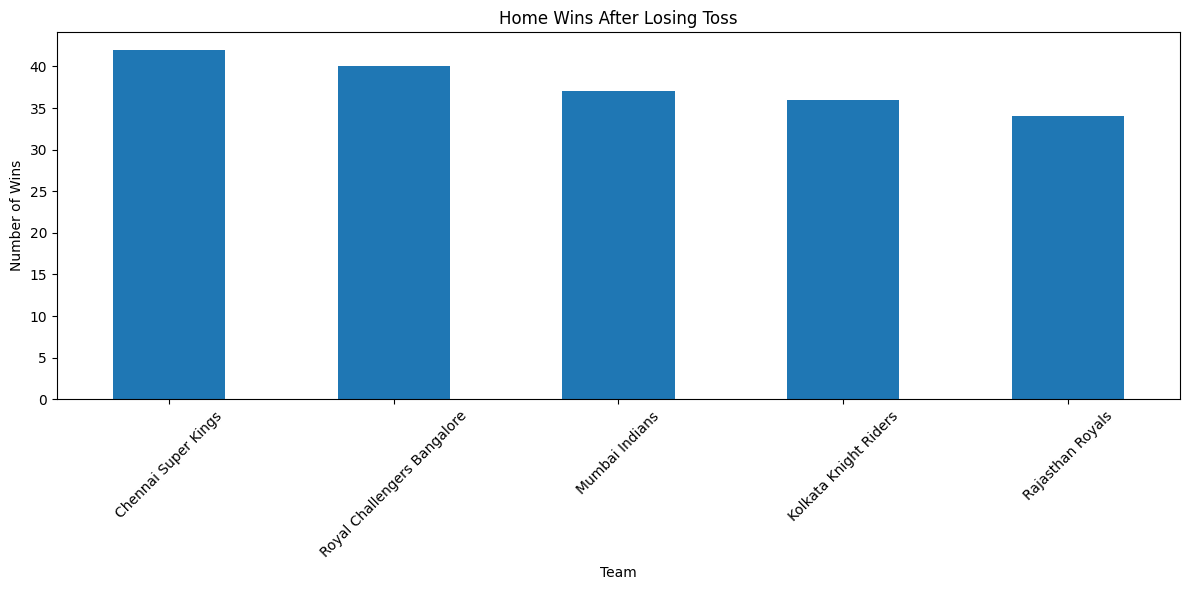

In [172]:
#Team winning most home matches after losing toss
home_lose_toss = matches[(matches['toss_winner'] != matches['team1']) &
                         (matches['winner'] == matches['team1'])]
home_wins_lost_toss = home_lose_toss['team1'].value_counts()
print("Team with most home wins after losing toss:")
print(home_wins_lost_toss.head(5))
# Plotting the home wins after losing toss
plt.figure(figsize=(12, 6))
home_wins_lost_toss.head(5).plot(kind='bar', title='Home Wins After Losing Toss')
plt.ylabel('Number of Wins')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Team with most Away wins after winning toss:
Mumbai Indians                 45
Chennai Super Kings            42
Kolkata Knight Riders          39
Rajasthan Royals               39
Royal Challengers Bangalore    31
Name: team2, dtype: int64


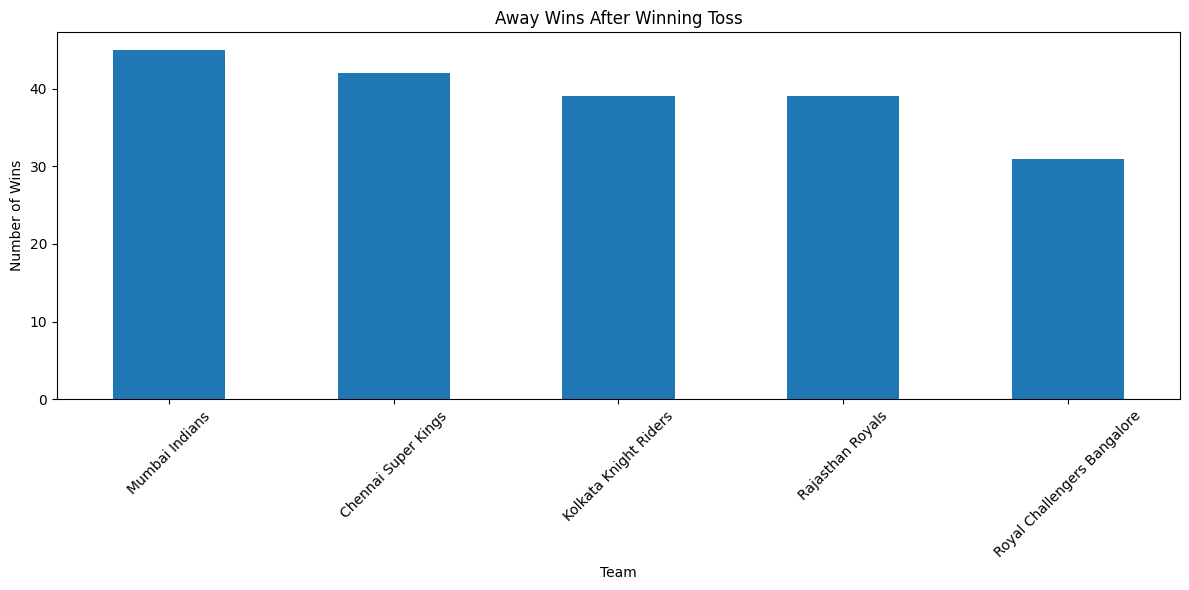

In [173]:
#Team winning most Away matches after winning toss
away_win_toss = matches[(matches['toss_winner'] == matches['team2']) &
                        (matches['winner'] == matches['team2'])]
away_wins = away_win_toss['team2'].value_counts()
print("Team with most Away wins after winning toss:")
print(away_wins.head(5))
# Plotting the away wins after winning toss
plt.figure(figsize=(12, 6))
away_wins.head(5).plot(kind='bar', title='Away Wins After Winning Toss')
plt.ylabel('Number of Wins')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Team with most Away wins after loosing toss:
Mumbai Indians           29
Kolkata Knight Riders    27
Kings XI Punjab          24
Chennai Super Kings      21
Sunrisers Hyderabad      19
Name: team2, dtype: int64


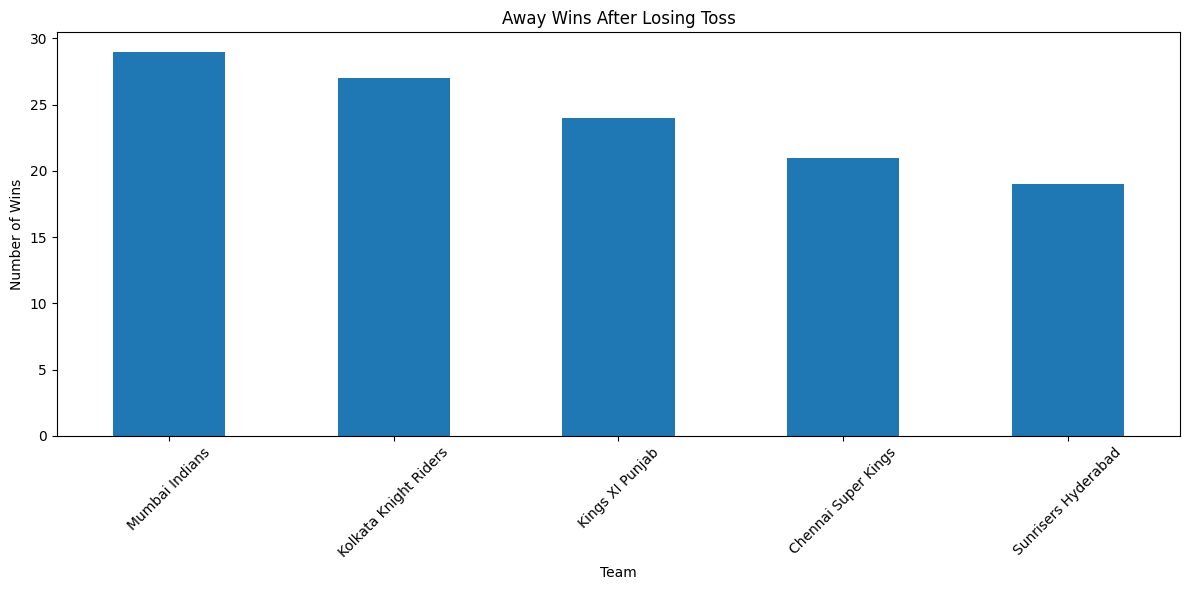

In [174]:
#Team winning most Away matches after losing toss
away_win_toss = matches[(matches['toss_winner'] != matches['team2']) &
                        (matches['winner'] == matches['team2'])]
away_wins = away_win_toss['team2'].value_counts()
print("Team with most Away wins after loosing toss:")
print(away_wins.head(5))
# Plotting the away wins after losing toss
plt.figure(figsize=(12, 6))
away_wins.head(5).plot(kind='bar', title='Away Wins After Losing Toss')
plt.ylabel('Number of Wins')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [175]:
#Away match winners by year
away_wins = matches[matches['team2'] == matches['winner']]
away_wins_per_year = away_wins.groupby(['year', 'winner']).size().reset_index(name='wins')
print("Assumed Away (team2) Wins Each Year:")
print(away_wins_per_year)

Assumed Away (team2) Wins Each Year:
     year                       winner  wins
0    2008          Chennai Super Kings     5
1    2008              Deccan Chargers     2
2    2008             Delhi Daredevils     3
3    2008              Kings XI Punjab     4
4    2008        Kolkata Knight Riders     2
..    ...                          ...   ...
139  2024               Mumbai Indians     2
140  2024                 Punjab Kings     5
141  2024             Rajasthan Royals     7
142  2024  Royal Challengers Bengaluru     3
143  2024          Sunrisers Hyderabad     3

[144 rows x 3 columns]


In [176]:
# Count of wins per team per venue
venue_performance = matches.groupby(['venue', 'winner']).size().reset_index(name='wins')
venue_top = venue_performance.sort_values('wins', ascending=False).groupby('venue').head(1)

display(venue_top.head(10))


venue                       winner  \
88                                 Eden Gardens        Kolkata Knight Riders   
360                            Wankhede Stadium               Mumbai Indians   
169             MA Chidambaram Stadium, Chepauk          Chennai Super Kings   
300                      Sawai Mansingh Stadium             Rajasthan Royals   
152                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
104                            Feroz Shah Kotla             Delhi Daredevils   
272   Rajiv Gandhi International Stadium, Uppal          Sunrisers Hyderabad   
249  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
260          Rajiv Gandhi International Stadium          Sunrisers Hyderabad   
372                    Wankhede Stadium, Mumbai               Mumbai Indians   

     wins  
88     45  
360    42  
169    33  
300    32  
152    29  
104    23  
272    20  
249    18  
260    10  
372    10

Match Outcome Summary:
Total Matches: 1095
Close Games: 166
Big Wins: 350


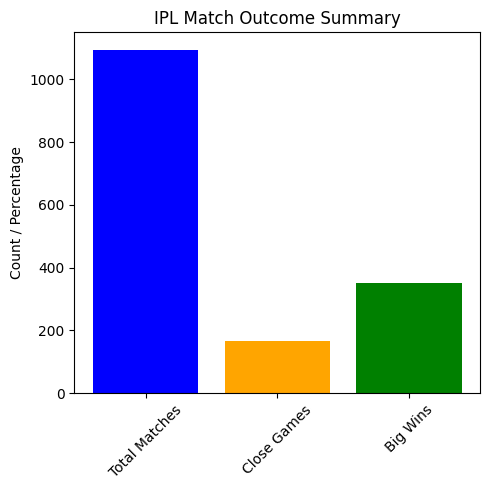

In [177]:
# Match Summary - number of close games and big wins
close_games = matches[
    ((matches['result'] == 'runs') & (matches['result_margin'] <= 10)) |
    ((matches['result'] == 'wickets') & (matches['result_margin'] <= 3))
]


big_wins = matches[
    ((matches['result'] == 'runs') & (matches['result_margin'] >= 50)) |
    ((matches['result'] == 'wickets') & (matches['result_margin'] >= 7))
]


summary = {
    'Total Matches': len(matches),
    'Close Games': len(close_games),
    'Big Wins': len(big_wins),
    #'Close Game %': round(len(close_games) / len(matches) * 100, 2),
    #'Big Win %': round(len(big_wins) / len(matches) * 100, 2)
}


print("Match Outcome Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")
# Plotting the summary
plt.figure(figsize=(5, 5))
plt.bar(summary.keys(), summary.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('IPL Match Outcome Summary')
plt.ylabel('Count / Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Top 5 Teams with Most Wins While Chasing:
                          team  chasing_wins
0        Kolkata Knight Riders            76
1               Mumbai Indians            71
2             Rajasthan Royals            67
3          Chennai Super Kings            67
4  Royal Challengers Bangalore            61
5              Kings XI Punjab            45
6          Sunrisers Hyderabad            43
7             Delhi Daredevils            42
8               Delhi Capitals            24
9               Gujarat Titans            17


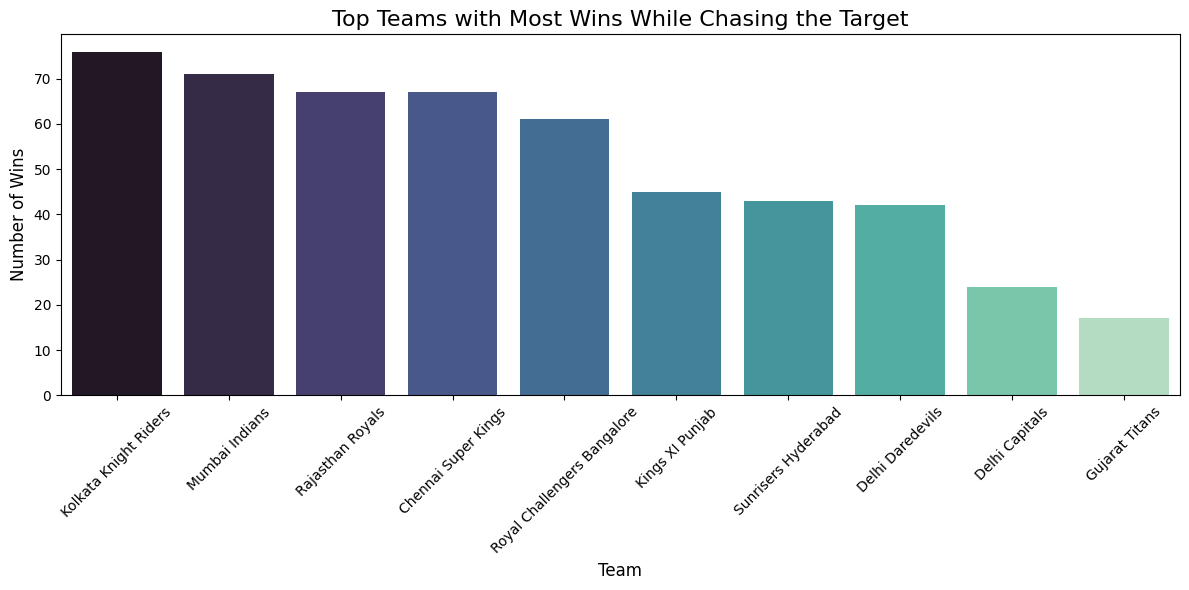

In [178]:
#Top temas # with most wins while chasing the target

chasing_wins = matches[matches['result'] == 'wickets']
chasing_win_counts = chasing_wins['winner'].value_counts().reset_index()
chasing_win_counts.columns = ['team', 'chasing_wins']
top_5_chasing_teams = chasing_win_counts.head(10)
print("Top 5 Teams with Most Wins While Chasing:")
print(top_5_chasing_teams)
# Plotting the top teams with most wins while chasing
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_chasing_teams, x='team', y='chasing_wins', palette='mako')
plt.title('Top Teams with Most Wins While Chasing the Target', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Data Preparation

In [179]:
df_matches = pd.read_csv('matches.csv')
# df_matches = pd.read_csv('/content/drive/MyDrive/DS_Project_files/matches.csv')
df_deliveries = pd.read_csv('deliveries.csv')
# df_deliveries = pd.read_csv('/content/drive/MyDrive/DS_Project_files/deliveries.csv')

In [180]:
print(df_deliveries.shape)
print(df_matches.shape)


(260920, 17)
(1095, 20)


In [181]:
# Date to Year for better EDA
df_matches['year'] = pd.to_datetime(matches['date']).dt.year

In [182]:
df_deliveries['id'] = df_deliveries['match_id']
df_del = df_deliveries.drop(columns='match_id')

In [183]:
(df_del.id.dtype)

dtype('int64')

In [184]:
df_matches.id.dtype

dtype('int64')

In [185]:
merged_df = pd.merge(df_del,df_matches, on='id',how='outer' )
merged_df.shape

(260920, 37)

In [186]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260920 entries, 0 to 260919
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   inning            260920 non-null  int64  
 1   batting_team      260920 non-null  object 
 2   bowling_team      260920 non-null  object 
 3   over              260920 non-null  int64  
 4   ball              260920 non-null  int64  
 5   batter            260920 non-null  object 
 6   bowler            260920 non-null  object 
 7   non_striker       260920 non-null  object 
 8   batsman_runs      260920 non-null  int64  
 9   extra_runs        260920 non-null  int64  
 10  total_runs        260920 non-null  int64  
 11  extras_type       14125 non-null   object 
 12  is_wicket         260920 non-null  int64  
 13  player_dismissed  12950 non-null   object 
 14  dismissal_kind    12950 non-null   object 
 15  fielder           9354 non-null    object 
 16  id                26

In [187]:
# merged_df.to_csv("merged_matches&devlieries.csv")

#### Data Quality

In [188]:
df = merged_df.copy()

In [189]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
other_cols = df.select_dtypes(exclude=['int64', 'float64', 'object', 'category']).columns.tolist()

summary_data = [
    ["Numeric", len(numeric_cols), ", ".join(numeric_cols) if numeric_cols else "None"],
    ["Categorical", len(categorical_cols), ", ".join(categorical_cols) if categorical_cols else "None"],
    ["Other", len(other_cols), ", ".join(other_cols) if other_cols else "None"]
]

column_summary = pd.DataFrame(summary_data, columns=["Column Type", "Count", "Columns"])
display(column_summary)

Column Type  Count                                            Columns
0      Numeric     12  inning, over, ball, batsman_runs, extra_runs, ...
1  Categorical     25  batting_team, bowling_team, batter, bowler, no...
2        Other      0                                               None

In [190]:
# Check for Missing Values
print(df.shape)
df.isnull().sum().sort_values(ascending=False)

(260920, 37)


method              257274
fielder             251566
dismissal_kind      247970
player_dismissed    247970
extras_type         246795
city                 12397
result_margin         4124
player_of_match        490
winner                 490
target_runs            309
target_overs           309
result                   0
toss_decision            0
super_over               0
umpire1                  0
umpire2                  0
toss_winner              0
team2                    0
team1                    0
venue                    0
inning                   0
match_type               0
date                     0
batting_team             0
season                   0
id                       0
is_wicket                0
total_runs               0
extra_runs               0
batsman_runs             0
non_striker              0
bowler                   0
batter                   0
ball                     0
over                     0
bowling_team             0
year                     0
d

In [191]:
def count_and_percentage_bins(df):
    # Calculate the percentage of non-null values for each column
    non_null_percentages = df.notnull().mean() * 100

    # Define the bins
    bins = [0, 0.1, 20, 40, 60, 80, 99, 100]
    labels = ['0-0.1%', '0.1-20%', '20-40%', '40-60%', '60-80%', '80-99%', '99-100%']

    # Bin the percentages
    binned_percentages = pd.cut(non_null_percentages, bins=bins, labels=labels, include_lowest=True)
    bin_columns = {label: [] for label in labels}
    for col, bin_label in zip(df.columns, binned_percentages):
        bin_columns[bin_label].append(col)

    # Count the number of columns in each bin
    bin_counts = binned_percentages.value_counts().sort_index()

    # Create the result DataFrame
    result = pd.DataFrame({
        'Bin': bin_counts.index,
        'Count': bin_counts.values,
        'Columns': [bin_columns[label] for label in bin_counts.index]
    })
    result = pd.DataFrame(result)
    result.to_csv('result.csv')
    print(result)



In [192]:
count_and_percentage_bins(df)

       Bin  Count                                            Columns
0   0-0.1%      0                                                 []
1  0.1-20%      5  [extras_type, player_dismissed, dismissal_kind...
2   20-40%      0                                                 []
3   40-60%      0                                                 []
4   60-80%      0                                                 []
5   80-99%      2                              [city, result_margin]
6  99-100%     30  [inning, batting_team, bowling_team, over, bal...


In [193]:
df.method.unique()

array([nan, 'D/L'], dtype=object)

In [194]:
# dropping method because we are not taking matches with no results due to some unseen circumstances
# drop date as we are using year

df.drop(columns=['method','date','fielder'], inplace=True)

In [195]:
df.shape

(260920, 34)

In [196]:
df['dismissal_kind'].value_counts(dropna=False)

NaN                      247970
caught                     8063
bowled                     2212
run out                    1114
lbw                         800
caught and bowled           367
stumped                     358
retired hurt                 15
hit wicket                   15
obstructing the field         3
retired out                   3
Name: dismissal_kind, dtype: int64

In [197]:
df['player_dismissed'].value_counts(dropna=False)

NaN            247970
RG Sharma         223
V Kohli           207
S Dhawan          193
KD Karthik        184
                ...  
BJ Haddin           1
SS Cottrell         1
JE Taylor           1
NL McCullum         1
Sunny Gupta         1
Name: player_dismissed, Length: 630, dtype: int64

In [198]:
df['extras_type'].value_counts(dropna=False)

NaN        246795
wides        8380
legbyes      4001
noballs      1069
byes          673
penalty         2
Name: extras_type, dtype: int64

In [199]:
df['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [200]:
df['team1'].unique()


array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [201]:
df['city'].value_counts(dropna=False)

Mumbai            41742
Kolkata           21846
Delhi             21269
Chennai           20706
Hyderabad         18355
Bangalore         14907
Chandigarh        14476
Jaipur            13520
NaN               12397
Pune              12239
Abu Dhabi          8799
Ahmedabad          8553
Bengaluru          6917
Durban             3643
Visakhapatnam      3537
Lucknow            3283
Dubai              3149
Dharamsala         3141
Centurion          2866
Rajkot             2381
Sharjah            2355
Navi Mumbai        2188
Indore             1965
Johannesburg       1940
Cuttack            1695
Port Elizabeth     1677
Ranchi             1671
Cape Town          1539
Raipur             1431
Mohali             1235
Kochi              1155
Kanpur              921
Nagpur              742
Guwahati            739
Kimberley           726
East London         715
Bloemfontein        500
Name: city, dtype: int64

In [202]:
df_city_nan = df[df['city'].isna()]
print(df_city_nan.id.nunique())
print(df_city_nan.venue.unique())

51
['Sharjah Cricket Stadium' 'Dubai International Cricket Stadium']


In [203]:
# Replacing nan values with values that make sense for our dataset
df['dismissal_kind'].fillna('Not_Dismissed', inplace=True)
df['player_dismissed'].fillna('Not_Dismissed', inplace=True)
df['extras_type'].fillna('No_extras', inplace=True)
df['city'].fillna('UAE', inplace=True)

In [204]:
df_quality = df.dropna(subset=['player_of_match', 'winner', 'target_runs', 'target_overs','result_margin']).reset_index(drop=True)


In [205]:
df_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256796 entries, 0 to 256795
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   inning            256796 non-null  int64  
 1   batting_team      256796 non-null  object 
 2   bowling_team      256796 non-null  object 
 3   over              256796 non-null  int64  
 4   ball              256796 non-null  int64  
 5   batter            256796 non-null  object 
 6   bowler            256796 non-null  object 
 7   non_striker       256796 non-null  object 
 8   batsman_runs      256796 non-null  int64  
 9   extra_runs        256796 non-null  int64  
 10  total_runs        256796 non-null  int64  
 11  extras_type       256796 non-null  object 
 12  is_wicket         256796 non-null  int64  
 13  player_dismissed  256796 non-null  object 
 14  dismissal_kind    256796 non-null  object 
 15  id                256796 non-null  int64  
 16  season            25

#### Data Cleaning

In [206]:
raw_clean_df = df_quality.copy()

In [207]:
raw_clean_df.columns

Index(['inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter',
       'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs',
       'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind', 'id',
       'season', 'city', 'match_type', 'player_of_match', 'venue', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'target_runs', 'target_overs', 'super_over', 'umpire1',
       'umpire2', 'year'],
      dtype='object')

In [208]:
teams_map = {'Royal Challengers Bangalore':'Bangalore'
              , 'Kings XI Punjab':'Punjab'
              , 'Delhi Daredevils':'Delhi'
              , 'Mumbai Indians':'Mumbai'
              , 'Kolkata Knight Riders':'Kolkata'
              , 'Rajasthan Royals':'Rajasthan'
              , 'Deccan Chargers':'Hyderabad'
              , 'Chennai Super Kings':'Chennai'
              , 'Kochi Tuskers Kerala':'Kerala'
              , 'Pune Warriors':'Pune'
              , 'Sunrisers Hyderabad':'Hyderabad'
              , 'Gujarat Lions':'Gujarat'
              , 'Rising Pune Supergiants':'Pune'
              , 'Rising Pune Supergiant':'Pune'
              , 'Delhi Capitals':'Delhi'
              , 'Punjab Kings':'Punjab'
              , 'Lucknow Super Giants':'Lucknow'
              , 'Gujarat Titans':'Gujarat'
              , 'Royal Challengers Bengaluru':'Bangalore'
}
for col in (raw_clean_df.columns):
    raw_clean_df[col] = raw_clean_df[col].apply(lambda x: teams_map.get(x, x))

In [209]:
venue_mapping = {
    'Eden Gardens, Kolkata': 'Eden Gardens',
    'MA Chidambaram Stadium, Chepauk': 'MA Chidambaram Stadium',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'MA Chidambaram Stadium',
    'Wankhede Stadium, Mumbai': 'Wankhede Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Punjab Cricket Association Stadium',
    'Punjab Cricket Association IS Bindra Stadium': 'Punjab Cricket Association Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh': 'Punjab Cricket Association Stadium',
    'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium',
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 'Rajiv Gandhi International Stadium',
    'Arun Jaitley Stadium, Delhi': 'Arun Jaitley Stadium',
    'Dr DY Patil Sports Academy, Mumbai': 'Dr DY Patil Sports Academy',
    'Maharashtra Cricket Association Stadium, Pune': 'Maharashtra Cricket Association Stadium',
    'M Chinnaswamy Stadium, Bengaluru': 'M Chinnaswamy Stadium',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
    'Sawai Mansingh Stadium, Jaipur': 'Sawai Mansingh Stadium',
    'Himachal Pradesh Cricket Association Stadium, Dharamsala': 'Himachal Pradesh Cricket Association Stadium',
    'Brabourne Stadium': 'Brabourne Stadium, Mumbai',
    'Sardar Patel Stadium, Motera': 'Sardar Patel Stadium',
    'M. Chinnaswamy Stadium':'M Chinnaswamy Stadium',
    'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium'
}
for col in (raw_clean_df.columns):
    raw_clean_df[col] = raw_clean_df[col].apply(lambda x: venue_mapping.get(x, x))

In [210]:
print(f"Unique values in Team before mapping: {df_quality.team1.nunique()}")
print(f"Unique values in Team after mapping: {raw_clean_df.team1.nunique()}")
print("The reduction in unique Team values indicates that different categories have been properly mapped to unified values.\n")

print(f"Unique values in Venue before mapping: {df_quality.venue.nunique()}")
print(f"Unique values in Venue after mapping: {raw_clean_df.venue.nunique()}")
print("The decrease in unique Venue values confirms that varying category names have been correctly consolidated.")


Unique values in Team before mapping: 19
Unique values in Team after mapping: 12
The reduction in unique Team values indicates that different categories have been properly mapped to unified values.

Unique values in Venue before mapping: 58
Unique values in Venue after mapping: 41
The decrease in unique Venue values confirms that varying category names have been correctly consolidated.


In [211]:
raw_clean_df['season'].isna().sum()

0

In [212]:
raw_clean_df['season'].unique()


array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022',
       '2023', '2024'], dtype=object)

In [213]:
season_map = {
    '2007/08': '2008',
    '2009': '2009',
    '2009/10': '2010',
    '2011': '2011',
    2011: '2011',
    2012: '2012',
    2013: '2013',
    2014: '2014',
    2015: '2015',
    2016: '2016',
    2017: '2017',
    2018: '2018',
    '2018': '2018',
    '2019': '2019',
    '2020/21': '2021',
    '2021': '2021',
    2021: '2021',
    2022: '2022',
    2023: '2023',
    2024: '2024'
}
for col in (raw_clean_df.columns):
    raw_clean_df[col] = raw_clean_df[col].apply(lambda x: season_map.get(x, x))

raw_clean_df['season'] = raw_clean_df['season'].astype(int) ## Cpnvert it into INt for numerical cols for ML model


In [214]:
raw_clean_df = raw_clean_df.drop(columns=['super_over'])

In [215]:
raw_clean_df["inning"].unique()

array([1, 2])

In [216]:
raw_clean_df["result"].unique()

array(['runs', 'wickets'], dtype=object)

In [217]:
final_cleaned_df = raw_clean_df.copy()

In [218]:
print(merged_df.shape)
print(final_cleaned_df.shape)

(260920, 37)
(256796, 33)


In [219]:
final_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256796 entries, 0 to 256795
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   inning            256796 non-null  int64  
 1   batting_team      256796 non-null  object 
 2   bowling_team      256796 non-null  object 
 3   over              256796 non-null  int64  
 4   ball              256796 non-null  int64  
 5   batter            256796 non-null  object 
 6   bowler            256796 non-null  object 
 7   non_striker       256796 non-null  object 
 8   batsman_runs      256796 non-null  int64  
 9   extra_runs        256796 non-null  int64  
 10  total_runs        256796 non-null  int64  
 11  extras_type       256796 non-null  object 
 12  is_wicket         256796 non-null  int64  
 13  player_dismissed  256796 non-null  object 
 14  dismissal_kind    256796 non-null  object 
 15  id                256796 non-null  int64  
 16  season            25

### Gold layer
#### Final dataset for training respective ML model approaches for team members

In [220]:
gold_df = final_cleaned_df.copy()

In [221]:
gold_df.to_csv("gold_df.csv")

## ML Modelling for Match winner prediction

###  Using XGBClassifier Model (Ravaliya Parth)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%pip install XGBoost
%pip install shap
import joblib

import shap
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
gold_df = pd.read_csv('gold_df.csv')
# gold_df = pd.read_csv('/content/drive/MyDrive/DS_Project_files/gold_df.csv')

In [3]:
ml_parth = gold_df.copy()
ml_parth.shape
## Preparing dataset

(256796, 34)

In [4]:
ml_parth.columns

Index(['Unnamed: 0', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'id', 'season', 'city', 'match_type',
       'player_of_match', 'venue', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'result', 'result_margin', 'target_runs',
       'target_overs', 'umpire1', 'umpire2', 'year'],
      dtype='object')

In [5]:
match_spec_feature = ['season', 'city', 'match_type', 'venue', 'team1', 'team2',
    'toss_winner', 'toss_decision']
Team_Player_perf_features = ['inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter',
    'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs',
    'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind']

In [6]:
features = match_spec_feature + Team_Player_perf_features

target = 'winner'

cols = [
    'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter',
    'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs',
    'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind',
    'season', 'city', 'match_type', 'venue', 'team1', 'team2',
    'toss_winner', 'toss_decision', 'umpire1', 'umpire2', 'year','winner'

]

In [7]:
df = ml_parth[cols]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256796 entries, 0 to 256795
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   inning            256796 non-null  int64 
 1   batting_team      256796 non-null  object
 2   bowling_team      256796 non-null  object
 3   over              256796 non-null  int64 
 4   ball              256796 non-null  int64 
 5   batter            256796 non-null  object
 6   bowler            256796 non-null  object
 7   non_striker       256796 non-null  object
 8   batsman_runs      256796 non-null  int64 
 9   extra_runs        256796 non-null  int64 
 10  total_runs        256796 non-null  int64 
 11  extras_type       256796 non-null  object
 12  is_wicket         256796 non-null  int64 
 13  player_dismissed  256796 non-null  object
 14  dismissal_kind    256796 non-null  object
 15  season            256796 non-null  int64 
 16  city              256796 non-null  obj

In [9]:
df = df[Team_Player_perf_features + [target]]

# Select features (X) and target (y)
X = df.drop('winner', axis=1)
y = df['winner']

print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print("-" * 30)

# Initialize LabelEncoder for the target column first, to get classes for inverse transformation later
target_label_encoder = LabelEncoder()
y_encoded = target_label_encoder.fit_transform(y)

# Encode categorical features in X
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        print(f"Encoded categorical feature: '{column}'")


print("\nX (features) after encoding categorical columns:")
print(X.head())
print("\ny (target) after encoding 'winner' column:")
print(pd.Series(y_encoded).head()) # Convert numpy array back to Series for display
print("-" * 30)

# Split the data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the XGBClassifier with simple parameters
# Using default parameters for simplicity as requested, but setting `eval_metric` for silent output
# `use_label_encoder` is deprecated and implicitly False in newer XGBoost versions
model = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Train the model
model.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred_encoded = model.predict(X_test)

# Convert encoded predictions and true values back to original team names for better readability
y_test_original = target_label_encoder.inverse_transform(y_test_encoded)
y_pred_original = target_label_encoder.inverse_transform(y_pred_encoded)

print("\n--- Model Evaluation ---")

# Evaluate the model
accuracy = accuracy_score(y_test_original, y_pred_original)
report = classification_report(y_test_original, y_pred_original, zero_division=0) # zero_division=0 to handle cases with no true samples for a class

print(f"\nAccuracy Score: {accuracy:.4f}")
print("\nClassification Report:\n", report)

# Print y_test and y_pred (original team names for clarity)
print("\n--- y_test vs y_pred (First 20 samples) ---")
# Create a DataFrame for easy comparison
comparison_df = pd.DataFrame({
    'Actual Winner': y_test_original,
    'Predicted Winner': y_pred_original
})
print(comparison_df.head(20)) # Print first 20 for brevity

# Extensive Prediction Error Analysis
print("\n--- Prediction Error Analysis ---")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_original)
# Get class labels in the order they appear in the confusion matrix
class_labels = target_label_encoder.classes_
print("\nConfusion Matrix:")
print(pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels))

# Identify misclassified examples (up to 10 for demonstration)
misclassified_indices = np.where(y_test_original != y_pred_original)[0]
print(f"\nTotal misclassified samples: {len(misclassified_indices)}")

if len(misclassified_indices) > 0:
    print("\nSome Misclassified Examples (Actual vs. Predicted):")
    # Take a sample of misclassified indices if there are too many
    sample_misclassified_indices = misclassified_indices[:min(len(misclassified_indices), 10)]

    for i in sample_misclassified_indices:
        actual_winner = y_test_original[i]
        predicted_winner = y_pred_original[i]
        # You might want to print some features of the misclassified sample here
        # E.g., X_test.iloc[i]
        print(f"Sample {i+1}: Actual='{actual_winner}', Predicted='{predicted_winner}'")
else:
    print("\nNo misclassified samples found in the test set. (This is rare with real data)")

print("\n--- End of Error Analysis ---")


Shape of features (X): (256796, 15)
Shape of target (y): (256796,)
------------------------------
Encoded categorical feature: 'batting_team'
Encoded categorical feature: 'bowling_team'
Encoded categorical feature: 'batter'
Encoded categorical feature: 'bowler'
Encoded categorical feature: 'non_striker'
Encoded categorical feature: 'extras_type'
Encoded categorical feature: 'player_dismissed'
Encoded categorical feature: 'dismissal_kind'

X (features) after encoding categorical columns:
   inning  batting_team  bowling_team  over  ball  batter  bowler  \
0       1             6             0     0     1     537     335   
1       1             6             0     0     2     102     335   
2       1             6             0     0     3     102     335   
3       1             6             0     0     4     102     335   
4       1             6             0     0     5     102     335   

   non_striker  batsman_runs  extra_runs  total_runs  extras_type  is_wicket  \
0          1

In [10]:
df = df[Team_Player_perf_features + [target]]

# Select features (X) and target (y)
X = df.drop('winner', axis=1)
y = df['winner']

print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print("-" * 30)

# Initialize LabelEncoder for the target column first, to get classes for inverse transformation later
target_label_encoder = LabelEncoder()
y_encoded = target_label_encoder.fit_transform(y)

# Encode categorical features in X
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        print(f"Encoded categorical feature: '{column}'")


print("\nX (features) after encoding categorical columns:")
print(X.head())
print("\ny (target) after encoding 'winner' column:")
print(pd.Series(y_encoded).head()) # Convert numpy array back to Series for display
print("-" * 30)

# Split the data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the XGBClassifier with simple parameters
# Using default parameters for simplicity as requested, but setting `eval_metric` for silent output
# `use_label_encoder` is deprecated and implicitly False in newer XGBoost versions
model = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Train the model
model.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred_encoded = model.predict(X_test)

# Convert encoded predictions and true values back to original team names for better readability
y_test_original = target_label_encoder.inverse_transform(y_test_encoded)
y_pred_original = target_label_encoder.inverse_transform(y_pred_encoded)

print("\n--- Model Evaluation ---")

# Evaluate the model
accuracy = accuracy_score(y_test_original, y_pred_original)
report = classification_report(y_test_original, y_pred_original, zero_division=0) # zero_division=0 to handle cases with no true samples for a class

print(f"\nAccuracy Score: {accuracy:.4f}")
print("\nClassification Report:\n", report)




Shape of features (X): (256796, 15)
Shape of target (y): (256796,)
------------------------------
Encoded categorical feature: 'batting_team'
Encoded categorical feature: 'bowling_team'
Encoded categorical feature: 'batter'
Encoded categorical feature: 'bowler'
Encoded categorical feature: 'non_striker'
Encoded categorical feature: 'extras_type'
Encoded categorical feature: 'player_dismissed'
Encoded categorical feature: 'dismissal_kind'

X (features) after encoding categorical columns:
   inning  batting_team  bowling_team  over  ball  batter  bowler  \
0       1             6             0     0     1     537     335   
1       1             6             0     0     2     102     335   
2       1             6             0     0     3     102     335   
3       1             6             0     0     4     102     335   
4       1             6             0     0     5     102     335   

   non_striker  batsman_runs  extra_runs  total_runs  extras_type  is_wicket  \
0          1

In [11]:
y_test_original

array(['Delhi', 'Gujarat', 'Hyderabad', ..., 'Kolkata', 'Bangalore',
       'Bangalore'], dtype=object)


--- y_test vs y_pred ---
      Actual Winner Predicted Winner  Correct Prediction
0             Delhi            Delhi                   1
1           Gujarat          Gujarat                   1
2         Hyderabad          Kolkata                   0
3           Chennai          Chennai                   1
4           Chennai          Chennai                   1
...             ...              ...                 ...
51355     Hyderabad        Hyderabad                   1
51356       Kolkata          Kolkata                   1
51357       Kolkata          Kolkata                   1
51358     Bangalore        Bangalore                   1
51359     Bangalore        Bangalore                   1

[51360 rows x 3 columns]


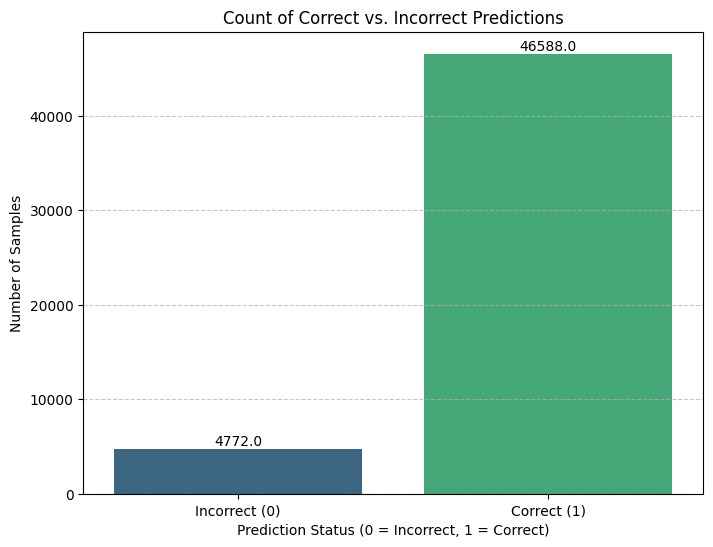

In [12]:
# Print y_test and y_pred (original team names for clarity)
print("\n--- y_test vs y_pred ---")
# Create a DataFrame for easy comparison
comparison_df = pd.DataFrame({
    'Actual Winner': y_test_original,
    'Predicted Winner': y_pred_original
})
# Add a column indicating if the prediction was correct
comparison_df['Correct Prediction'] = (comparison_df['Actual Winner'] == comparison_df['Predicted Winner']).astype(int)
print(comparison_df) # Print entire DataFrame

# Plotting the histogram of correct vs. incorrect predictions
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Correct Prediction', data=comparison_df, palette='viridis')
plt.title('Count of Correct vs. Incorrect Predictions')
plt.xlabel('Prediction Status (0 = Incorrect, 1 = Correct)')
plt.ylabel('Number of Samples')
plt.xticks(ticks=[0, 1], labels=['Incorrect (0)', 'Correct (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


--- Feature Importance ---

Feature Importances (Top 15):
batting_team        0.480274
bowling_team        0.354907
inning              0.036109
non_striker         0.025082
batter              0.023842
bowler              0.020143
is_wicket           0.015172
over                0.011589
total_runs          0.010857
batsman_runs        0.008508
player_dismissed    0.003510
dismissal_kind      0.003244
extras_type         0.002478
extra_runs          0.002308
ball                0.001977
dtype: float32


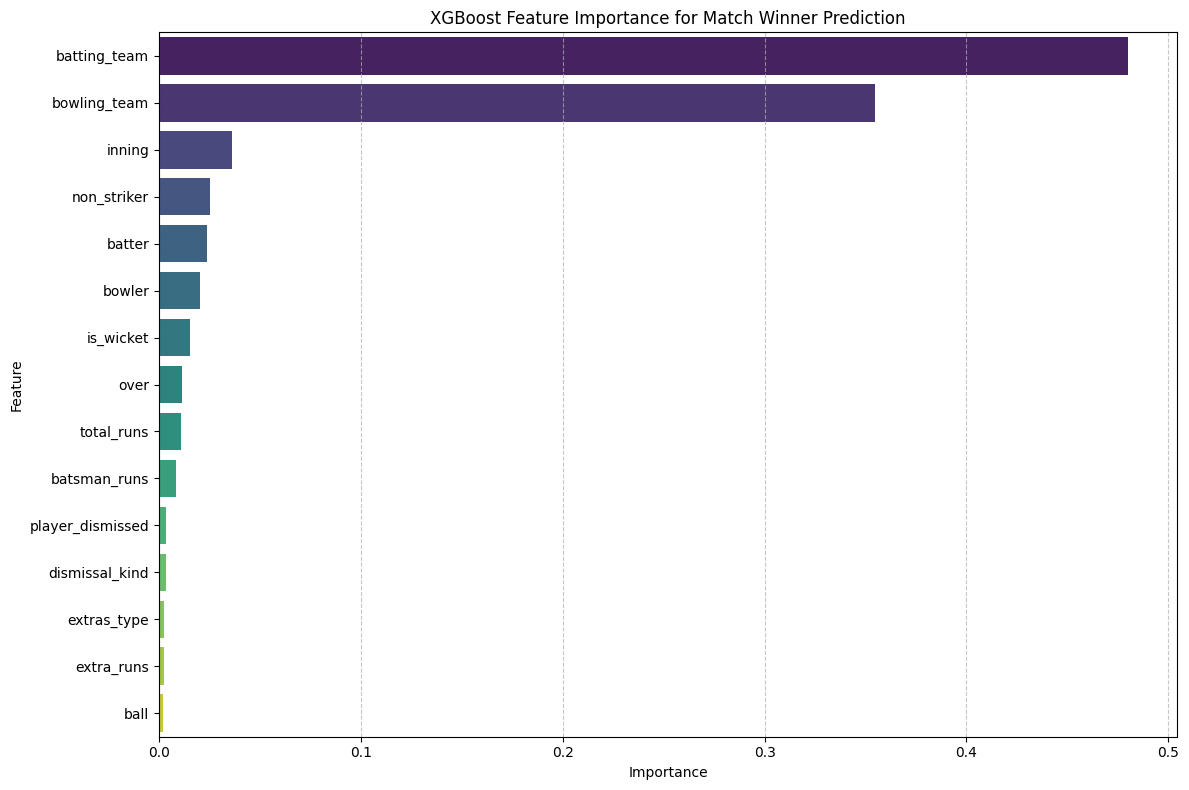

In [13]:
# Feature Importance
print("\n--- Feature Importance ---")
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a Series with feature names and their importances
features_df = pd.Series(feature_importances, index=X.columns)

# Sort the features by importance in descending order
features_df = features_df.sort_values(ascending=False)

print("\nFeature Importances (Top 15):")
print(features_df.head(15))

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=features_df.values, y=features_df.index, palette='viridis')
plt.title('XGBoost Feature Importance for Match Winner Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()



--- Prediction Error Analysis ---

Confusion Matrix:


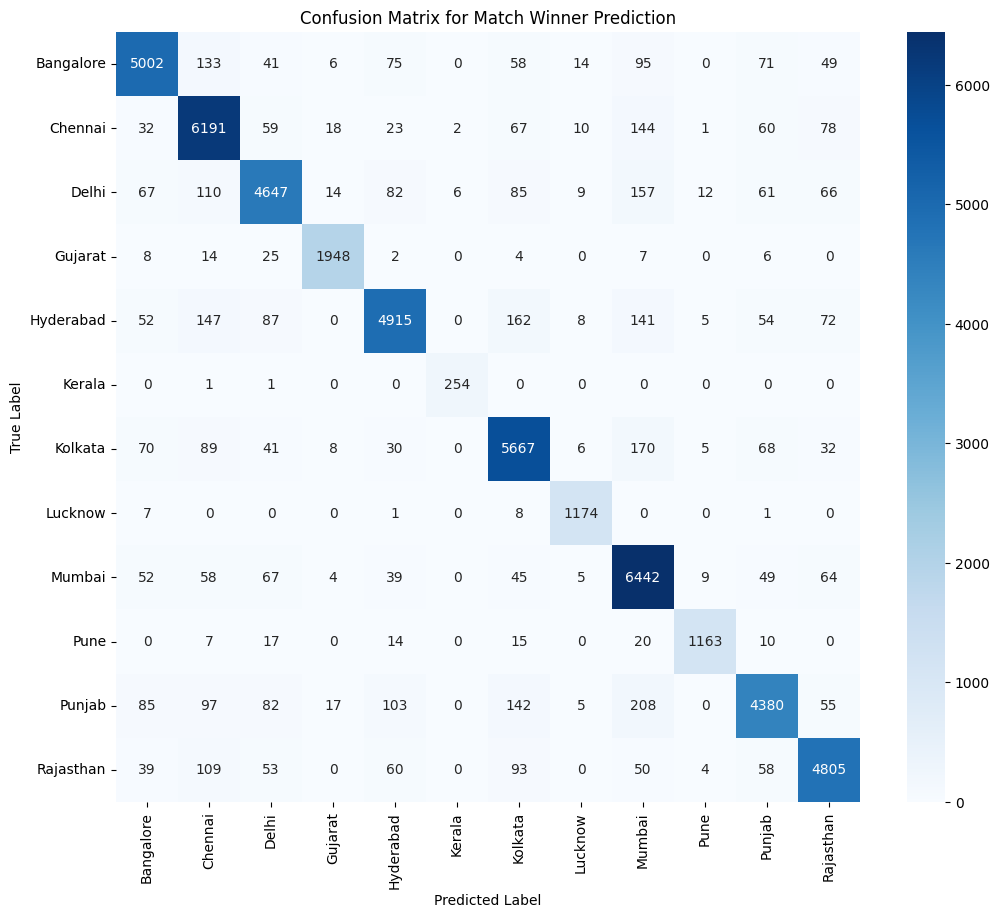


Total misclassified samples: 4772

Some Misclassified Examples (Actual vs. Predicted):
Sample 3: Actual='Hyderabad', Predicted='Kolkata'
Sample 10: Actual='Chennai', Predicted='Delhi'
Sample 37: Actual='Hyderabad', Predicted='Mumbai'
Sample 44: Actual='Chennai', Predicted='Mumbai'
Sample 54: Actual='Hyderabad', Predicted='Chennai'
Sample 78: Actual='Delhi', Predicted='Kolkata'
Sample 80: Actual='Punjab', Predicted='Bangalore'
Sample 83: Actual='Mumbai', Predicted='Punjab'
Sample 88: Actual='Hyderabad', Predicted='Punjab'
Sample 92: Actual='Pune', Predicted='Kolkata'

--- End of Error Analysis ---


In [14]:
# Extensive Prediction Error Analysis
print("\n--- Prediction Error Analysis ---")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_original)
# Get class labels in the order they appear in the confusion matrix
class_labels = target_label_encoder.classes_
print("\nConfusion Matrix:")
# Plotting the confusion matrix for better interpretability
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Match Winner Prediction')
plt.show()

# Identify misclassified examples (up to 10 for demonstration)
misclassified_indices = np.where(y_test_original != y_pred_original)[0]
print(f"\nTotal misclassified samples: {len(misclassified_indices)}")

if len(misclassified_indices) > 0:
    print("\nSome Misclassified Examples (Actual vs. Predicted):")
    # Take a sample of misclassified indices if there are too many
    sample_misclassified_indices = misclassified_indices[:min(len(misclassified_indices), 10)]

    for i in sample_misclassified_indices:
        actual_winner = y_test_original[i]
        predicted_winner = y_pred_original[i]
        # You might want to print some features of the misclassified sample here
        # E.g., X_test.iloc[i]
        print(f"Sample {i+1}: Actual='{actual_winner}', Predicted='{predicted_winner}'")
else:
    print("\nNo misclassified samples found in the test set. (This is rare with real data)")

print("\n--- End of Error Analysis ---")

(LLM model was used for refining the text)

**Note on Predicting Match Winners Using Ball-by-Ball Data**

Using ball-by-ball data (as in `sample_cricket.csv`) to predict match winners can lead to **artificially inflated accuracy**.

#### Why This Happens:

* In ball-by-ball datasets, each row represents a single delivery, but the **winner column remains the same** for all rows from the same match.
* As a result, the model is not truly predicting the winner based on match conditions or aggregated features.
* Instead, it **learns the outcome repeatedly**, since every ball carries the same label for the winner.
* This creates a misleadingly high accuracy—often exceeding 90%—because the model is effectively "seeing the answer" multiple times during training.

#### What We Actually Want:

Currently, we are predicting: *"Given the match details, which of these 8 teams will be the winner?"*

However, what we actually aim for is a **win/loss prediction for a single match**, which is a binary classification problem.

Instead of predicting the winner from multiple possible teams, we want the model to predict whether a team wins or loses within a match. This can be accomplished using a **binary classifier** on the winner column (i.e., win = 1, loss = 0).

To build a realistic predictor, it's better to use pre-match or aggregated features per match rather than individual ball records.




#### Aggregating innings score

In [15]:

### 1. Aggregate by innings
def aggregate_by_innings(df):
  """
    Aggregates the cricket dataset by innings for each match.

    Args:
        df (pd.DataFrame): The dataframe containing match and delivery data.

    Returns:
        pd.DataFrame: A dataframe with aggregated statistics for each match,
                      separated by inning.
    """
  inning1_df = df[df['inning'] == 1].groupby('id').agg(
      inning1_runs=('total_runs', 'sum'),
      inning1_wickets=('is_wicket', 'sum'),
      inning1_balls=('ball', 'count')
  ).reset_index()

  inning2_df = df[df['inning'] == 2].groupby('id').agg(
      inning2_runs=('total_runs', 'sum'),
      inning2_wickets=('is_wicket', 'sum'),
      inning2_balls=('ball', 'count')
  ).reset_index()

  # Merge the innings data
  aggregated_df = pd.merge(
      inning1_df,
      inning2_df,
      on='id',
      how='left'
  )

  # Handle matches that might have ended in the first inning (rare in T20, but possible)
  aggregated_df.fillna(0, inplace=True)

  # Add match-level information (assuming matches_df is available or can be derived)
  # This part assumes you have a df_matches available or can create it
  # For this example, let's merge with the cleaned match details from final_cleaned_df
  match_details = df[['id', 'season', 'city', 'venue', 'toss_winner', 'toss_decision','team1', 'team2',
                                    'winner', 'result', 'umpire1', 'umpire2', 'player_of_match']].drop_duplicates(subset=['id'])

  aggregated_df = pd.merge(
      aggregated_df,
      match_details,
      on='id',
      how='left'
  )


  return aggregated_df

aggregated_match_data_by_innings = aggregate_by_innings(ml_parth)
aggregated_match_data_by_innings.to_csv('aggregated_match_data_by_innings.csv')


aggregated_match_data_by_innings = pd.DataFrame(aggregated_match_data_by_innings)



In [16]:
# Define the teams to remove
teams_to_remove = ['Pune', 'Kerala', 'Gujarat', 'Lucknow']

# Directly apply the filtering logic without a function
# Create boolean masks for each column to identify rows that should be removed
mask_team1 = aggregated_match_data_by_innings['team1'].isin(teams_to_remove)
mask_team2 = aggregated_match_data_by_innings['team2'].isin(teams_to_remove)
mask_winner = aggregated_match_data_by_innings['winner'].isin(teams_to_remove)

# Combine the masks using logical OR to get a single mask for rows to be removed
rows_to_remove = mask_team1 | mask_team2 | mask_winner

# Invert the mask to select only the rows that should be kept
aggregated_match_data_by_innings = aggregated_match_data_by_innings[~rows_to_remove].copy()

print(f"DataFrame after removing matches involving teams: {teams_to_remove}")
print(aggregated_match_data_by_innings)


DataFrame after removing matches involving teams: ['Pune', 'Kerala', 'Gujarat', 'Lucknow']
           id  inning1_runs  inning1_wickets  inning1_balls  inning2_runs  \
0      335982           222                3            124            82   
1      335983           240                5            124           207   
2      335984           129                8            122           132   
3      335985           165                7            123           166   
4      335986           110               10            118           112   
...       ...           ...              ...            ...           ...   
1071  1426307           214                5            125           215   
1072  1426309           159               10            124           164   
1073  1426310           172                8            122           174   
1074  1426311           175                9            127           139   
1075  1426312           113               10            117   

In [17]:
print(aggregated_match_data_by_innings.head())
print(aggregated_match_data_by_innings.shape)
aggregated_match_data_by_innings.info()

aggregated_match_data_by_innings.to_csv('aggregated_match_data_by_innings_wo_small_dataset.csv')

       id  inning1_runs  inning1_wickets  inning1_balls  inning2_runs  \
0  335982           222                3            124            82   
1  335983           240                5            124           207   
2  335984           129                8            122           132   
3  335985           165                7            123           166   
4  335986           110               10            118           112   

   inning2_wickets  inning2_balls  season        city  \
0               10            101    2008   Bangalore   
1                4            124    2008  Chandigarh   
2                1             97    2008       Delhi   
3                5            123    2008      Mumbai   
4                5            122    2008     Kolkata   

                                venue toss_winner toss_decision      team1  \
0               M Chinnaswamy Stadium   Bangalore         field  Bangalore   
1  Punjab Cricket Association Stadium     Chennai           ba

#### Using all teams aggregated match by match dataset

In [18]:
# Using 'aggregated_match_data_by_innings.csv'
df = pd.read_csv('aggregated_match_data_by_innings.csv')

print("New Aggregated Dataset Info:")
df.info()
print("\nFirst 5 rows of new aggregated dataset:")
print(df.head())
print("-" * 30)

New Aggregated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1076 non-null   int64 
 1   id               1076 non-null   int64 
 2   inning1_runs     1076 non-null   int64 
 3   inning1_wickets  1076 non-null   int64 
 4   inning1_balls    1076 non-null   int64 
 5   inning2_runs     1076 non-null   int64 
 6   inning2_wickets  1076 non-null   int64 
 7   inning2_balls    1076 non-null   int64 
 8   season           1076 non-null   int64 
 9   city             1076 non-null   object
 10  venue            1076 non-null   object
 11  toss_winner      1076 non-null   object
 12  toss_decision    1076 non-null   object
 13  team1            1076 non-null   object
 14  team2            1076 non-null   object
 15  winner           1076 non-null   object
 16  result           1076 non-null   object
 17  umpi

In [19]:
# Identify potential feature columns from the aggregated data
# Excluding 'Unnamed: 0' as it's typically an index, and 'id' if it's a unique match ID
# We'll include columns that provide context about the match, teams, and aggregated innings performance.
# These columns are inferred based on typical aggregated cricket data structure.
# You might need to adjust this list if your CSV has different column names or specific aggregated stats.
initial_features = [col for col in df.columns if col not in ['Unnamed: 0', 'id', target, 'result', 'result_margin']]

# Let's inspect unique values for some categorical columns to ensure they are suitable
# For example, if 'match_id' is still present and unique per row, it should be excluded from features.
# If 'inning' refers to 1st or 2nd innings and each row is an innings, it can be a feature.
# Assuming 'match_id' and 'Unnamed: 0' are identifiers, they are excluded from features.

# Filter out features that are likely identifiers or direct outcome variables (data leakage)
# after loading and inspecting the new dataset.
# The 'result' and 'result_margin' columns are outcomes and should be excluded from features.
# The 'match_id' is also an identifier and should be excluded.

# Define features based on the aggregated data. This list might need adjustment
# depending on the actual columns in your 'aggregated_match_data_by_innings.csv'.
# For demonstration, I'm making an educated guess on relevant aggregated features.
features = [
    'inning1_runs', 'inning1_wickets', 'inning1_balls',
    'inning2_runs', 'inning2_wickets', 'inning2_balls','team1', 'team2',
    'season', 'city', 'venue', 'toss_winner', 'toss_decision',
    'umpire1', 'umpire2', 'player_of_match' # 'player_of_match' is typically determined after the match,
                                          # so it might cause data leakage. Consider removing if accuracy is too high.
]

# Ensure only selected features and target are in the DataFrame, and drop NaNs
# This line will select only the columns defined in `features` and `target` from the loaded df.
# If some of the `features` listed above are not present in your actual `aggregated_match_data_by_innings.csv`,
# this line will cause a KeyError. Please verify column names from `df.columns` after loading.
df = df[features + [target]].dropna()

print("\nDataFrame Info after column selection and dropping NaNs:")
df.info()
print("\nFirst 5 rows after selection and dropping NaNs (using new features):")
print(df.head())
print("-" * 30)




DataFrame Info after column selection and dropping NaNs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   inning1_runs     1076 non-null   int64 
 1   inning1_wickets  1076 non-null   int64 
 2   inning1_balls    1076 non-null   int64 
 3   inning2_runs     1076 non-null   int64 
 4   inning2_wickets  1076 non-null   int64 
 5   inning2_balls    1076 non-null   int64 
 6   team1            1076 non-null   object
 7   team2            1076 non-null   object
 8   season           1076 non-null   int64 
 9   city             1076 non-null   object
 10  venue            1076 non-null   object
 11  toss_winner      1076 non-null   object
 12  toss_decision    1076 non-null   object
 13  umpire1          1076 non-null   object
 14  umpire2          1076 non-null   object
 15  player_of_match  1076 non-null   object
 16  winner           107

In [20]:


# Separate features (X) and target (y)
X = df[features]
y = df[target]

print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print("-" * 30)

# Initialize LabelEncoder for the target column first, to get classes for inverse transformation later
target_label_encoder = LabelEncoder()
y_encoded = target_label_encoder.fit_transform(y)

# Store encoders for each column
feature_encoders = {}
# Encode categorical features in X
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        feature_encoders[column] = le # Store the encoder for potential inverse transform if needed
        print(f"Encoded categorical feature: '{column}'")


print("\nX (features) after encoding categorical columns (first 5 rows):")
print(X.head())
print("\ny (target) after encoding 'winner' column (first 5 values):")
print(pd.Series(y_encoded).head())
print("-" * 30)

# Split the data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the XGBClassifier with simple parameters
model = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Train the model
model.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred_encoded = model.predict(X_test)

# Convert encoded predictions and true values back to original team names for better readability
y_test_original = target_label_encoder.inverse_transform(y_test_encoded)
y_pred_original = target_label_encoder.inverse_transform(y_pred_encoded)

print("\n--- Model Evaluation ---")

# Evaluate the model
accuracy = accuracy_score(y_test_original, y_pred_original)
report = classification_report(y_test_original, y_pred_original, zero_division=0)

print(f"\nAccuracy Score: {accuracy:.4f}")
print("\nClassification Report:\n", report)


Shape of features (X): (1076, 16)
Shape of target (y): (1076,)
------------------------------
Encoded categorical feature: 'team1'
Encoded categorical feature: 'team2'
Encoded categorical feature: 'city'
Encoded categorical feature: 'venue'
Encoded categorical feature: 'toss_winner'
Encoded categorical feature: 'toss_decision'
Encoded categorical feature: 'umpire1'
Encoded categorical feature: 'umpire2'
Encoded categorical feature: 'player_of_match'

X (features) after encoding categorical columns (first 5 rows):
   inning1_runs  inning1_wickets  inning1_balls  inning2_runs  \
0           222                3            124            82   
1           240                5            124           207   
2           129                8            122           132   
3           165                7            123           166   
4           110               10            118           112   

   inning2_wickets  inning2_balls  team1  team2  season  city  venue  \
0               1


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


--- Model Evaluation ---

Accuracy Score: 0.6944

Classification Report:
               precision    recall  f1-score   support

   Bangalore       0.83      0.80      0.82        25
     Chennai       0.85      0.82      0.84        28
       Delhi       0.62      0.65      0.64        23
     Gujarat       1.00      0.42      0.59        12
   Hyderabad       0.67      0.70      0.68        20
     Kolkata       0.67      0.55      0.60        29
     Lucknow       1.00      0.50      0.67         4
      Mumbai       0.66      0.74      0.70        31
        Pune       0.60      0.60      0.60         5
      Punjab       0.52      0.82      0.64        17
   Rajasthan       0.68      0.68      0.68        22

    accuracy                           0.69       216
   macro avg       0.74      0.66      0.68       216
weighted avg       0.72      0.69      0.69       216




--- y_test vs y_pred ---
    Actual Winner Predicted Winner  Correct Prediction
0          Punjab           Punjab                   1
1          Mumbai           Mumbai                   1
2         Kolkata          Kolkata                   1
3           Delhi            Delhi                   1
4         Lucknow        Hyderabad                   0
..            ...              ...                 ...
211         Delhi        Rajasthan                   0
212       Lucknow          Kolkata                   0
213     Hyderabad        Rajasthan                   0
214        Punjab            Delhi                   0
215     Bangalore        Rajasthan                   0

[216 rows x 3 columns]


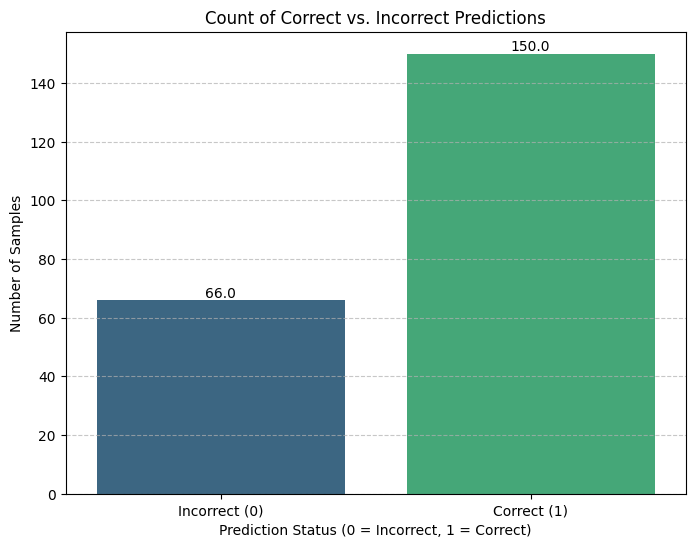

In [21]:
# Print y_test and y_pred (original team names for clarity)
print("\n--- y_test vs y_pred ---")
# Create a DataFrame for easy comparison
comparison_df = pd.DataFrame({
    'Actual Winner': y_test_original,
    'Predicted Winner': y_pred_original
})
# Add a column indicating if the prediction was correct
comparison_df['Correct Prediction'] = (comparison_df['Actual Winner'] == comparison_df['Predicted Winner']).astype(int)
print(comparison_df)

# Plotting the histogram of correct vs. incorrect predictions
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Correct Prediction', data=comparison_df, palette='viridis')
plt.title('Count of Correct vs. Incorrect Predictions')
plt.xlabel('Prediction Status (0 = Incorrect, 1 = Correct)')
plt.ylabel('Number of Samples')
plt.xticks(ticks=[0, 1], labels=['Incorrect (0)', 'Correct (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()



--- Prediction Error Analysis ---

Confusion Matrix:


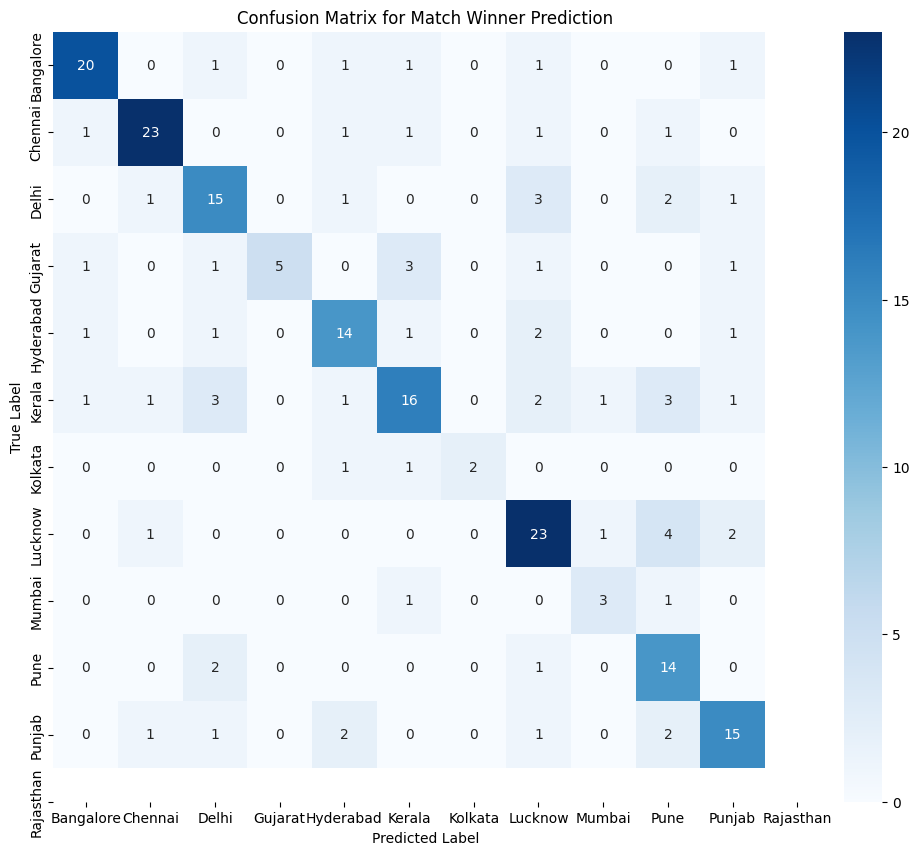

In [22]:
# Extensive Prediction Error Analysis
print("\n--- Prediction Error Analysis ---")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_original)
# Get class labels in the order they appear in the confusion matrix
class_labels = target_label_encoder.classes_
print("\nConfusion Matrix:")
# Plotting the confusion matrix for better interpretability
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Match Winner Prediction')
plt.show()




--- Feature Importance ---

Feature Importances (Top 15):
team2              0.200971
team1              0.195386
toss_winner        0.127349
venue              0.077263
season             0.060446
inning2_wickets    0.042016
toss_decision      0.037287
player_of_match    0.036847
inning1_runs       0.036519
inning2_balls      0.031050
inning2_runs       0.030345
inning1_balls      0.027946
city               0.025343
inning1_wickets    0.024456
umpire1            0.024441
dtype: float32


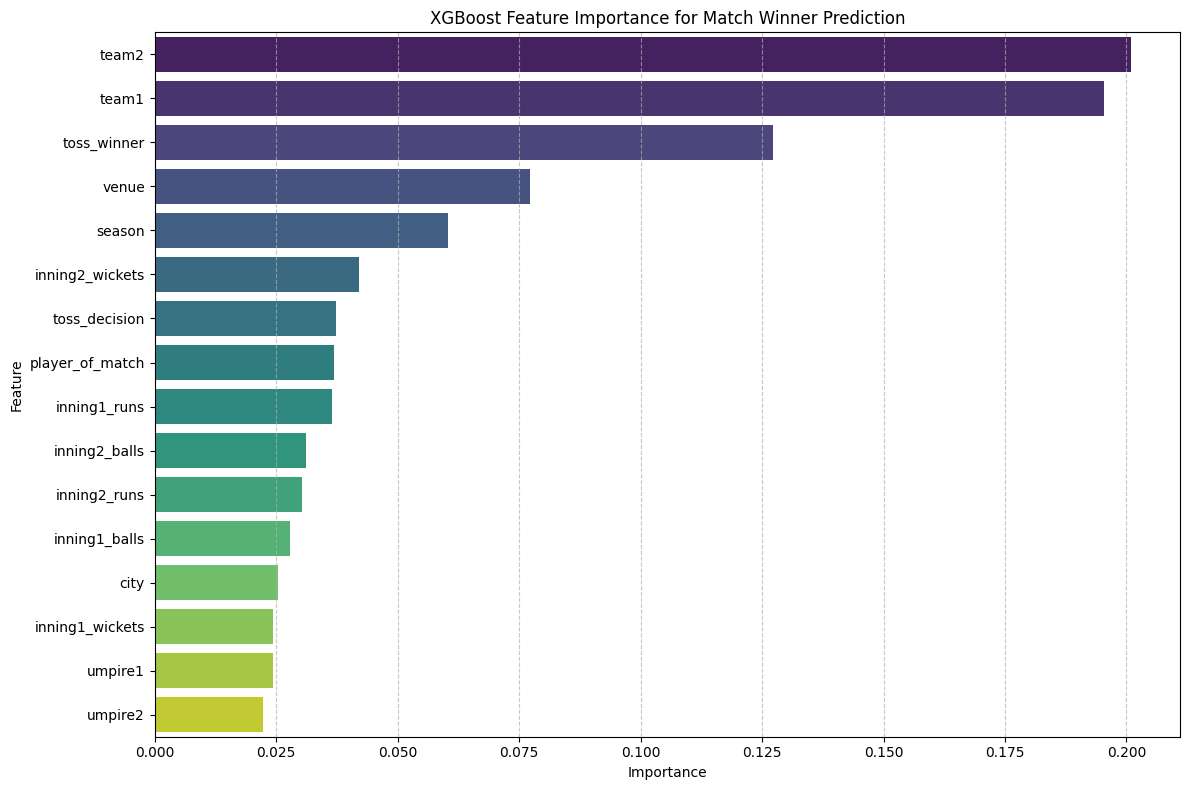


Total misclassified samples: 66

Some Misclassified Examples (Actual vs. Predicted):
Sample 5: Actual='Lucknow', Predicted='Hyderabad'
Sample 8: Actual='Bangalore', Predicted='Kolkata'
Sample 16: Actual='Mumbai', Predicted='Rajasthan'
Sample 28: Actual='Chennai', Predicted='Hyderabad'
Sample 33: Actual='Bangalore', Predicted='Hyderabad'
Sample 34: Actual='Mumbai', Predicted='Punjab'
Sample 38: Actual='Hyderabad', Predicted='Mumbai'
Sample 39: Actual='Bangalore', Predicted='Delhi'
Sample 40: Actual='Delhi', Predicted='Hyderabad'
Sample 51: Actual='Mumbai', Predicted='Pune'

--- End of Error Analysis ---


In [23]:
# Feature Importance
print("\n--- Feature Importance ---")
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a Series with feature names and their importances
features_df = pd.Series(feature_importances, index=X.columns)

# Sort the features by importance in descending order
features_df = features_df.sort_values(ascending=False)

print("\nFeature Importances (Top 15):")
print(features_df.head(15))

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=features_df.values, y=features_df.index, palette='viridis')
plt.title('XGBoost Feature Importance for Match Winner Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Identify misclassified examples (up to 10 for demonstration)
misclassified_indices = np.where(y_test_original != y_pred_original)[0]
print(f"\nTotal misclassified samples: {len(misclassified_indices)}")

if len(misclassified_indices) > 0:
    print("\nSome Misclassified Examples (Actual vs. Predicted):")
    # Take a sample of misclassified indices if there are too many
    sample_misclassified_indices = misclassified_indices[:min(len(misclassified_indices), 10)]

    for i in sample_misclassified_indices:
        actual_winner = y_test_original[i]
        predicted_winner = y_pred_original[i]
        # You might want to print some features of the misclassified sample here
        # E.g., X_test.iloc[i]
        print(f"Sample {i+1}: Actual='{actual_winner}', Predicted='{predicted_winner}'")
else:
    print("\nNo misclassified samples found in the test set. (This is rare with real data)")

print("\n--- End of Error Analysis ---")

#### Addressing Data Leakage (Highest Priority)

#### Current Problem:

1. **Player of the Match:**

   * The "player of the match" is awarded **after** the match ends, once the winner is already known.
   * Including this as a feature in the model creates significant **data leakage** since the model essentially has access to the match outcome before making a prediction.

#### Key Changes to Make:

* **Removing Data Leak Features:**

  * **Innings 2 & Player of the Match Data** should be removed from the features, as they leak information about the winner before the model even predicts it.
  * **`inning2_runs`, `inning2_wickets`, `inning2_balls`:**

    * If the goal is to predict the winner **before** the match starts, or after the first innings but before the second innings is played, these features are also problematic.
    * They describe the **outcome of the second innings**, which hasn't happened at the point of prediction, creating leakage.
  * If the intention is to predict the winner after both innings are completed but **before the 'winner' is explicitly declared**, then these features might still be acceptable, but it reduces the complexity of the prediction task.

#### Why This Matters:

* The goal is to make the prediction as realistic and challenging as possible. Since your comment about "lower prediction capabilities" suggests you're aiming for a **more difficult prediction problem**, removing features that provide future knowledge will make the model's task much more meaningful and true to real-world prediction scenarios.


In [24]:
# --- Load the new aggregated dataset ---
# Using 'aggregated_match_data_by_innings.csv' as requested
df = pd.read_csv('aggregated_match_data_by_innings.csv')

In [25]:
# Display the new aggregated dataset information
print("New Aggregated Dataset Info:")
df.info()
print("\nFirst 5 rows of new aggregated dataset:")
print(df.head())
print("-" * 30)

# Define the target column
target = 'winner'

# --- Updated Features based on provided column list and removing data leakage ---
# Removed 'inning2_runs', 'inning2_wickets', 'inning2_balls', and 'player_of_match'
# Added 'team1' and 'team2'
features = [
    'inning1_runs', 'inning1_wickets', 'inning1_balls',
    'season', 'city', 'venue', 'toss_winner', 'toss_decision',
    'umpire1', 'umpire2',
    'team1', 'team2'
]

New Aggregated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1076 non-null   int64 
 1   id               1076 non-null   int64 
 2   inning1_runs     1076 non-null   int64 
 3   inning1_wickets  1076 non-null   int64 
 4   inning1_balls    1076 non-null   int64 
 5   inning2_runs     1076 non-null   int64 
 6   inning2_wickets  1076 non-null   int64 
 7   inning2_balls    1076 non-null   int64 
 8   season           1076 non-null   int64 
 9   city             1076 non-null   object
 10  venue            1076 non-null   object
 11  toss_winner      1076 non-null   object
 12  toss_decision    1076 non-null   object
 13  team1            1076 non-null   object
 14  team2            1076 non-null   object
 15  winner           1076 non-null   object
 16  result           1076 non-null   object
 17  umpi

In [26]:
# Ensure only selected features and target are in the DataFrame, and drop NaNs
df_selected = df[features + [target]].dropna().copy() # .copy() to avoid SettingWithCopyWarning
# Check if all features are present in the DataFrame
print("\nDataFrame Info after column selection and dropping NaNs:")
df_selected.info()
print("\nFirst 5 rows after selection and dropping NaNs (using new features):")
print(df_selected.head())
print("-" * 30)


DataFrame Info after column selection and dropping NaNs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   inning1_runs     1076 non-null   int64 
 1   inning1_wickets  1076 non-null   int64 
 2   inning1_balls    1076 non-null   int64 
 3   season           1076 non-null   int64 
 4   city             1076 non-null   object
 5   venue            1076 non-null   object
 6   toss_winner      1076 non-null   object
 7   toss_decision    1076 non-null   object
 8   umpire1          1076 non-null   object
 9   umpire2          1076 non-null   object
 10  team1            1076 non-null   object
 11  team2            1076 non-null   object
 12  winner           1076 non-null   object
dtypes: int64(4), object(9)
memory usage: 109.4+ KB

First 5 rows after selection and dropping NaNs (using new features):
   inning1_runs  inning1_wickets  inni

In [27]:
# Separate features (X) and target (y)
X = df_selected[features]
y = df_selected[target]

print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print("-" * 30)

# Initialize LabelEncoder for the target column first, to get classes for inverse transformation later
target_label_encoder = LabelEncoder()
y_encoded = target_label_encoder.fit_transform(y)

# Store encoders for each column
feature_encoders = {}
# Encode categorical features in X
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        feature_encoders[column] = le # Store the encoder for potential inverse transform if needed
        print(f"Encoded categorical feature: '{column}'")

print("\nX (features) after encoding categorical columns (first 5 rows):")
print(X.head())
print("\ny (target) after encoding 'winner' column (first 5 values):")
print(pd.Series(y_encoded).head())
print("-" * 30)

# --- Loop through different test_size values ---
test_sizes = np.arange(0.15, 0.41, 0.05) # From 0.15 to 0.40 with step of 0.05

all_accuracies = {}
all_reports = {}

for test_size in test_sizes:
    print(f"\n--- Running model with test_size = {test_size:.2f} ---")

    # Split the data into training and testing sets
    X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=test_size, random_state=42)

    # Initialize the XGBClassifier with simple parameters
    model = XGBClassifier(eval_metric='mlogloss', random_state=42)

    # Train the model
    model.fit(X_train, y_train_encoded)

    # Make predictions on the test set
    y_pred_encoded = model.predict(X_test)

    # Convert encoded predictions and true values back to original team names for better readability
    y_test_original = target_label_encoder.inverse_transform(y_test_encoded)
    y_pred_original = target_label_encoder.inverse_transform(y_pred_encoded)

    # Evaluate the model
    accuracy = accuracy_score(y_test_original, y_pred_original)
    report = classification_report(y_test_original, y_pred_original, zero_division=0)

    all_accuracies[test_size] = accuracy
    all_reports[test_size] = report

    print(f"\nAccuracy Score for test_size {test_size:.2f}: {accuracy:.4f}")
    print(f"\nClassification Report for test_size {test_size:.2f}:\n", report)

    # Store results for the last iteration to plot detailed analyses later
    if test_size == test_sizes[-1]:
        final_y_test_original = y_test_original
        final_y_pred_original = y_pred_original
        final_X_test = X_test
        final_model = model

print("\n--- Summary of Accuracies across different test_sizes ---")
for ts, acc in all_accuracies.items():
    print(f"Test Size: {ts:.2f}, Accuracy: {acc:.4f}")

print("\n--- Detailed Analysis for the last test_size (0.40) ---")





Shape of features (X): (1076, 12)
Shape of target (y): (1076,)
------------------------------
Encoded categorical feature: 'city'
Encoded categorical feature: 'venue'
Encoded categorical feature: 'toss_winner'
Encoded categorical feature: 'toss_decision'
Encoded categorical feature: 'umpire1'
Encoded categorical feature: 'umpire2'
Encoded categorical feature: 'team1'
Encoded categorical feature: 'team2'

X (features) after encoding categorical columns (first 5 rows):
   inning1_runs  inning1_wickets  inning1_balls  season  city  venue  \
0           222                3            124    2008     2     17   
1           240                5            124    2008     7     27   
2           129                8            122    2008    10     11   
3           165                7            123    2008    26     39   
4           110               10            118    2008    23     10   

   toss_winner  toss_decision  umpire1  umpire2  team1  team2  
0            0              1 


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


Accuracy Score for test_size 0.15: 0.5926

Classification Report for test_size 0.15:
               precision    recall  f1-score   support

   Bangalore       0.67      0.71      0.69        17
     Chennai       0.80      0.57      0.67        21
       Delhi       0.58      0.69      0.63        16
     Gujarat       0.83      0.45      0.59        11
   Hyderabad       0.69      0.60      0.64        15
     Kolkata       0.57      0.63      0.60        19
     Lucknow       1.00      0.50      0.67         2
      Mumbai       0.52      0.64      0.57        22
        Pune       0.40      0.40      0.40         5
      Punjab       0.38      0.69      0.49        13
   Rajasthan       0.69      0.43      0.53        21

    accuracy                           0.59       162
   macro avg       0.65      0.57      0.59       162
weighted avg       0.63      0.59      0.60       162


--- Running model with test_size = 0.20 ---

Accuracy Score for test_size 0.20: 0.5556

Classificat


--- y_test vs y_pred ---
    Actual Winner Predicted Winner  Correct Prediction
0          Punjab          Kolkata                   0
1          Mumbai           Mumbai                   1
2         Kolkata           Mumbai                   0
3           Delhi            Delhi                   1
4         Lucknow          Lucknow                   1
..            ...              ...                 ...
426       Chennai          Chennai                   1
427     Hyderabad           Mumbai                   0
428       Chennai          Chennai                   1
429       Chennai          Kolkata                   0
430       Kolkata           Punjab                   0

[431 rows x 3 columns]


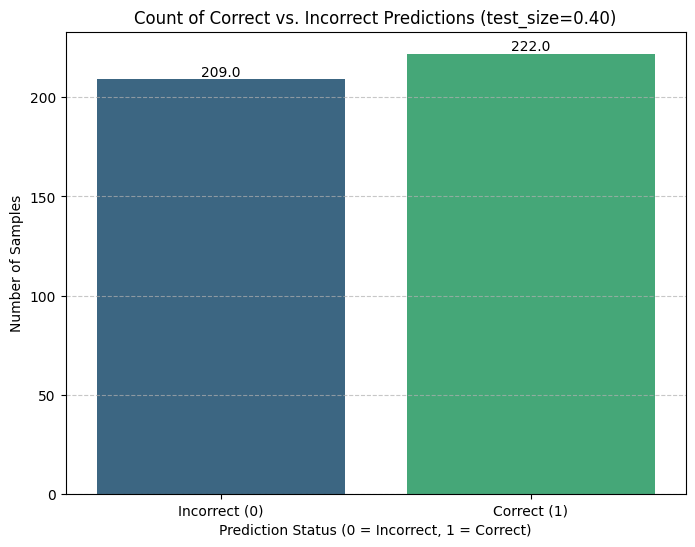

In [28]:
# Print y_test and y_pred (original team names for clarity) from the last iteration
print("\n--- y_test vs y_pred ---")
# Create a DataFrame for easy comparison
comparison_df = pd.DataFrame({
    'Actual Winner': final_y_test_original,
    'Predicted Winner': final_y_pred_original
})
# Add a column indicating if the prediction was correct
comparison_df['Correct Prediction'] = (comparison_df['Actual Winner'] == comparison_df['Predicted Winner']).astype(int)
print(comparison_df)

# Plotting the histogram of correct vs. incorrect predictions
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Correct Prediction', data=comparison_df, palette='viridis')
plt.title(f'Count of Correct vs. Incorrect Predictions (test_size={test_sizes[-1]:.2f})')
plt.xlabel('Prediction Status (0 = Incorrect, 1 = Correct)')
plt.ylabel('Number of Samples')
plt.xticks(ticks=[0, 1], labels=['Incorrect (0)', 'Correct (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()





--- Prediction Error Analysis ---

Confusion Matrix:


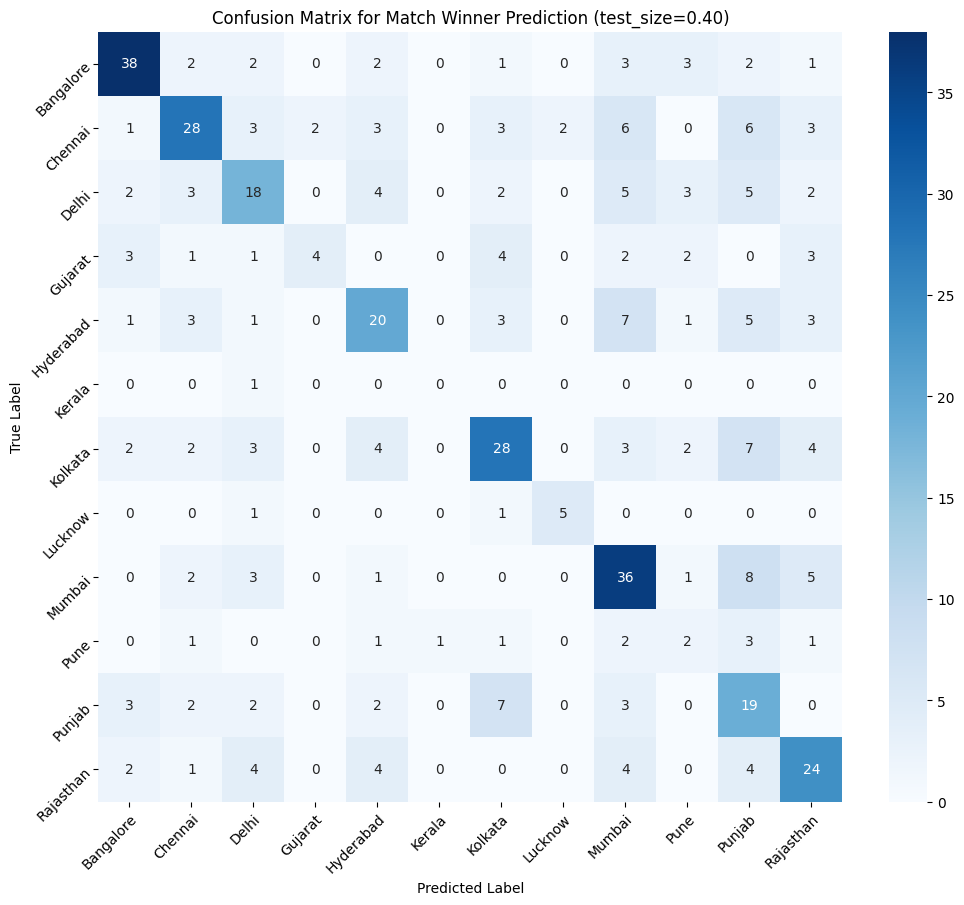

In [29]:
# Extensive Prediction Error Analysis
print("\n--- Prediction Error Analysis ---")

# Confusion Matrix
conf_matrix = confusion_matrix(final_y_test_original, final_y_pred_original)
# Get class labels in the order they appear in the confusion matrix
class_labels = target_label_encoder.classes_
print("\nConfusion Matrix:")
# Plotting the confusion matrix for better interpretability
plt.figure(figsize=(12, 10))
ax_conf_matrix = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for Match Winner Prediction (test_size={test_sizes[-1]:.2f})')

# Rotate x and y axis labels
plt.setp(ax_conf_matrix.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax_conf_matrix.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.show()


--- Feature Importance ---

Feature Importances (Top 15):
team1              0.241334
toss_winner        0.199038
team2              0.176145
venue              0.068913
season             0.067087
inning1_runs       0.044613
umpire1            0.038792
inning1_balls      0.038535
city               0.035873
umpire2            0.033810
toss_decision      0.030288
inning1_wickets    0.025572
dtype: float32


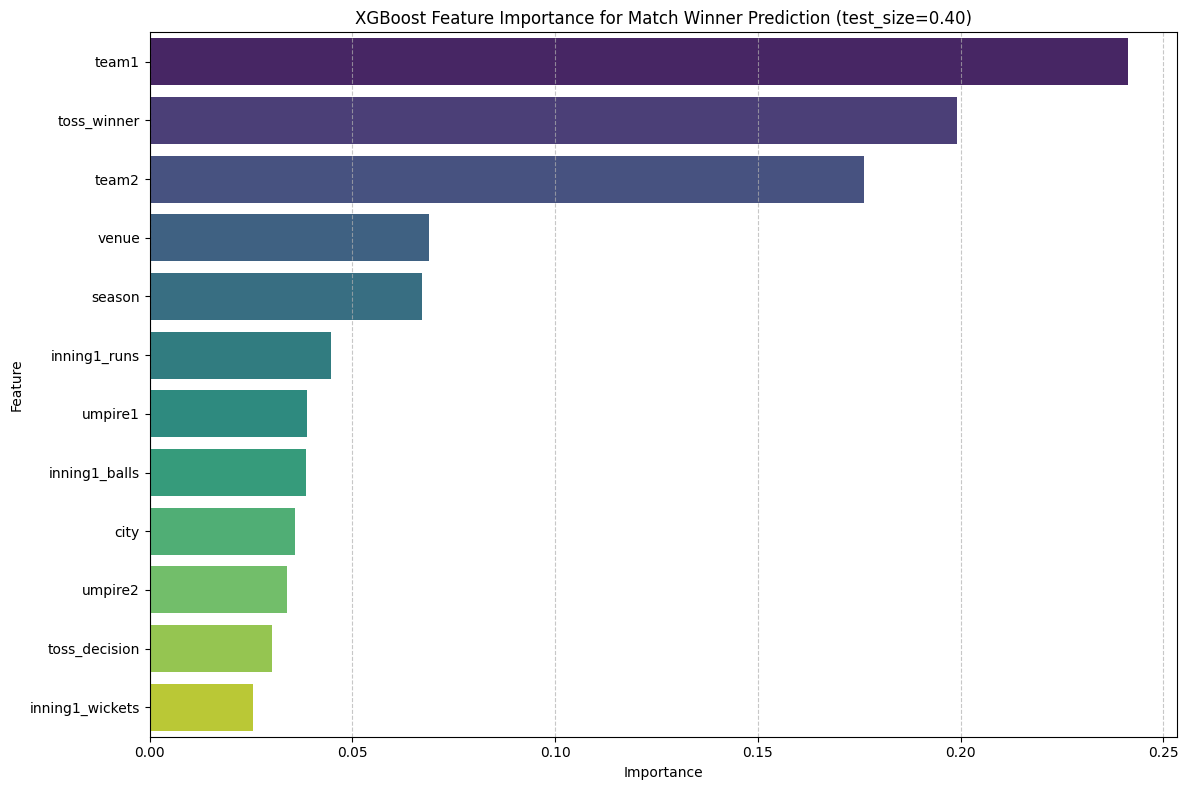


Total misclassified samples: 209

Some Misclassified Examples (Actual vs. Predicted):
Sample 1: Actual='Punjab', Predicted='Kolkata'
Sample 3: Actual='Kolkata', Predicted='Mumbai'
Sample 7: Actual='Chennai', Predicted='Delhi'
Sample 12: Actual='Hyderabad', Predicted='Punjab'
Sample 17: Actual='Kolkata', Predicted='Hyderabad'
Sample 18: Actual='Bangalore', Predicted='Mumbai'
Sample 19: Actual='Gujarat', Predicted='Rajasthan'
Sample 20: Actual='Mumbai', Predicted='Delhi'
Sample 21: Actual='Chennai', Predicted='Punjab'
Sample 22: Actual='Hyderabad', Predicted='Chennai'

--- End of Error Analysis ---


In [30]:
# Feature Importance
print("\n--- Feature Importance ---")
# Get feature importances from the trained model
feature_importances = final_model.feature_importances_

# Create a Series with feature names and their importances
features_df = pd.Series(feature_importances, index=X.columns) # Use X.columns from the full dataset

# Sort the features by importance in descending order
features_df = features_df.sort_values(ascending=False)

print("\nFeature Importances (Top 15):")
print(features_df.head(15))

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=features_df.values, y=features_df.index, palette='viridis')
plt.title(f'XGBoost Feature Importance for Match Winner Prediction (test_size={test_sizes[-1]:.2f})')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Identify misclassified examples (up to 10 for demonstration)
misclassified_indices = np.where(final_y_test_original != final_y_pred_original)[0]
print(f"\nTotal misclassified samples: {len(misclassified_indices)}")

if len(misclassified_indices) > 0:
    print("\nSome Misclassified Examples (Actual vs. Predicted):")
    # Take a sample of misclassified indices if there are too many
    sample_misclassified_indices = misclassified_indices[:min(len(misclassified_indices), 10)]

    for i in sample_misclassified_indices:
        actual_winner = final_y_test_original[i]
        predicted_winner = final_y_pred_original[i]
        # You might want to print some features of the misclassified sample here
        # E.g., final_X_test.iloc[i]
        print(f"Sample {i+1}: Actual='{actual_winner}', Predicted='{predicted_winner}'")
else:
    print("\nNo misclassified samples found in the test set. (This is rare with real data)")

print("\n--- End of Error Analysis ---")

#### Removing 4 teams with only 1/2 seasons data teams aggregated match by match dataset

In [31]:
df = pd.read_csv('aggregated_match_data_by_innings_wo_small_dataset.csv')

print(" Aggregated Dataset Info w/o small teams:")
df.info()


 Aggregated Dataset Info w/o small teams:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       880 non-null    int64 
 1   id               880 non-null    int64 
 2   inning1_runs     880 non-null    int64 
 3   inning1_wickets  880 non-null    int64 
 4   inning1_balls    880 non-null    int64 
 5   inning2_runs     880 non-null    int64 
 6   inning2_wickets  880 non-null    int64 
 7   inning2_balls    880 non-null    int64 
 8   season           880 non-null    int64 
 9   city             880 non-null    object
 10  venue            880 non-null    object
 11  toss_winner      880 non-null    object
 12  toss_decision    880 non-null    object
 13  team1            880 non-null    object
 14  team2            880 non-null    object
 15  winner           880 non-null    object
 16  result           880 non-null    objec

In [32]:
print("\nFirst 5 rows of new aggregated dataset:")
print(df.head())
print("-" * 30)
# Define the target column
target = 'winner'


First 5 rows of new aggregated dataset:
   Unnamed: 0      id  inning1_runs  inning1_wickets  inning1_balls  \
0           0  335982           222                3            124   
1           1  335983           240                5            124   
2           2  335984           129                8            122   
3           3  335985           165                7            123   
4           4  335986           110               10            118   

   inning2_runs  inning2_wickets  inning2_balls  season        city  \
0            82               10            101    2008   Bangalore   
1           207                4            124    2008  Chandigarh   
2           132                1             97    2008       Delhi   
3           166                5            123    2008      Mumbai   
4           112                5            122    2008     Kolkata   

                                venue toss_winner toss_decision      team1  \
0               M Chinnaswa

In [33]:
# Removed 'inning2_runs', 'inning2_wickets', 'inning2_balls', and 'player_of_match'
# Added 'team1' and 'team2'
features = [
    'inning1_runs', 'inning1_wickets', 'inning1_balls',
    'season', 'city', 'venue', 'toss_winner', 'toss_decision',
    'umpire1', 'umpire2',
    'team1', 'team2'
]

# Ensure only selected features and target are in the DataFrame, and drop NaNs
df_selected = df[features + [target]].dropna().copy() # .copy() to avoid SettingWithCopyWarning


In [34]:
# --- Updated Features based on provided column list and removing data leakage ---
print("\nDataFrame Info after column selection and dropping NaNs:")
df_selected.info()
print("\nFirst 5 rows after selection and dropping NaNs (using new features):")
print(df_selected.head())
print("-" * 30)
# Separate features (X) and target (y)
X = df_selected[features]
y = df_selected[target]

print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print("-" * 30)


DataFrame Info after column selection and dropping NaNs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   inning1_runs     880 non-null    int64 
 1   inning1_wickets  880 non-null    int64 
 2   inning1_balls    880 non-null    int64 
 3   season           880 non-null    int64 
 4   city             880 non-null    object
 5   venue            880 non-null    object
 6   toss_winner      880 non-null    object
 7   toss_decision    880 non-null    object
 8   umpire1          880 non-null    object
 9   umpire2          880 non-null    object
 10  team1            880 non-null    object
 11  team2            880 non-null    object
 12  winner           880 non-null    object
dtypes: int64(4), object(9)
memory usage: 89.5+ KB

First 5 rows after selection and dropping NaNs (using new features):
   inning1_runs  inning1_wickets  inning1

In [35]:
# Initialize LabelEncoder for the target column first, to get classes for inverse transformation later
target_label_encoder = LabelEncoder()
y_encoded = target_label_encoder.fit_transform(y)

# Store encoders for each column
feature_encoders = {}
# Encode categorical features in X
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        feature_encoders[column] = le # Store the encoder for potential inverse transform if needed
        print(f"Encoded categorical feature: '{column}'")

print("\nX (features) after encoding categorical columns (first 5 rows):")
print(X.head())
print("\ny (target) after encoding 'winner' column (first 5 values):")
print(pd.Series(y_encoded).head())
print("-" * 30)

Encoded categorical feature: 'city'
Encoded categorical feature: 'venue'
Encoded categorical feature: 'toss_winner'
Encoded categorical feature: 'toss_decision'
Encoded categorical feature: 'umpire1'
Encoded categorical feature: 'umpire2'
Encoded categorical feature: 'team1'
Encoded categorical feature: 'team2'

X (features) after encoding categorical columns (first 5 rows):
   inning1_runs  inning1_wickets  inning1_balls  season  city  venue  \
0           222                3            124    2008     2     15   
1           240                5            124    2008     7     24   
2           129                8            122    2008    10     10   
3           165                7            123    2008    23     35   
4           110               10            118    2008    21      9   

   toss_winner  toss_decision  umpire1  umpire2  team1  team2  
0            0              1        9       41      0      4  
1            1              0       34       52      6      1


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


--- Running model with test_size = 0.15 ---

Accuracy Score for test_size 0.15: 0.5000

Classification Report for test_size 0.15:
               precision    recall  f1-score   support

   Bangalore       0.61      0.79      0.69        14
     Chennai       0.50      0.60      0.55        20
       Delhi       0.40      0.31      0.35        13
   Hyderabad       0.44      0.57      0.50        14
     Kolkata       0.64      0.50      0.56        18
      Mumbai       0.65      0.50      0.56        22
      Punjab       0.19      0.21      0.20        14
   Rajasthan       0.53      0.47      0.50        17

    accuracy                           0.50       132
   macro avg       0.50      0.49      0.49       132
weighted avg       0.51      0.50      0.50       132


--- Running model with test_size = 0.20 ---

Accuracy Score for test_size 0.20: 0.5284

Classification Report for test_size 0.20:
               precision    recall  f1-score   support

   Bangalore       0.60      0

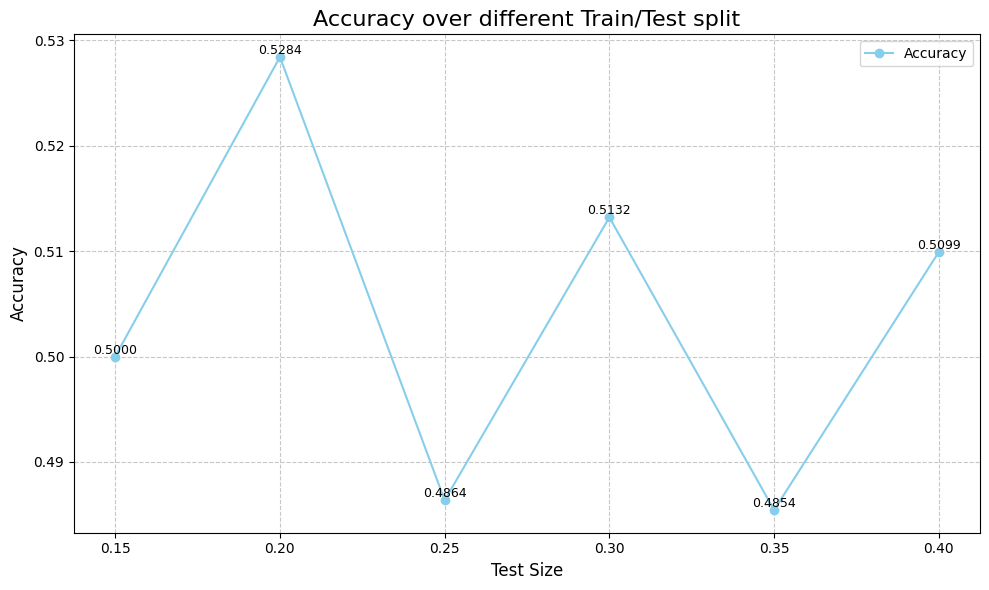


--- Summary of Accuracies across different test_sizes ---
Test Size: 0.15, Accuracy: 0.5000
Test Size: 0.20, Accuracy: 0.5284
Test Size: 0.25, Accuracy: 0.4864
Test Size: 0.30, Accuracy: 0.5132
Test Size: 0.35, Accuracy: 0.4854
Test Size: 0.40, Accuracy: 0.5099

--- Detailed Analysis for the last test_size (0.40) ---


In [36]:


# --- Loop through different test_size values ---
test_sizes = np.arange(0.15, 0.41, 0.05) # From 0.15 to 0.40 with step of 0.05

all_accuracies = {}
all_reports = {}

for test_size in test_sizes:
    print(f"\n--- Running model with test_size = {test_size:.2f} ---")

    # Split the data into training and testing sets
    X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=test_size, random_state=42)

    # Initialize the XGBClassifier with simple parameters
    model = XGBClassifier(eval_metric='mlogloss', random_state=42)

    # Train the model
    model.fit(X_train, y_train_encoded)

    # Make predictions on the test set
    y_pred_encoded = model.predict(X_test)

    # Convert encoded predictions and true values back to original team names for better readability
    y_test_original = target_label_encoder.inverse_transform(y_test_encoded)
    y_pred_original = target_label_encoder.inverse_transform(y_pred_encoded)

    # Evaluate the model
    accuracy = accuracy_score(y_test_original, y_pred_original)
    report = classification_report(y_test_original, y_pred_original, zero_division=0)

    all_accuracies[test_size] = accuracy
    all_reports[test_size] = report

    print(f"\nAccuracy Score for test_size {test_size:.2f}: {accuracy:.4f}")
    print(f"\nClassification Report for test_size {test_size:.2f}:\n", report)

    # Store results for the last iteration to plot detailed analyses later
    if test_size == test_sizes[-1]:
        final_y_test_original = y_test_original
        final_y_pred_original = y_pred_original
        final_X_test = X_test
        final_model = model

test_sizes = list(all_accuracies.keys())
accuracies = list(all_accuracies.values())
# Create the plot
plt.figure(figsize=(10, 6)) # Set the figure size for better readability
plt.plot(test_sizes, accuracies, marker='o', linestyle='-', color='skyblue', label='Accuracy')

# Add titles and labels
plt.title('Accuracy over different Train/Test split', fontsize=16)
plt.xlabel('Test Size', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add labels to data points
for ts, acc in all_accuracies.items():
    plt.text(ts, acc, f'{acc:.4f}', ha='center', va='bottom', fontsize=9)

# Add a legend
plt.legend()

# Set x-axis ticks to match test sizes more precisely if they are few
plt.xticks(test_sizes)

# Display the plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()
print("\n--- Summary of Accuracies across different test_sizes ---")
for ts, acc in all_accuracies.items():
    print(f"Test Size: {ts:.2f}, Accuracy: {acc:.4f}")

print("\n--- Detailed Analysis for the last test_size (0.40) ---")


--- y_test vs y_pred ---
    Actual Winner Predicted Winner  Correct Prediction
0         Chennai          Chennai                   1
1           Delhi            Delhi                   1
2          Punjab          Kolkata                   0
3         Chennai        Hyderabad                   0
4         Chennai          Chennai                   1
..            ...              ...                 ...
348         Delhi            Delhi                   1
349     Hyderabad        Hyderabad                   1
350         Delhi            Delhi                   1
351       Kolkata        Hyderabad                   0
352        Mumbai           Punjab                   0

[353 rows x 3 columns]


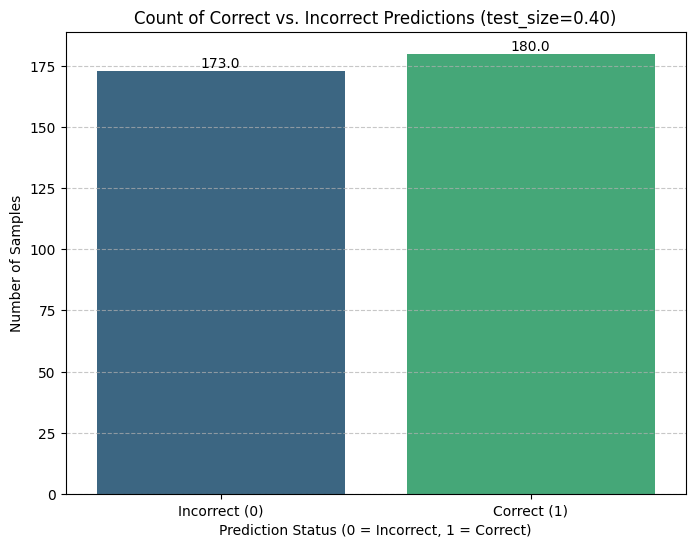

In [37]:
# Print y_test and y_pred (original team names for clarity) from the last iteration
print("\n--- y_test vs y_pred ---")
# Create a DataFrame for easy comparison
comparison_df = pd.DataFrame({
    'Actual Winner': final_y_test_original,
    'Predicted Winner': final_y_pred_original
})
# Add a column indicating if the prediction was correct
comparison_df['Correct Prediction'] = (comparison_df['Actual Winner'] == comparison_df['Predicted Winner']).astype(int)
print(comparison_df)

# Plotting the histogram of correct vs. incorrect predictions
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Correct Prediction', data=comparison_df, palette='viridis')
plt.title(f'Count of Correct vs. Incorrect Predictions (test_size={test_sizes[-1]:.2f})')
plt.xlabel('Prediction Status (0 = Incorrect, 1 = Correct)')
plt.ylabel('Number of Samples')
plt.xticks(ticks=[0, 1], labels=['Incorrect (0)', 'Correct (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


--- Prediction Error Analysis ---

Confusion Matrix:


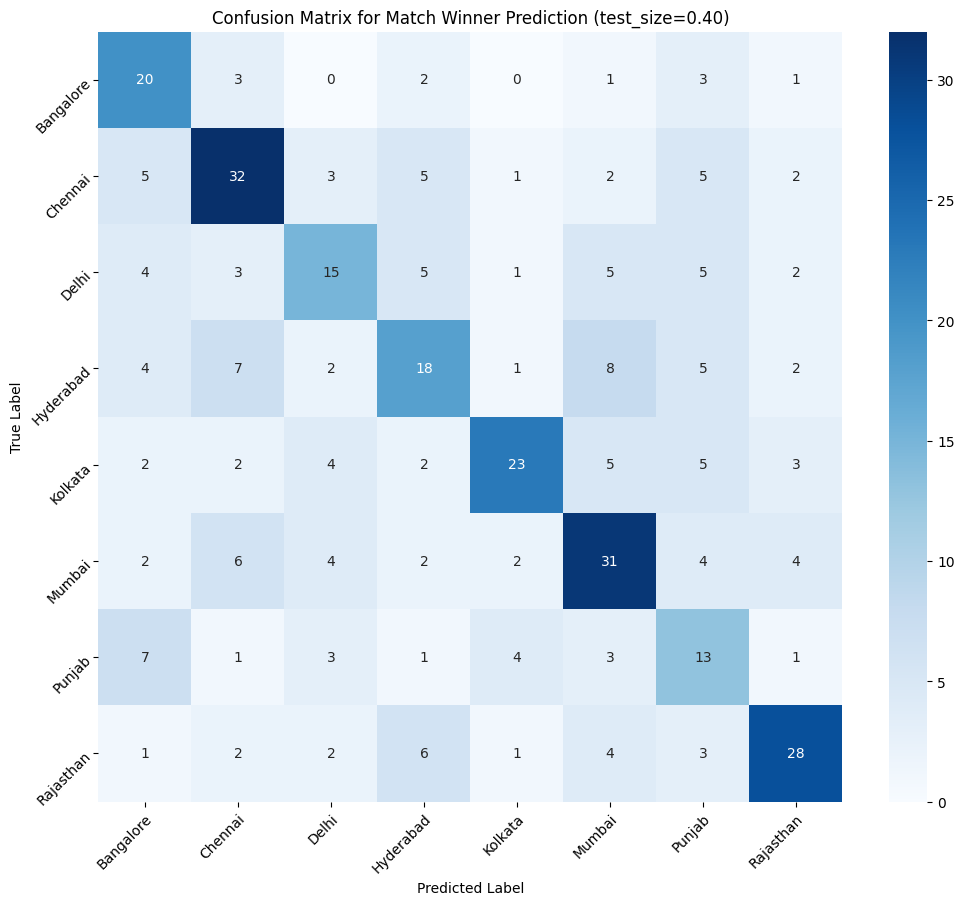

In [38]:
# Extensive Prediction Error Analysis
print("\n--- Prediction Error Analysis ---")

# Confusion Matrix
conf_matrix = confusion_matrix(final_y_test_original, final_y_pred_original)
# Get class labels in the order they appear in the confusion matrix
class_labels = target_label_encoder.classes_
print("\nConfusion Matrix:")
# Plotting the confusion matrix for better interpretability
plt.figure(figsize=(12, 10))
ax_conf_matrix = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for Match Winner Prediction (test_size={test_sizes[-1]:.2f})')

# Rotate x and y axis labels
plt.setp(ax_conf_matrix.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax_conf_matrix.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.show()


--- Feature Importance ---

Feature Importances (Top 15):
team2              0.226644
team1              0.213945
toss_winner        0.170717
venue              0.087032
inning1_balls      0.052026
inning1_runs       0.045769
toss_decision      0.041157
season             0.039418
city               0.032661
umpire1            0.032149
umpire2            0.029785
inning1_wickets    0.028698
dtype: float32


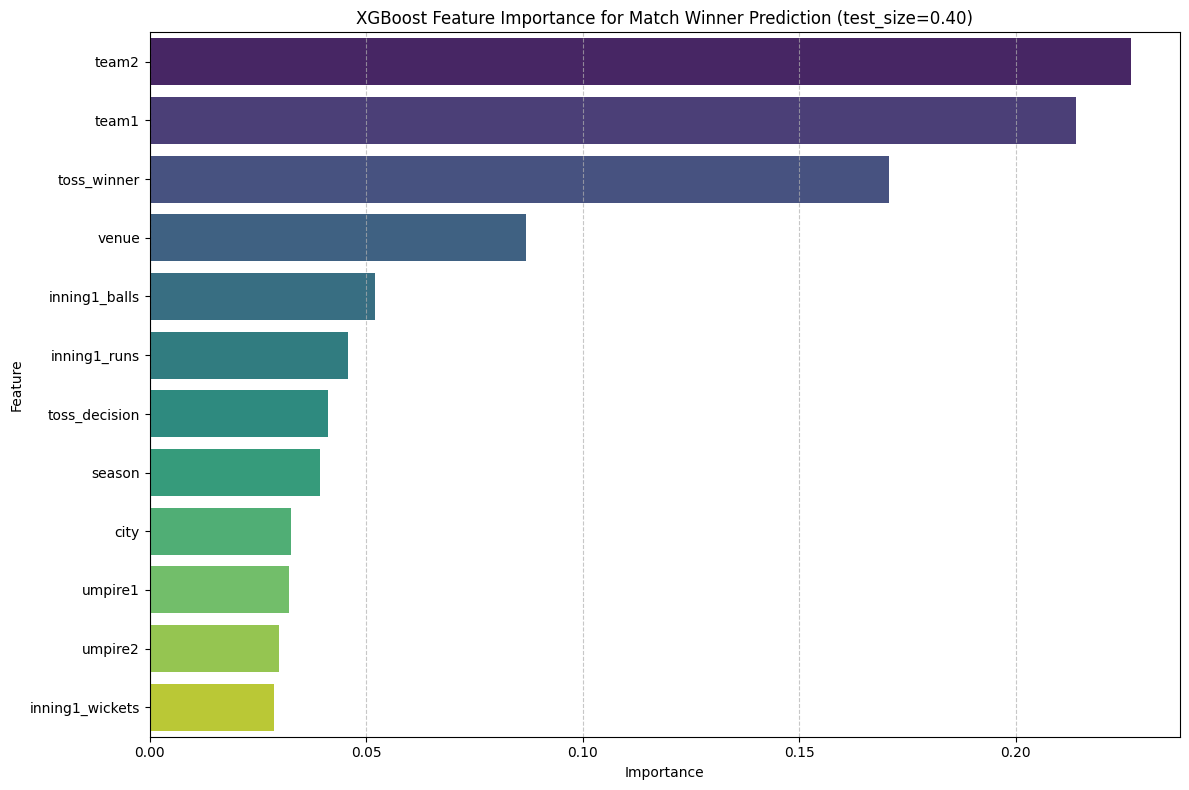

In [39]:
# Feature Importance
print("\n--- Feature Importance ---")
# Get feature importances from the trained model
feature_importances = final_model.feature_importances_

# Create a Series with feature names and their importances
features_df = pd.Series(feature_importances, index=X.columns) # Use X.columns from the full dataset

# Sort the features by importance in descending order
features_df = features_df.sort_values(ascending=False)

print("\nFeature Importances (Top 15):")
print(features_df.head(15))

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=features_df.values, y=features_df.index, palette='viridis')
plt.title(f'XGBoost Feature Importance for Match Winner Prediction (test_size={test_sizes[-1]:.2f})')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [40]:
# Identify misclassified examples (up to 10 for demonstration)
misclassified_indices = np.where(final_y_test_original != final_y_pred_original)[0]
print(f"\nTotal misclassified samples: {len(misclassified_indices)}")

if len(misclassified_indices) > 0:
    print("\nSome Misclassified Examples (Actual vs. Predicted):")
    # Take a sample of misclassified indices if there are too many
    sample_misclassified_indices = misclassified_indices[:min(len(misclassified_indices), 10)]

    for i in sample_misclassified_indices:
        actual_winner = final_y_test_original[i]
        predicted_winner = final_y_pred_original[i]
        # You might want to print some features of the misclassified sample here
        # E.g., final_X_test.iloc[i]
        print(f"Sample {i+1}: Actual='{actual_winner}', Predicted='{predicted_winner}'")
else:
    print("\nNo misclassified samples found in the test set. (This is rare with real data)")

print("\n--- End of Error Analysis ---")



Total misclassified samples: 173

Some Misclassified Examples (Actual vs. Predicted):
Sample 3: Actual='Punjab', Predicted='Kolkata'
Sample 4: Actual='Chennai', Predicted='Hyderabad'
Sample 9: Actual='Punjab', Predicted='Chennai'
Sample 11: Actual='Mumbai', Predicted='Delhi'
Sample 12: Actual='Delhi', Predicted='Punjab'
Sample 15: Actual='Delhi', Predicted='Rajasthan'
Sample 17: Actual='Mumbai', Predicted='Bangalore'
Sample 18: Actual='Chennai', Predicted='Rajasthan'
Sample 23: Actual='Rajasthan', Predicted='Chennai'
Sample 25: Actual='Delhi', Predicted='Bangalore'

--- End of Error Analysis ---


#### Hypertuning the best prediction test/train split XGBClassifier model

In [41]:
## Removing 4 teams with only 1/2 seasons data teams aggregated match by match dataset
df = pd.read_csv('aggregated_match_data_by_innings_wo_small_dataset.csv')

print(" Aggregated Dataset Info w/o small teams:")
df.info()

print("\nFirst 5 rows of new aggregated dataset:")
print(df.head())
print("-" * 30)
# Define the target column
target = 'winner'
# Removed 'inning2_runs', 'inning2_wickets', 'inning2_balls', and 'player_of_match'
# Added 'team1' and 'team2'
features = ['inning1_runs', 'inning1_wickets', 'inning1_balls', 'season', 'city',
       'venue', 'toss_winner', 'toss_decision', 'umpire1', 'umpire2', 'team1',
       'team2']

# Ensure only selected features and target are in the DataFrame, and drop NaNs
df_selected = df[features + [target]].dropna().copy() # .copy() to avoid SettingWithCopyWarning



 Aggregated Dataset Info w/o small teams:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       880 non-null    int64 
 1   id               880 non-null    int64 
 2   inning1_runs     880 non-null    int64 
 3   inning1_wickets  880 non-null    int64 
 4   inning1_balls    880 non-null    int64 
 5   inning2_runs     880 non-null    int64 
 6   inning2_wickets  880 non-null    int64 
 7   inning2_balls    880 non-null    int64 
 8   season           880 non-null    int64 
 9   city             880 non-null    object
 10  venue            880 non-null    object
 11  toss_winner      880 non-null    object
 12  toss_decision    880 non-null    object
 13  team1            880 non-null    object
 14  team2            880 non-null    object
 15  winner           880 non-null    object
 16  result           880 non-null    objec

In [42]:
# --- Updated Features based on provided column list and removing data leakage ---
print("\nDataFrame Info after column selection and dropping NaNs:")
df_selected.info()
print("\nFirst 5 rows after selection and dropping NaNs (using new features):")
print(df_selected.head())
print("-" * 30)


DataFrame Info after column selection and dropping NaNs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   inning1_runs     880 non-null    int64 
 1   inning1_wickets  880 non-null    int64 
 2   inning1_balls    880 non-null    int64 
 3   season           880 non-null    int64 
 4   city             880 non-null    object
 5   venue            880 non-null    object
 6   toss_winner      880 non-null    object
 7   toss_decision    880 non-null    object
 8   umpire1          880 non-null    object
 9   umpire2          880 non-null    object
 10  team1            880 non-null    object
 11  team2            880 non-null    object
 12  winner           880 non-null    object
dtypes: int64(4), object(9)
memory usage: 89.5+ KB

First 5 rows after selection and dropping NaNs (using new features):
   inning1_runs  inning1_wickets  inning1

In [43]:
# Separate features (X) and target (y)
X = df_selected[features]
y = df_selected[target]

print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print("-" * 30)
# Initialize LabelEncoder for the target column first, to get classes for inverse transformation later
target_label_encoder = LabelEncoder()
y_encoded = target_label_encoder.fit_transform(y)

# Store encoders for each column
feature_encoders = {}
# Encode categorical features in X
for column in X.select_dtypes(include=['object']).columns:
      le = LabelEncoder()
      X[column] = le.fit_transform(X[column])
      feature_encoders[column] = le # Store the encoder for potential inverse transform if needed
      print(f"Encoded categorical feature: '{column}'")

print("\nX (features) after encoding categorical columns (first 5 rows):")
print(X.head())
print("\ny (target) after encoding 'winner' column (first 5 values):")
print(pd.Series(y_encoded).head())
print("-" * 30)



Shape of features (X): (880, 12)
Shape of target (y): (880,)
------------------------------
Encoded categorical feature: 'city'
Encoded categorical feature: 'venue'
Encoded categorical feature: 'toss_winner'
Encoded categorical feature: 'toss_decision'
Encoded categorical feature: 'umpire1'
Encoded categorical feature: 'umpire2'
Encoded categorical feature: 'team1'
Encoded categorical feature: 'team2'

X (features) after encoding categorical columns (first 5 rows):
   inning1_runs  inning1_wickets  inning1_balls  season  city  venue  \
0           222                3            124    2008     2     15   
1           240                5            124    2008     7     24   
2           129                8            122    2008    10     10   
3           165                7            123    2008    23     35   
4           110               10            118    2008    21      9   

   toss_winner  toss_decision  umpire1  umpire2  team1  team2  
0            0              1   


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [44]:

# --- Set a fixed test_size based on best resulting model ---
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Split the data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [45]:
print("\n--- Starting Hyperparameter Tuning with GridSearchCV ---")
# Initialize the XGBClassifier
xgb = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)
# Initialize GridSearchCV
# cv=3 means 3-fold cross-validation.
# n_jobs=-1 uses all available CPU cores to speed up the process.
# verbose=2 prints progress messages.
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
print(X_train.columns)
# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train_encoded)

# Get the best parameters and the best score
print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")
print("-" * 30)
# --- END OF HYPERPARAMETER TUNING SECTION ---


# --- Train the final model with the best parameters ---
print("\n--- Training Final Model with Best Parameters ---")
# Initialize the XGBClassifier with the best parameters found by GridSearchCV
best_model = grid_search.best_estimator_

# The best_estimator_ is already fitted on the full training data,
# so you don't necessarily need to call .fit() again.
# You can directly use it for prediction.

# Make predictions on the test set
y_pred_encoded = best_model.predict(X_test)

# Convert encoded predictions and true values back to original team names
y_test_original = target_label_encoder.inverse_transform(y_test_encoded)
y_pred_original = target_label_encoder.inverse_transform(y_pred_encoded)


--- Starting Hyperparameter Tuning with GridSearchCV ---
Index(['inning1_runs', 'inning1_wickets', 'inning1_balls', 'season', 'city',
       'venue', 'toss_winner', 'toss_decision', 'umpire1', 'umpire2', 'team1',
       'team2'],
      dtype='object')
Fitting 3 folds for each of 243 candidates, totalling 729 fits


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.



Best parameters found: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}
Best cross-validation accuracy: 0.5909
------------------------------

--- Training Final Model with Best Parameters ---



Accuracy Score for test_size 0.40: 0.4602

Classification Report for test_size 0.40:
               precision    recall  f1-score   support

   Bangalore       0.59      0.56      0.57        18
     Chennai       0.56      0.69      0.62        26
       Delhi       0.33      0.31      0.32        16
   Hyderabad       0.35      0.35      0.35        20
     Kolkata       0.62      0.50      0.55        26
      Mumbai       0.48      0.52      0.50        27
      Punjab       0.14      0.18      0.15        17
   Rajasthan       0.55      0.42      0.48        26

    accuracy                           0.46       176
   macro avg       0.45      0.44      0.44       176
weighted avg       0.47      0.46      0.46       176


--- Detailed Analysis for test_size = 0.20 ---

--- y_test vs y_pred ---
    Actual Winner Predicted Winner  Correct Prediction
0         Chennai          Chennai                   1
1           Delhi            Delhi                   1
2          Punjab      

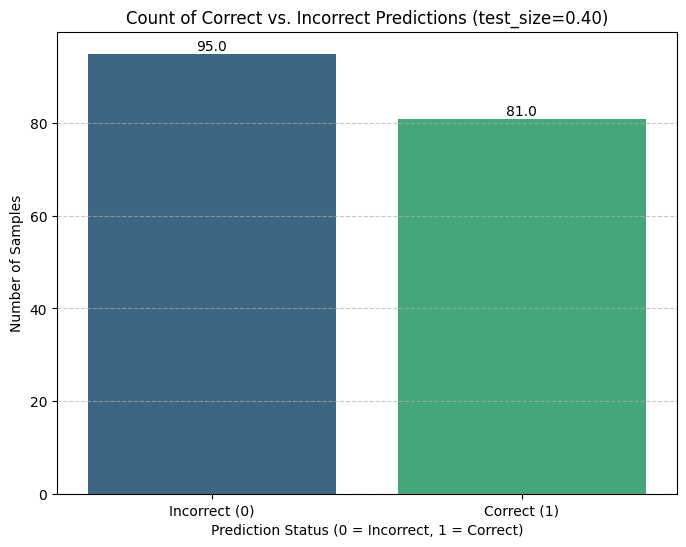

In [46]:
# Evaluate the model
accuracy = accuracy_score(y_test_original, y_pred_original)
report = classification_report(y_test_original, y_pred_original, zero_division=0)

print(f"\nAccuracy Score for test_size {test_size:.2f}: {accuracy:.4f}")
print(f"\nClassification Report for test_size {test_size:.2f}:\n", report)


print("\n--- Detailed Analysis for test_size = 0.20 ---")
# Print y_test and y_pred (original team names for clarity)
print("\n--- y_test vs y_pred ---")
# Create a DataFrame for easy comparison
comparison_df = pd.DataFrame({
    'Actual Winner': y_test_original,
    'Predicted Winner': y_pred_original
})
# Add a column indicating if the prediction was correct
comparison_df['Correct Prediction'] = (comparison_df['Actual Winner'] == comparison_df['Predicted Winner']).astype(int)
print(comparison_df)

# Plotting the histogram of correct vs. incorrect predictions
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Correct Prediction', data=comparison_df, palette='viridis')
plt.title(f'Count of Correct vs. Incorrect Predictions (test_size={test_size:.2f})')
plt.xlabel('Prediction Status (0 = Incorrect, 1 = Correct)')
plt.ylabel('Number of Samples')
plt.xticks(ticks=[0, 1], labels=['Incorrect (0)', 'Correct (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


--- Prediction Error Analysis ---

Confusion Matrix:


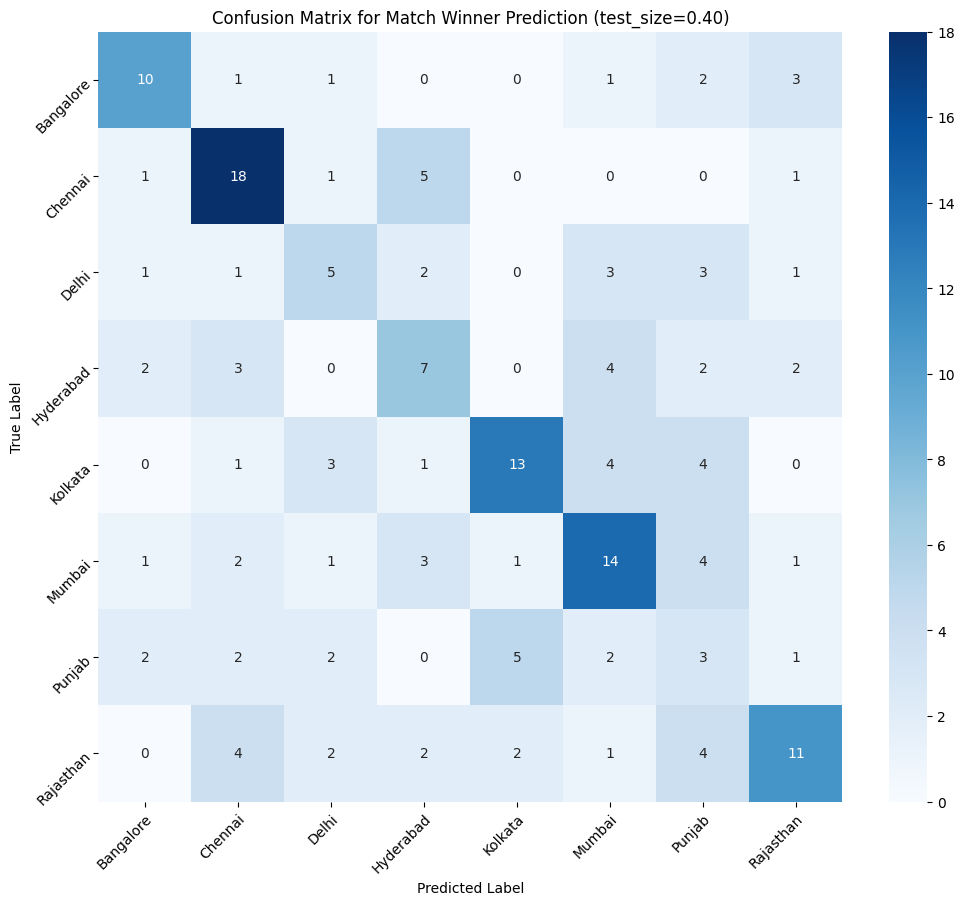

In [47]:

# Extensive Prediction Error Analysis
print("\n--- Prediction Error Analysis ---")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_original, labels=target_label_encoder.classes_)
# Get class labels in the order they appear in the confusion matrix
class_labels = target_label_encoder.classes_
print("\nConfusion Matrix:")
# Plotting the confusion matrix for better interpretability
plt.figure(figsize=(12, 10))
ax_conf_matrix = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                             xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for Match Winner Prediction (test_size={test_size:.2f})')

# Rotate x and y axis labels
plt.setp(ax_conf_matrix.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax_conf_matrix.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.show()


--- Feature Importance ---

Feature Importances (Top 15):
team1              0.203719
toss_winner        0.201362
team2              0.196822
venue              0.095320
inning1_runs       0.044369
city               0.044321
toss_decision      0.043922
umpire2            0.036179
season             0.035300
inning1_balls      0.034879
inning1_wickets    0.033107
umpire1            0.030699
dtype: float32


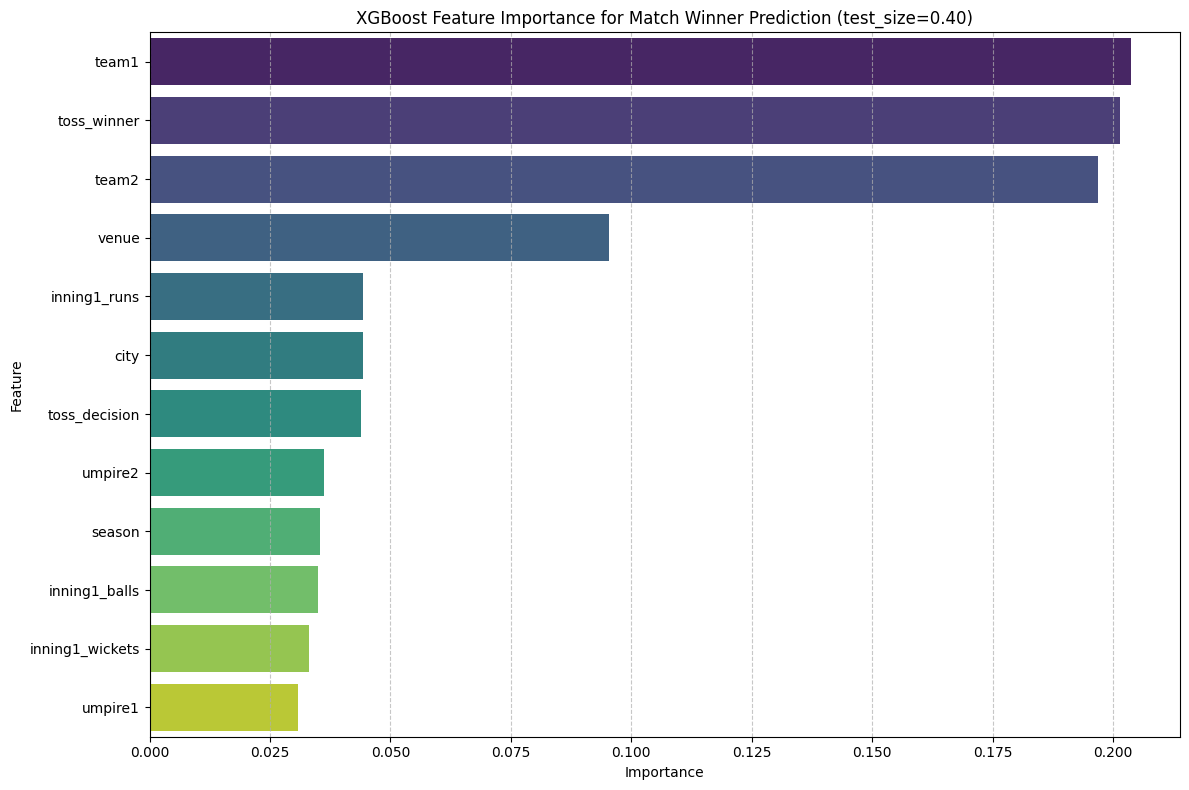

In [48]:

# Feature Importance
print("\n--- Feature Importance ---")
# Get feature importances from the trained model
feature_importances = best_model.feature_importances_

# Create a Series with feature names and their importances
features_df = pd.Series(feature_importances, index=X.columns) # Use X.columns from the full dataset

# Sort the features by importance in descending order
features_df = features_df.sort_values(ascending=False)

print("\nFeature Importances (Top 15):")
print(features_df.head(15))

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=features_df.values, y=features_df.index, palette='viridis')
plt.title(f'XGBoost Feature Importance for Match Winner Prediction (test_size={test_size:.2f})')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [49]:

# Identify misclassified examples (up to 10 for demonstration)
misclassified_indices = np.where(y_test_original != y_pred_original)[0]
print(f"\nTotal misclassified samples: {len(misclassified_indices)}")

if len(misclassified_indices) > 0:
    print("\nSome Misclassified Examples (Actual vs. Predicted):")
    # Take a sample of misclassified indices if there are too many
    sample_misclassified_indices = misclassified_indices[:min(len(misclassified_indices), 10)]

    for i in sample_misclassified_indices:
        actual_winner = y_test_original[i]
        predicted_winner = y_pred_original[i]
        # You might want to print some features of the misclassified sample here
        # E.g., X_test.iloc[i]
        print(f"Sample {i+1}: Actual='{actual_winner}', Predicted='{predicted_winner}'")
else:
    print("\nNo misclassified samples found in the test set. (This is rare with real data)")

print("\n--- End of Error Analysis ---")


Total misclassified samples: 95

Some Misclassified Examples (Actual vs. Predicted):
Sample 3: Actual='Punjab', Predicted='Kolkata'
Sample 4: Actual='Chennai', Predicted='Hyderabad'
Sample 9: Actual='Punjab', Predicted='Chennai'
Sample 11: Actual='Mumbai', Predicted='Delhi'
Sample 12: Actual='Delhi', Predicted='Punjab'
Sample 14: Actual='Punjab', Predicted='Mumbai'
Sample 15: Actual='Delhi', Predicted='Rajasthan'
Sample 16: Actual='Rajasthan', Predicted='Chennai'
Sample 17: Actual='Mumbai', Predicted='Bangalore'
Sample 23: Actual='Rajasthan', Predicted='Chennai'

--- End of Error Analysis ---


#### SHAP value analysis of the best model

Displaying Global Feature Importance...


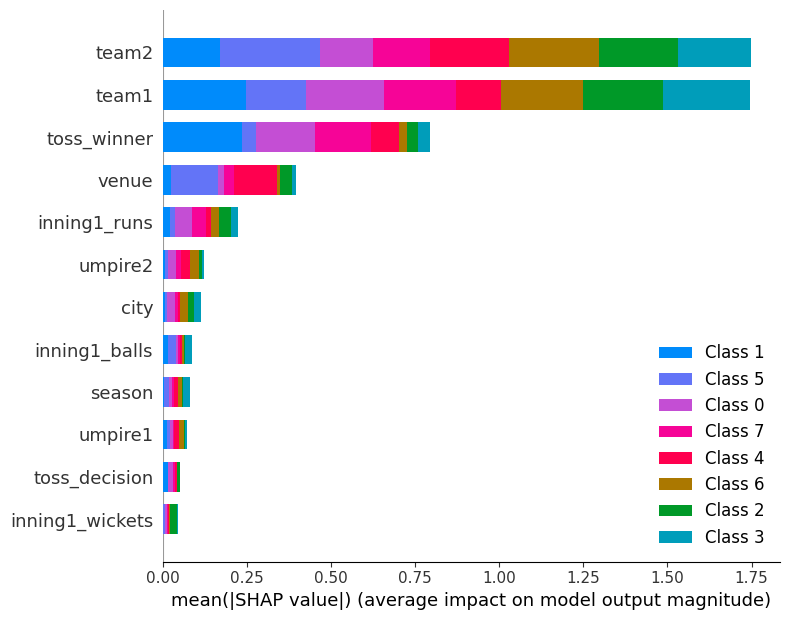


Displaying Detailed Summary Plot (Bee Swarm)...


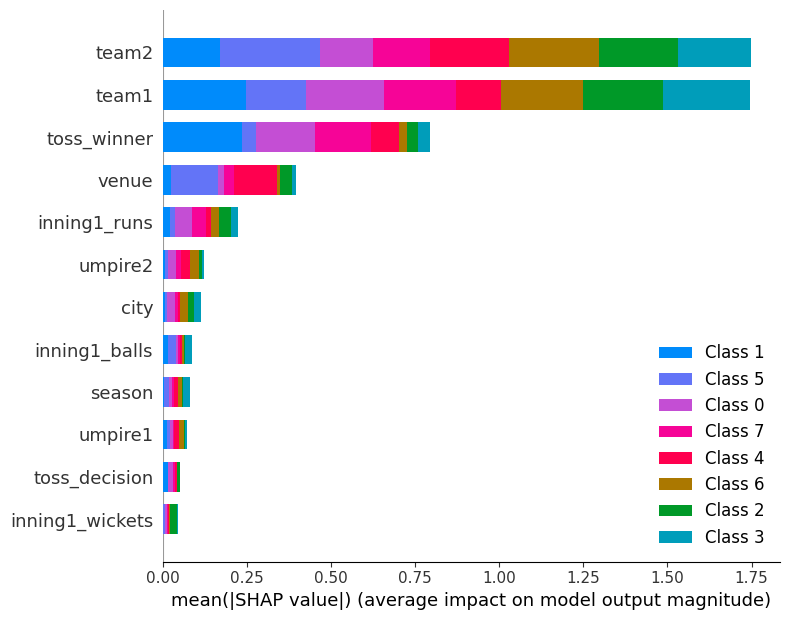


Displaying Force Plot for a single prediction...


In [50]:
# Create a SHAP Explainer
# For tree-based models like XGBoost, TreeExplainer is highly optimized and fast
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values for your data (or a subset)
# This can be computationally intensive, so you might start with X_test
shap_values = explainer.shap_values(X)

# --- 4. Generate Insightful Plots ---

# a) Global Feature Importance (Bar Chart)
print("Displaying Global Feature Importance...")
shap.summary_plot(shap_values, X, plot_type="bar")

# b) Detailed Summary Plot (Bee Swarm Plot)
# This is the most popular SHAP plot. It shows not just importance,
# but the impact of each feature's value on the prediction.
print("\nDisplaying Detailed Summary Plot (Bee Swarm)...")
shap.summary_plot(shap_values, X)

# c) Individual Prediction Explanation (Force Plot)
# Explain the prediction for the very first match in your dataset.
print("\nDisplaying Force Plot for a single prediction...")
shap.initjs() # required for force plots in notebooks

#### SHAP Plot Analysis: Why the Plot Looks This Way

The SHAP plot clearly shows that `team1` and `team2` are the most important features. This makes sense because if the model is predicting which of 8 teams will win, just knowing the two teams involved already narrows the options. This creates a form of target leakage.

Instead of learning from match conditions or performance, the model is mostly identifying which teams are playing. As a result, features like `inning1_runs`, `venue`, and `toss_decision` appear much less important.

#### Fixing the Problem

Change the prediction task to a binary classification: **"Did team1 win?"** (Yes = 1, No = 0). This removes the advantage of simply knowing the two teams and forces the model to learn from more meaningful features.

To do this, update the target variable and adjust your pipeline accordingly.


### if team1 wins, winner row == 1


In [51]:
# --- 1. Feature and Target Preparation (Binary Approach) ---

# Separate features (X). Create a copy to avoid SettingWithCopyWarning.
X = df_selected[features].copy()
print(f"Shape of features (X): {X.shape}")

# <<< CHANGE: Create a true binary target variable >>>
# 1 if team1 is the winner, 0 otherwise (meaning team2 won).
# No LabelEncoder is needed for the target anymore.
y = (df_selected['winner'] == df_selected['team1']).astype(int)

print(f"Shape of target (y): {y.shape}")
print("-" * 30)

# Store encoders for feature columns
feature_encoders = {}
# Encode categorical features in X
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    feature_encoders[column] = le
    print(f"Encoded categorical feature: '{column}'")

print("\nX (features) after encoding (first 5 rows):")
print(X.head())
print("\ny (target) as binary (1=team1 won, 0=team2 won):")
print(y.head())
print("-" * 30)




Shape of features (X): (880, 12)
Shape of target (y): (880,)
------------------------------
Encoded categorical feature: 'city'
Encoded categorical feature: 'venue'
Encoded categorical feature: 'toss_winner'
Encoded categorical feature: 'toss_decision'
Encoded categorical feature: 'umpire1'
Encoded categorical feature: 'umpire2'
Encoded categorical feature: 'team1'
Encoded categorical feature: 'team2'

X (features) after encoding (first 5 rows):
   inning1_runs  inning1_wickets  inning1_balls  season  city  venue  \
0           222                3            124    2008     2     15   
1           240                5            124    2008     7     24   
2           129                8            122    2008    10     10   
3           165                7            123    2008    23     35   
4           110               10            118    2008    21      9   

   toss_winner  toss_decision  umpire1  umpire2  team1  team2  
0            0              1        9       41      

In [52]:
# --- 2. Hyperparameter Tuning with GridSearchCV ---

# param_grid remains the same
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Split the data using the new binary target 'y'
# Renamed variables for clarity (e.g., y_train instead of y_train_encoded)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n--- Starting Hyperparameter Tuning with GridSearchCV ---")
# Initialize the XGBClassifier
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the training data with the binary target
grid_search.fit(X_train, y_train)

print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")
print("-" * 30)





--- Starting Hyperparameter Tuning with GridSearchCV ---
Fitting 3 folds for each of 243 candidates, totalling 729 fits


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.



Best parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
Best cross-validation accuracy: 0.5668
------------------------------


In [53]:
# --- 3. Train and Evaluate the Final Model ---

print("\n--- Evaluating Final Model with Best Parameters ---")
# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# <<< CHANGE: Evaluate directly on binary 0s and 1s >>>
# No need to inverse_transform. 'y_test' and 'y_pred' are already the correct format.
accuracy = accuracy_score(y_test, y_pred)

# <<< CHANGE: Add target_names for a clearer report >>>
report = classification_report(y_test, y_pred, target_names=['team2 Wins (0)', 'team1 Wins (1)'])

print(f"\nAccuracy Score for test_size=0.20: {accuracy:.4f}")
print(f"\nClassification Report for test_size=0.20:\n", report)





--- Evaluating Final Model with Best Parameters ---

Accuracy Score for test_size=0.20: 0.6080

Classification Report for test_size=0.20:
                 precision    recall  f1-score   support

team2 Wins (0)       0.60      0.56      0.58        85
team1 Wins (1)       0.61      0.65      0.63        91

      accuracy                           0.61       176
     macro avg       0.61      0.61      0.61       176
  weighted avg       0.61      0.61      0.61       176




--- Detailed Analysis of Predictions ---
     Actual Outcome  Predicted Outcome  Correct Prediction
680               0                  0                   1
411               0                  1                   0
721               0                  0                   1
844               0                  0                   1
558               0                  1                   0
..              ...                ...                 ...
430               1                  1                   1
796               0                  0                   1
191               0                  0                   1
89                1                  0                   0
344               0                  0                   1

[176 rows x 3 columns]


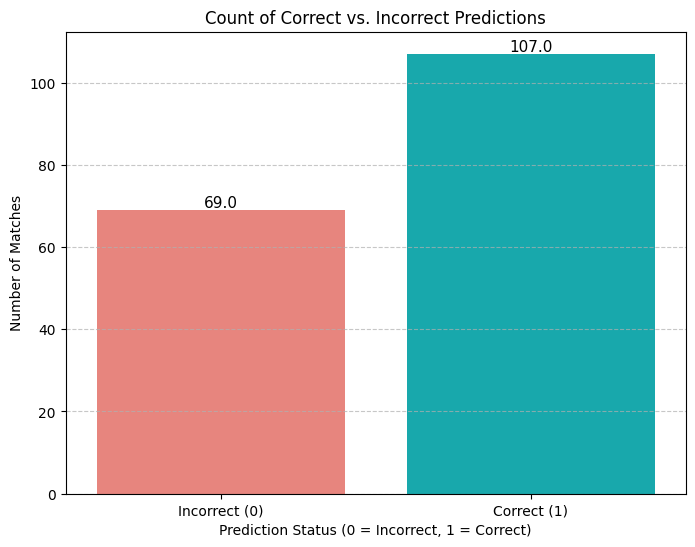

In [54]:
# --- 4. Detailed Analysis and Visualization ---

print("\n--- Detailed Analysis of Predictions ---")
# <<< CHANGE: DataFrame uses binary outcomes with clearer column names >>>
comparison_df = pd.DataFrame({
    'Actual Outcome': y_test,
    'Predicted Outcome': y_pred
})
comparison_df['Correct Prediction'] = (comparison_df['Actual Outcome'] == comparison_df['Predicted Outcome']).astype(int)
print(comparison_df)

# Plotting the histogram of correct vs. incorrect predictions
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Correct Prediction', data=comparison_df, palette=['#F8766D', '#00BFC4'])
plt.title('Count of Correct vs. Incorrect Predictions')
plt.xlabel('Prediction Status (0 = Incorrect, 1 = Correct)')
plt.ylabel('Number of Matches')
plt.xticks(ticks=[0, 1], labels=['Incorrect (0)', 'Correct (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

#### FINAL ML MODEL with best parameters derived from GridSearchCV


In [55]:

# --- 1. Feature and Target Preparation (Binary Approach) ---

# <<< UPDATED: Using your specified list of final features >>>
final_features = [
    'inning1_runs', 'inning1_wickets', 'inning1_balls',
    'season', 'venue', 'toss_winner', 'toss_decision',
    'team1', 'team2'
]

# Separate features (X) using the final_features list. Create a copy to avoid SettingWithCopyWarning.
X = df_selected[final_features].copy()
print("Shape of features (X):", X.shape)

# Create a true binary target variable (1 if team1 wins, 0 if team2 wins)
y = (df_selected['winner'] == df_selected['team1']).astype(int)
print("Shape of target (y):", y.shape)
print("-" * 30)

# Encode categorical features in X
feature_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    feature_encoders[column] = le
    print(f"Encoded categorical feature: '{column}'")
print("-" * 30)
# This is crucial for processing new data in the exact same way.
encoders_filename = 'ipl_feature_encoders.joblib'
joblib.dump(feature_encoders, encoders_filename)
print(f"\nFeature encoders saved to '{encoders_filename}'")
print("-" * 30)



Shape of features (X): (880, 9)
Shape of target (y): (880,)
------------------------------
Encoded categorical feature: 'venue'
Encoded categorical feature: 'toss_winner'
Encoded categorical feature: 'toss_decision'
Encoded categorical feature: 'team1'
Encoded categorical feature: 'team2'
------------------------------

Feature encoders saved to 'ipl_feature_encoders.joblib'
------------------------------


In [56]:
# --- 2. Data Splitting ---

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {X_train.shape[0]} matches")
print(f"Test set size: {X_test.shape[0]} matches")
print("-" * 30)




Training set size: 704 matches
Test set size: 176 matches
------------------------------


In [57]:
# --- 3. Train the Final Model with Best Parameters ---

print("\n--- Training Final Model with Best Parameters ---")

# Define the best parameters you found
final_model = XGBClassifier(
    n_estimators=100,         # The number of boosting rounds or trees to build. More trees can be more powerful but risk overfitting and take longer to train.
    max_depth=4,              # The maximum depth of each tree. Controls model complexity; deeper trees capture more specific patterns but can overfit easily. A depth of 4 is moderately constrained.
    learning_rate=0.2,        # Also called 'eta'. It shrinks the contribution of each tree, preventing drastic changes with each step. A lower value requires more trees but can lead to a more robust model.
    colsample_bytree=0.9,     # The fraction of columns (features) to be randomly sampled for each tree. This helps prevent the model from becoming too reliant on any single feature.
    subsample=1.0,            # The fraction of the training data (rows) to be sampled for each tree. A value of 1.0 means all data is used for every tree. A value < 1.0 helps prevent overfitting.
    eval_metric='logloss',    # The evaluation metric for validation data. 'logloss' is standard for binary classification probability models.
    use_label_encoder=False,  # Set to False to disable the deprecated automatic label encoding and avoid warnings. This assumes you have already encoded your target variable numerically.
    random_state=42           # A seed for the random number generator. This ensures that any process involving randomness (like subsampling) is reproducible every time the code is run.
)

# Train the model on the entire training set
final_model.fit(X_train, y_train)
print("Final model trained successfully.")
print("-" * 30)
model_filename = 'ipl_winner_xgb_model.joblib'
joblib.dump(final_model, model_filename)
print(f"Model saved to '{model_filename}'")
print("-" * 30)




--- Training Final Model with Best Parameters ---
Final model trained successfully.
------------------------------
Model saved to 'ipl_winner_xgb_model.joblib'
------------------------------


`use_label_encoder` is deprecated in 1.7.0.


In [58]:
# --- 4. Evaluate the Final Model ---

print("\n--- Evaluating Final Model ---")
# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a detailed classification report
report = classification_report(y_test, y_pred, target_names=['team2 Wins (0)', 'team1 Wins (1)'])

print(f"Final Model Accuracy on Test Set: {accuracy:.4f}")
print("\nFinal Model Classification Report:\n", report)



--- Evaluating Final Model ---
Final Model Accuracy on Test Set: 0.6023

Final Model Classification Report:
                 precision    recall  f1-score   support

team2 Wins (0)       0.59      0.58      0.58        85
team1 Wins (1)       0.61      0.63      0.62        91

      accuracy                           0.60       176
     macro avg       0.60      0.60      0.60       176
  weighted avg       0.60      0.60      0.60       176




--- Detailed Prediction Analysis ---
     Actual_Outcome  Predicted_Outcome  Correct_Prediction
680               0                  0                   1
411               0                  1                   0
721               0                  0                   1
844               0                  0                   1
558               0                  1                   0
571               1                  0                   0
597               0                  0                   1
444               1                  1                   1
654               1                  1                   1
85                1                  1                   1


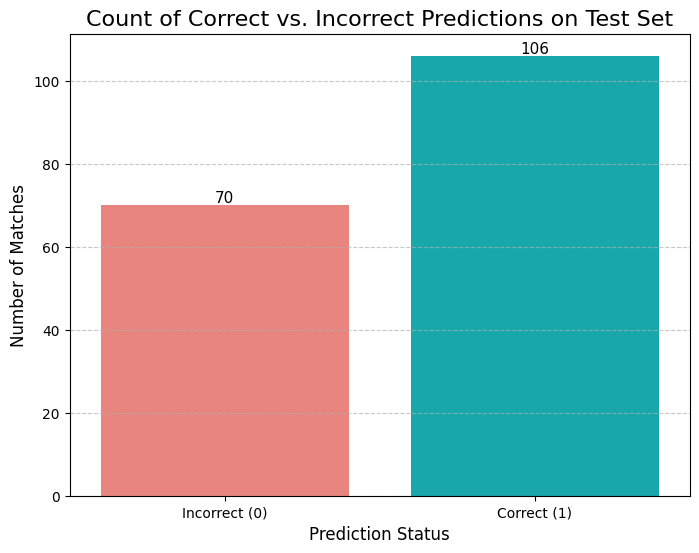

In [59]:
# --- 5. Detailed Analysis and Visualization ---

print("\n--- Detailed Prediction Analysis ---")
# Create a DataFrame for easy comparison of actual vs. predicted outcomes
comparison_df = pd.DataFrame({
    'Actual_Outcome': y_test,
    'Predicted_Outcome': y_pred
})
comparison_df['Correct_Prediction'] = (comparison_df['Actual_Outcome'] == comparison_df['Predicted_Outcome']).astype(int)
print(comparison_df.head(10))

# Plotting the histogram of correct vs. incorrect predictions
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Correct_Prediction', data=comparison_df, palette=['#F8766D', '#00BFC4'])
plt.title('Count of Correct vs. Incorrect Predictions on Test Set', fontsize=16)
plt.xlabel('Prediction Status', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Incorrect (0)', 'Correct (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


Creating SHAP explainer...
Calculating SHAP values...
SHAP value calculation complete.

Displaying Global Feature Importance plot...


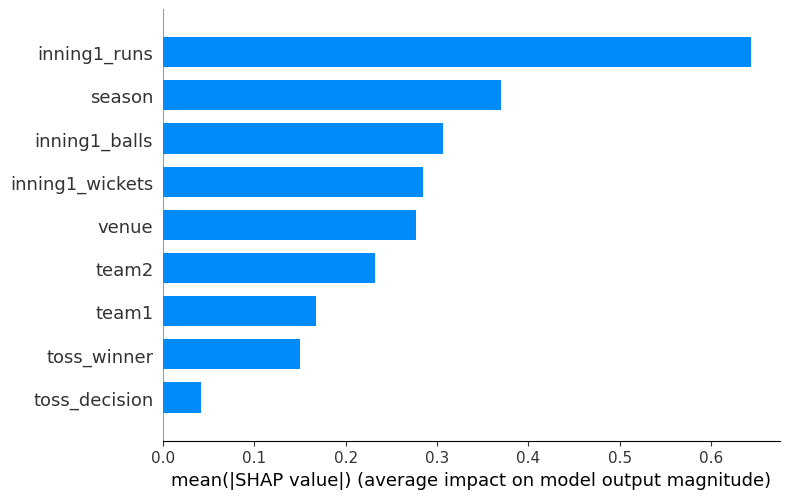


Displaying Detailed Summary Plot (Bee Swarm)...


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


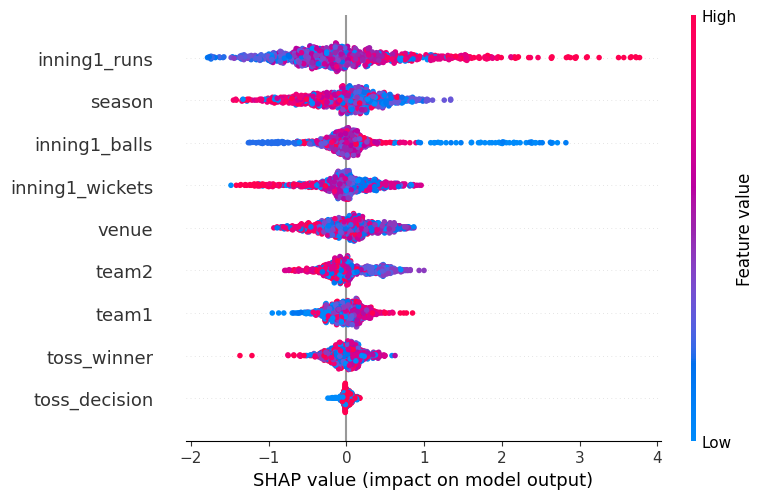


Displaying Force Plot for a single prediction...


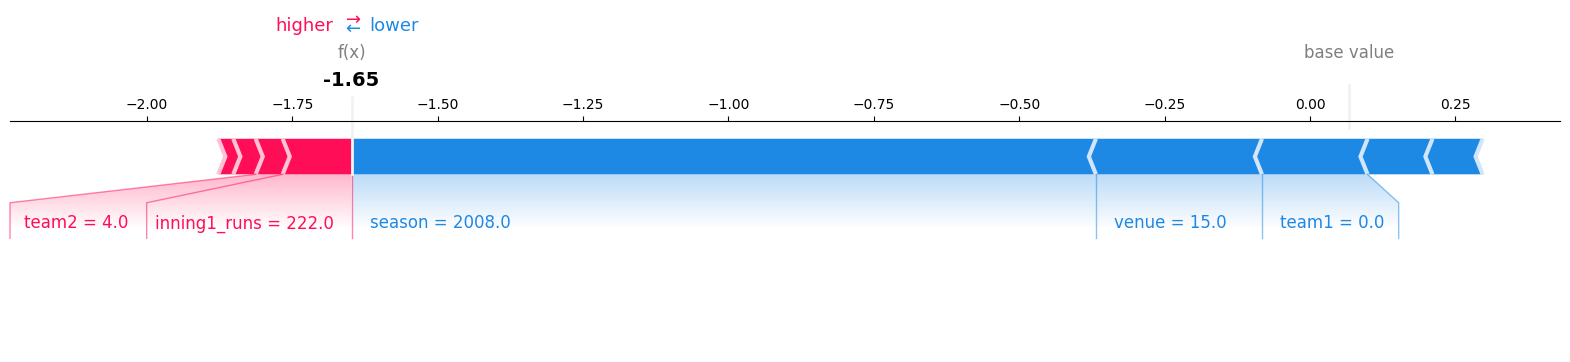

In [60]:
# --- 2. Create a SHAP Explainer ---
# For tree-based models like XGBoost, TreeExplainer is highly optimized and fast
print("\nCreating SHAP explainer...")
explainer = shap.TreeExplainer(final_model)

# --- 3. Calculate SHAP values ---
# This can be computationally intensive, so you might start with X_test
print("Calculating SHAP values...")
shap_values = explainer.shap_values(X)
print("SHAP value calculation complete.")

# --- 4. Generate Insightful Plots ---

# a) Global Feature Importance (Bar Chart)
print("\nDisplaying Global Feature Importance plot...")
shap.summary_plot(shap_values, X, plot_type="bar")

# b) Detailed Summary Plot (Bee Swarm Plot)
print("\nDisplaying Detailed Summary Plot (Bee Swarm)...")
shap.summary_plot(shap_values, X)

# c) Individual Prediction Explanation (Force Plot)
# Explain the prediction for the very first instance in your dataset.
print("\nDisplaying Force Plot for a single prediction...")
shap.force_plot(
    explainer.expected_value,
    shap_values[0, :],
    X.iloc[0, :],
    matplotlib=True
)



--- Generating Confusion Matrix ---


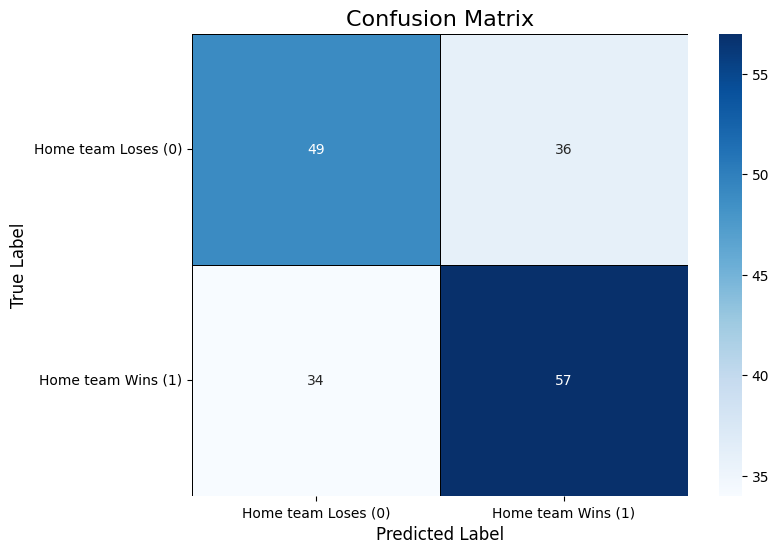


Confusion Matrix Breakdown:
True Negatives (TN - Correctly predicted 'team2 Wins'): 49
False Positives (FP - Incorrectly predicted 'team1 Wins'): 36
False Negatives (FN - Incorrectly predicted 'team2 Wins'): 34
True Positives (TP - Correctly predicted 'team1 Wins'): 57


In [61]:
print("\n--- Generating Confusion Matrix ---")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the class names for the labels
class_names = ['Home team Loses (0)', 'Home team Wins (1)']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            linewidths=.5, linecolor='black')

# Add titles and labels for clarity
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Display the plot
plt.show()

# Optional: Print a breakdown of the confusion matrix values
print("\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN - Correctly predicted 'team2 Wins'): {cm[0][0]}")
print(f"False Positives (FP - Incorrectly predicted 'team1 Wins'): {cm[0][1]}")
print(f"False Negatives (FN - Incorrectly predicted 'team2 Wins'): {cm[1][0]}")
print(f"True Positives (TP - Correctly predicted 'team1 Wins'): {cm[1][1]}")

In [62]:
#  Create a Detailed Results DataFrame for Analysis ---

print("\n--- Appending predictions to test set for detailed analysis ---")

# Start with a copy of the test set features to avoid modifying the original
results_df = X_test.copy()

# 1. Add the actual and predicted outcomes (as 0s and 1s)
results_df['Actual_Outcome'] = y_test
results_df['Predicted_Outcome'] = y_pred

# 2. Add human-readable labels for the outcomes
# Map 1 to 'team1 Wins' and 0 to 'team2 Wins'
results_df['Actual_Label'] = results_df['Actual_Outcome'].map({1: 'team1 Wins', 0: 'team2 Wins'})
results_df['Predicted_Label'] = results_df['Predicted_Outcome'].map({1: 'team1 Wins', 0: 'team2 Wins'})

# 3. Add a column to easily see if the prediction was correct
results_df['Prediction_Status'] = 'Correct'
results_df.loc[results_df['Actual_Outcome'] != results_df['Predicted_Outcome'], 'Prediction_Status'] = 'Incorrect'


# 4. Decode the categorical features back to their original string values
# This uses the 'feature_encoders' dictionary we created during the initial encoding.
print("Decoding features back to original labels...")
for column, encoder in feature_encoders.items():
    # Check if the column exists in the DataFrame before trying to decode
    if column in results_df.columns:
        results_df[column] = encoder.inverse_transform(results_df[column])

# 5. Reorder columns for better readability
# Put the most important outcome-related columns first.
desired_order = [
    'Actual_Label',
    'Predicted_Label',
    'Prediction_Status',
    'team1',
    'team2',
    'inning1_runs',
    'venue',
    'toss_winner',
    'toss_decision'
]
# Get the remaining columns from X_test that are not in the desired_order list
remaining_cols = [col for col in X.columns if col not in desired_order]
# Combine the lists to get the final column order
final_order = desired_order + remaining_cols
# Reorder the DataFrame
results_df = results_df[final_order]


print("\n--- Displaying appended DataFrame with actual and predicted results ---")
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.width', 1000) # Set a wider display
print(results_df.head())


# You can now easily filter for incorrect predictions to analyze errors
print("\n--- Example: Analyzing Incorrect Predictions ---")
incorrect_predictions = results_df[results_df['Prediction_Status'] == 'Incorrect']
print(f"Number of incorrect predictions: {len(incorrect_predictions)}")
print("First 5 incorrect predictions:")
print(incorrect_predictions.head())


--- Appending predictions to test set for detailed analysis ---
Decoding features back to original labels...

--- Displaying appended DataFrame with actual and predicted results ---
    Actual_Label Predicted_Label Prediction_Status      team1      team2  inning1_runs                                    venue toss_winner toss_decision  inning1_wickets  inning1_balls  season
680   team2 Wins      team2 Wins           Correct  Hyderabad    Kolkata           142                     Sheikh Zayed Stadium   Hyderabad           bat                4            123    2021
411   team2 Wins      team1 Wins         Incorrect      Delhi    Kolkata           146                         Feroz Shah Kotla     Kolkata         field                8            126    2015
721   team2 Wins      team2 Wins           Correct    Chennai     Punjab           134      Dubai International Cricket Stadium      Punjab         field                6            127    2021
844   team2 Wins      team2 Wins         

#### XGBoost-Powered Predictive Analysis of the IPL 2025 Season trained on Historic Dataset(2008-2024)

In [65]:
# df_2025 = pd.read_csv('/content/drive/MyDrive/DS_Project_files/matches_2025.csv')
df_2025 = pd.read_csv('PARTH_WS\matches_2025.csv')



In [66]:
df_2025.columns

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner', 'toss_decision', 'first_ings_score', 'first_ings_wkts', 'second_ings_score', 'second_ings_wkts', 'match_result', 'match_winner', 'wb_runs', 'wb_wickets', 'balls_left', 'player_of_the_match', 'top_scorer', 'highscore', 'best_bowling', 'best_bowling_figure'], dtype='object')

In [67]:
venue_mapping = {
    'Eden Gardens, Kolkata': 'Eden Gardens, Kolkata',
    'MA Chidambaram Stadium, Chepauk': 'MA Chidambaram Stadium, Chennai',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'MA Chidambaram Stadium, Chennai',
    'Wankhede Stadium, Mumbai': 'Wankhede Stadium, Mumbai',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'New PCA Cricket Stadium, Mullanpur',
    'Punjab Cricket Association IS Bindra Stadium': 'New PCA Cricket Stadium, Mullanpur',
    'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh': 'New PCA Cricket Stadium, Mullanpur',
    'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium, Hyderabad',
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 'Rajiv Gandhi International Stadium, Hyderabad',
    'Arun Jaitley Stadium, Delhi': 'Arun Jaitley Stadium, Delhi',
    'Dr DY Patil Sports Academy, Mumbai': 'Dr DY Patil Sports Academy, Mumbai',
    'Maharashtra Cricket Association Stadium, Pune': 'Maharashtra Cricket Association Stadium, Pune',
    'M Chinnaswamy Stadium, Bengaluru': 'M. Chinnaswamy Stadium, Bangalore',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam': 'ACA-VDCA Cricket Stadium, Vishakhapatnam',
    'Sawai Mansingh Stadium, Jaipur': 'Sawai Mansingh Stadium, Jaipur',
    'Himachal Pradesh Cricket Association Stadium, Dharamsala': 'HPCA Stadium, Dharamshala',
    'Brabourne Stadium': 'Brabourne Stadium, Mumbai',
    'Sardar Patel Stadium, Motera': 'Narendra Modi Stadium, Ahmedabad',
    'M. Chinnaswamy Stadium': 'M. Chinnaswamy Stadium, Bangalore',
    'Punjab Cricket Association Stadium, Mohali': 'New PCA Cricket Stadium, Mullanpur'
}

for col in (df_2025.columns):
    df_2025[col] = df_2025[col].apply(lambda x: venue_mapping.get(x, x))

In [68]:
print("--- Data Cleaning for Teams in df_2025 ---")

# --- 1. Define the Team Mapping ---
# Create a dictionary to map team abbreviations to their city/state name.
# 'GT' and 'LSG' are intentionally left out as they will be dropped.
team_mapping = {
    'KKR': 'Kolkata',
    'SRH': 'Hyderabad',
    'CSK': 'Chennai',
    'DC': 'Delhi',
    'RR': 'Rajasthan',
    'MI': 'Mumbai',
    'RCB': 'Bangalore',
    'PBKS': 'Punjab',
    'GT': ' ',
    'LSG': ' '
}

for col in (df_2025.columns):
    df_2025[col] = df_2025[col].apply(lambda x: team_mapping.get(x, x))



--- Data Cleaning for Teams in df_2025 ---


In [69]:
print("---Preparing Feature DataFrame---")

# Define Column Mapping 
# Create a dictionary to map the existing names to your desired feature names.
column_mapping = {
    'first_ings_score': 'inning1_runs',
    'first_ings_wkts': 'inning1_wickets',
    'match_winner': 'winner'
    # 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision' already match
}

# Apply the renaming
df_2025 = df_2025.rename(columns=column_mapping)
print("Applied column name mapping.")
df_2025['season'] = 2025

print("\n--- Verification of final 'season' column ---")
print("Unique seasons found:", df_2025['season'].unique())
# IMPORTANT: Note on missing columns from your desired list
print("\n--- Notes on Missing Columns ---")
print("The following desired features are NOT in your source DataFrame and cannot be created from it:")
print("- 'city': This needs to be created manually, often by extracting it from the 'venue' string.")
print("- 'inning1_balls': This data is not present.")
print("- 'umpire1', 'umpire2': This data is not present.")
print("They will be excluded from the final feature set.")
print("-" * 30)

df_2025['season'] = 2025
# Select the Final Set of Features ---

# Define your complete list of desired columns
desired_features = [
    'inning1_runs',
    'inning1_wickets',
    'inning1_balls',
    'season',
    'city',
    'venue',
    'toss_winner',
    'toss_decision',
    'team1',
    'team2',
    'winner'
]

# Filter this list to include only columns that actually exist in our DataFrame now
final_columns_to_keep = [col for col in desired_features if col in df_2025.columns]

print("\nFinal features that will be kept:")
print(final_columns_to_keep)

# Create the final DataFrame with only the selected columns
df_test_2025 = df_2025[final_columns_to_keep].copy()


# --- Verification ---
print("\n--- Final Features DataFrame ---")
print(f"Shape of the final DataFrame: {df_test_2025.shape}")
print("\nFirst 5 rows:")
print(df_test_2025.head())
print("\nDataFrame Info:")
df_test_2025.info()

---Preparing Feature DataFrame---
Applied column name mapping.

--- Verification of final 'season' column ---
Unique seasons found: [2025]

--- Notes on Missing Columns ---
The following desired features are NOT in your source DataFrame and cannot be created from it:
- 'city': This needs to be created manually, often by extracting it from the 'venue' string.
- 'inning1_balls': This data is not present.
- 'umpire1', 'umpire2': This data is not present.
They will be excluded from the final feature set.
------------------------------

Final features that will be kept:
['inning1_runs', 'inning1_wickets', 'season', 'venue', 'toss_winner', 'toss_decision', 'team1', 'team2', 'winner']

--- Final Features DataFrame ---
Shape of the final DataFrame: (74, 9)

First 5 rows:
   inning1_runs  inning1_wickets  season                                          venue toss_winner toss_decision      team1      team2     winner
0         174.0              8.0    2025                          Eden Gardens,

In [70]:
df_test_2025.columns

Index(['inning1_runs', 'inning1_wickets', 'season', 'venue', 'toss_winner', 'toss_decision', 'team1', 'team2', 'winner'], dtype='object')

In [71]:
df_test_2025['inning1_balls'] = 120  # Assuming each innings has 20 overs, hence 120 balls

In [72]:
df_test_2025 = df_test_2025.dropna(subset=["winner"]) # Drop rows where 'winner' is NaN, as we cannot predict without a winner

In [73]:
df_test_2025['winner_text'] = df_test_2025['winner'] 

In [74]:
df_test_2025['winner'] = (df_test_2025['winner'] == df_test_2025['team1']).astype(int)

In [75]:
df_test_2025.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 73
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   inning1_runs     71 non-null     float64
 1   inning1_wickets  71 non-null     float64
 2   season           71 non-null     int64  
 3   venue            71 non-null     object 
 4   toss_winner      71 non-null     object 
 5   toss_decision    71 non-null     object 
 6   team1            71 non-null     object 
 7   team2            71 non-null     object 
 8   winner           71 non-null     int32  
 9   inning1_balls    71 non-null     int64  
 10  winner_text      71 non-null     object 
dtypes: float64(2), int32(1), int64(2), object(6)
memory usage: 6.4+ KB


#### Predicting for 2025 current data which is completely unseen to model

In [76]:
final_features = [
    'inning1_runs', 'inning1_wickets', 'inning1_balls',
    'season', 'city', 'venue', 'toss_winner', 'toss_decision',
    'team1', 'team2'
]

In [77]:
df = pd.read_csv('aggregated_match_data_by_innings_wo_small_dataset.csv')


In [78]:
df['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

In [79]:
toss_decision_mapping = {
    'Bowl': 'field',
    'Bat': 'bat'
}
df_test_2025['toss_decision'] = df_test_2025['toss_decision'].replace(toss_decision_mapping)

In [80]:
df_test_2025['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

In [81]:
df_test_2025.shape

(71, 11)

In [82]:
df_test_2025['city'] = df_test_2025['venue'].str.split(',').str[1].str.strip()

In [83]:
venue_mapping = {
    'Eden Gardens, Kolkata': 'Eden Gardens',
    'Rajiv Gandhi International Stadium, Hyderabad': 'Rajiv Gandhi International Stadium',
    'MA Chidambaram Stadium, Chennai': 'MA Chidambaram Stadium',
    'Narendra Modi Stadium, Ahmedabad': 'Narendra Modi Stadium, Ahmedabad',
    'Barsapara Stadium, Guwahati': 'Barsapara Cricket Stadium, Guwahati',
    'Wankhede Stadium, Mumbai': 'Wankhede Stadium',
    'M. Chinnaswamy Stadium, Bangalore': 'M Chinnaswamy Stadium', # Standardized to the version without a dot
    'Sawai Mansingh Stadium, Jaipur': 'Sawai Mansingh Stadium',
    'Arun Jaitley Stadium, Delhi': 'Arun Jaitley Stadium' # Mapped to the current name, not the old 'Feroz Shah Kotla'
}

for col in (df_test_2025.columns):
    df_test_2025[col] = df_test_2025[col].apply(lambda x: venue_mapping.get(x, x))

In [84]:
df_test_2025 =  df_test_2025[df_test_2025['toss_winner'] != ' ']

In [85]:

df_test_2025 =  df_test_2025[df_test_2025['team1'] != ' ']
df_test_2025 =  df_test_2025[df_test_2025['team2'] != ' ']

In [86]:
# Create a list of cities to drop
cities_to_drop = ['Vishakhapatnam', 'Lucknow','Mullanpur','Dharamshala']

# Keep only the rows where the city is NOT in the list
df_test_2025 = df_test_2025[~df_test_2025['city'].isin(cities_to_drop)]

In [87]:
import joblib

def preprocess_data_for_prediction(df):
    """
    Applies all the necessary preprocessing steps to new, raw data so it
    matches the format the model was trained on.
    """
    print("Preprocessing new data...")

    # a. Rename columns to match training features
    column_mapping = {
        'first_ings_score': 'inning1_runs',
        'first_ings_wkts': 'inning1_wickets',
        'match_winner': 'winner'
        # Add any other remappings you did
    }
    df = df.rename(columns=column_mapping)

    # b. Create 'season' column (setting it to 2025 for this case)
    df['season'] = 2025

    # c. Apply the exact same mappings for venues and teams
    # These dictionaries should be identical to the ones in your training script.
    venue_mapping = {
        'Eden Gardens, Kolkata': 'Eden Gardens, Kolkata',
        'M. Chinnaswamy Stadium': 'M. Chinnaswamy Stadium, Bangalore',
        'Sardar Patel Stadium, Motera': 'Narendra Modi Stadium, Ahmedabad',
        # ... include all other venue mappings ...
    }
    team_mapping = {
        'KKR': 'Kolkata', 'SRH': 'Hyderabad', 'CSK': 'Chennai', 'DC': 'Delhi',
        'RR': 'Rajasthan', 'MI': 'Mumbai', 'RCB': 'Bangalore', 'PBKS': 'Punjab'
    }

    df['venue'] = df['venue'].replace(venue_mapping)
    team_cols = ['team1', 'team2', 'toss_winner']
    for col in team_cols:
        if col in df.columns:
            df[col] = df[col].replace(team_mapping)

    # You might want to add other cleaning steps here if you had more
    # (e.g., handling missing values in inning1_runs)

    print("Preprocessing complete.")
    return df


def make_predictions(input_df, model, encoders, feature_list):
    """
    Takes raw data and returns it with predictions and probabilities.
    """
    # Create a copy to store results without changing the original df
    results_df = input_df.copy()

    # Preprocess the raw data
    processed_df = preprocess_data_for_prediction(input_df)

    # Ensure all required features are present
    # (Handle case where a column might be missing from the new data)
    for feature in feature_list:
        if feature not in processed_df.columns:
            raise ValueError(f"Required feature '{feature}' is missing from the new data.")

    # Select the exact feature set the model was trained on
    X_new = processed_df[feature_list].copy()

    # Encode categorical features using the LOADED encoders
    print("Encoding categorical features...")
    for column, encoder in encoders.items():
        if column in X_new.columns:
            try:
                # Use .transform() ONLY. Never .fit() or .fit_transform() on new data.
                X_new[column] = encoder.transform(X_new[column])
            except ValueError as e:
                print(f"Error transforming column '{column}': {e}")
                print("This means the new data has a category (e.g., a new team or venue) the model has never seen.")
                print("You may need to update your mapping dictionaries or handle this as an unknown category.")
                return None # Stop processing if there's an error

    # Make predictions
    print("Making predictions...")
    predictions = model.predict(X_new)
    probabilities = model.predict_proba(X_new)

    # Add results to the DataFrame
    results_df['predicted_outcome'] = predictions
    results_df['team1_win_probability'] = probabilities[:, 1] # Probability of class '1'

    # Determine the predicted winning team's name
    results_df['predicted_winner'] = results_df.apply(
        lambda row: row['team1'] if row['predicted_outcome'] == 1 else row['team2'],
        axis=1
    )

    return results_df



In [88]:

# --- Main execution block ---
if __name__ == "__main__":
    # Define filenames and the feature list
    MODEL_FILE = 'ipl_winner_xgb_model.joblib'
    ENCODERS_FILE = 'ipl_feature_encoders.joblib'
    NEW_DATA_FILE = df_test_2025

    # This list must be identical to the one used for training
    FINAL_FEATURES = [
        'inning1_runs', 'inning1_wickets', 'inning1_balls',
        'season', 'venue', 'toss_winner', 'toss_decision',
        'team1', 'team2'
    ]

    # Load the trained model and encoders
    try:
        print(f"Loading model from {MODEL_FILE}...")
        loaded_model = joblib.load(MODEL_FILE)
        print(f"Loading encoders from {ENCODERS_FILE}...")
        loaded_encoders = joblib.load(ENCODERS_FILE)
    except FileNotFoundError as e:
        print(f"Error loading files: {e}")
        print("Please ensure the model and encoder files are in the same directory.")
        exit()

    # Load the new data to predict
    try:
        new_matches_df = df_test_2025
    except FileNotFoundError:
        print(f"Error: The new data file '{NEW_DATA_FILE}' was not found.")
        exit()

    # Make predictions
    prediction_results_df = make_predictions(new_matches_df, loaded_model, loaded_encoders, FINAL_FEATURES)

    # Display results
    if prediction_results_df is not None:
        print("\n\n--- PREDICTION RESULTS ---")
        # Define the columns to display for a clean output
        display_columns = ['team1', 'team2', 'venue', 'predicted_winner', 'team1_win_probability']
        print(prediction_results_df[display_columns])

Loading model from ipl_winner_xgb_model.joblib...
Loading encoders from ipl_feature_encoders.joblib...
Preprocessing new data...
Preprocessing complete.
Encoding categorical features...
Making predictions...


--- PREDICTION RESULTS ---
        team1      team2                                venue predicted_winner  team1_win_probability
0     Kolkata  Bangalore                         Eden Gardens        Bangalore               0.232610
1   Hyderabad  Rajasthan   Rajiv Gandhi International Stadium        Hyderabad               0.994879
2     Chennai     Mumbai               MA Chidambaram Stadium           Mumbai               0.222803
5   Rajasthan    Kolkata  Barsapara Cricket Stadium, Guwahati          Kolkata               0.019849
7     Chennai  Bangalore               MA Chidambaram Stadium          Chennai               0.990877
10  Rajasthan    Chennai  Barsapara Cricket Stadium, Guwahati          Chennai               0.168535
11     Mumbai    Kolkata                     Wank

In [89]:
prediction_results_df.to_csv("IPL Season 2025 prediction probability.csv")

In [90]:
prediction_results_df.columns

Index(['inning1_runs', 'inning1_wickets', 'season', 'venue', 'toss_winner', 'toss_decision', 'team1', 'team2', 'winner', 'inning1_balls', 'winner_text', 'city', 'predicted_outcome', 'team1_win_probability', 'predicted_winner'], dtype='object')

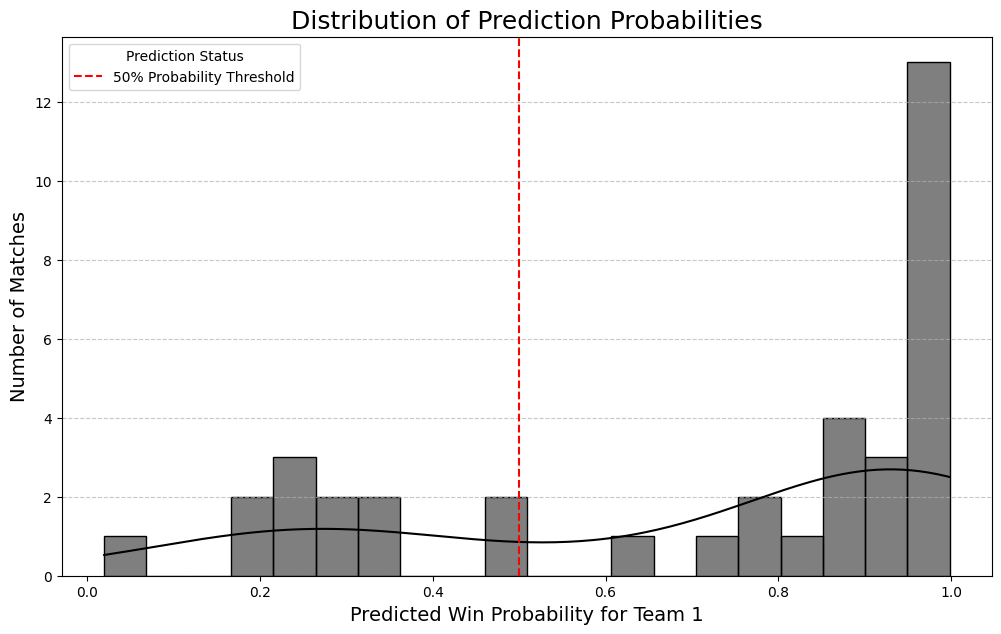

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'prediction_results_df' is the DataFrame with your predictions.
# First, let's create a 'Correct_Prediction' column if you have the true winners.
# If you don't have the true 2025 winners yet, you can run the first part without the 'hue'.

if 'winner' in prediction_results_df.columns:
    # This requires a 'winner' column from the original 2025 data file
    prediction_results_df['Correct_Prediction'] = \
        (prediction_results_df['predicted_winner'] == prediction_results_df['winner'])
else:
    # If true winners aren't known, we can't color by correctness
    prediction_results_df['Correct_Prediction'] = 'Unknown'


# --- Plotting the histogram ---
plt.figure(figsize=(12, 7))
sns.histplot(data=prediction_results_df, x='team1_win_probability', hue='Correct_Prediction',
             kde=True, bins=20, palette={'Correct': '#00BFC4', 'Incorrect': '#F8766D', 'Unknown': 'grey'})

plt.title('Distribution of Prediction Probabilities', fontsize=18)
plt.xlabel('Predicted Win Probability for Team 1', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.axvline(0.5, color='red', linestyle='--', label='50% Probability Threshold')
plt.legend(title='Prediction Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# !pip install jinja2


   -------------------- ------------------- 1/2 [jinja2]
   -------------------- ------------------- 1/2 [jinja2]
   -------------------- ------------------- 1/2 [jinja2]
   -------------------- ------------------- 1/2 [jinja2]
   ---------------------------------------- 2/2 [jinja2]



In [95]:
# Select and rename columns for a clean presentation
summary_table = prediction_results_df[[
    'team1',
    'team2',
    'venue',
    'predicted_winner',
    'team1_win_probability'
]].rename(columns={
    'team1': 'Team 1',
    'team2': 'Team 2',
    'venue': 'Venue',
    'predicted_winner': 'Predicted Winner',
    'team1_win_probability': 'Team 1 Win Probability'
})

# Apply styling
# This will color the probability cell based on its value - higher is greener.
styled_table = summary_table.style.background_gradient(
    cmap='RdYlGn',
    subset=['Team 1 Win Probability'],
    low=0.4, high=0.6 # Center the gradient around 50-60%
).format({
    'Team 1 Win Probability': '{:.2%}'.format # Format as a percentage
})

# Display the styled table (this works best in a Jupyter Notebook)
print("\n\n--- Formatted Prediction Summary Table ---")
display(styled_table)




--- Formatted Prediction Summary Table ---


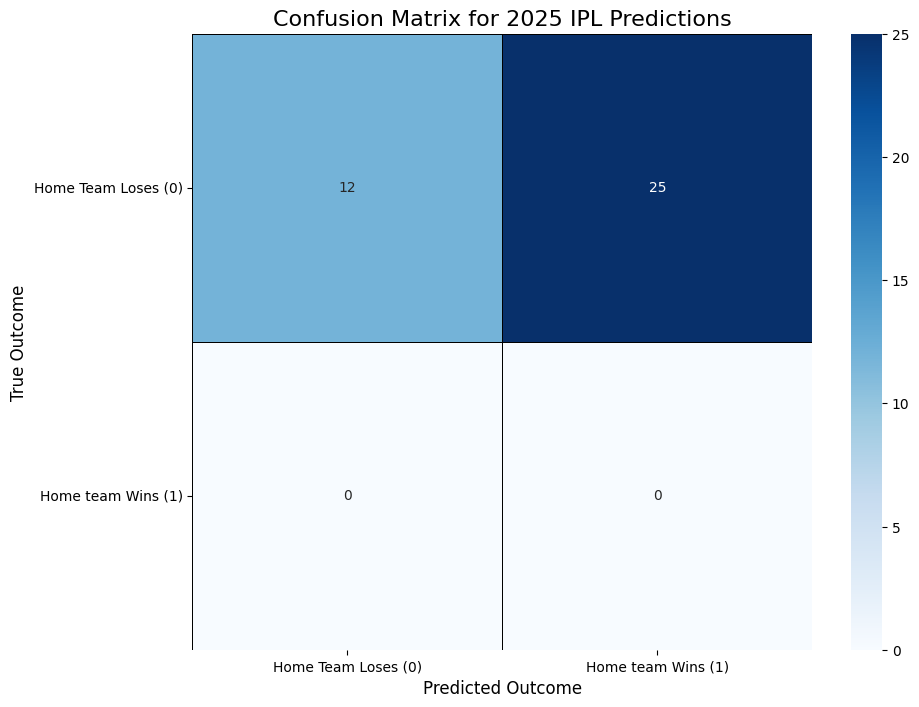

In [93]:
# We create the 'actual_outcome' column to compare with the 'predicted_outcome'.
prediction_results_df['actual_outcome'] = (prediction_results_df['winner'] == prediction_results_df['team1']).astype(int)


# --- Step 2: Calculate the Confusion Matrix ---
# We compare the true outcomes with the predicted outcomes.
cm = confusion_matrix(
    prediction_results_df['actual_outcome'],
    prediction_results_df['predicted_outcome']
)


# --- Step 3: Plot the heatmap ---
plt.figure(figsize=(10, 8))
# Define the labels for the matrix axes
labels = ['Home Team Loses (0)', 'Home team Wins (1)']

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            linewidths=.5, linecolor='black')

# Add titles and labels for clarity
plt.title('Confusion Matrix for 2025 IPL Predictions', fontsize=16)
plt.ylabel('True Outcome', fontsize=12)
plt.xlabel('Predicted Outcome', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.yticks(rotation=0)

# Display the plot
plt.show()

### Using LinearRegression Model (Hiregoudar Rashmi)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
gold_df = pd.read_csv('gold_df.csv')


In [ ]:
ml_rashmi = gold_df.copy()
ml_rashmi.shape

(256796, 34)

In [ ]:
ml_rashmi.columns

Index(['Unnamed: 0', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'id', 'season', 'city', 'match_type',
       'player_of_match', 'venue', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'result', 'result_margin', 'target_runs',
       'target_overs', 'umpire1', 'umpire2', 'year'],
      dtype='object')

In [ ]:
match_spec_feature = ['season', 'city', 'match_type', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision']
Team_Player_perf_features = ['innings', 'batting_team', 'bowling_team', 'over', 'ball', 'batter', 'bowler', 
                             'non_striker', 'batsman_runs','extra_runs', 'total_runs', 'extras_type', 
                             'is_wicket', 'player_dismissed', 'dismissal_kind']

In [ ]:
features = match_spec_feature + Team_Player_perf_features

target = 'winner'

cols = [ 'inning','batting_team', 'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
        'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket', 'player_dismissed', 
        'dismissal_kind', 'season', 'city', 'match_type', 'venue', 'team1', 
        'team2', 'toss_winner', 'toss_decision', 'umpire1', 'umpire2', 'year', 'winner' ]

In [ ]:
df = ml_rashmi[cols]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256796 entries, 0 to 256795
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   inning            256796 non-null  int64 
 1   batting_team      256796 non-null  object
 2   bowling_team      256796 non-null  object
 3   over              256796 non-null  int64 
 4   ball              256796 non-null  int64 
 5   batter            256796 non-null  object
 6   bowler            256796 non-null  object
 7   non_striker       256796 non-null  object
 8   batsman_runs      256796 non-null  int64 
 9   extra_runs        256796 non-null  int64 
 10  total_runs        256796 non-null  int64 
 11  extras_type       256796 non-null  object
 12  is_wicket         256796 non-null  int64 
 13  player_dismissed  256796 non-null  object
 14  dismissal_kind    256796 non-null  object
 15  season            256796 non-null  int64 
 16  city              256796 non-null  obj

In [ ]:
# Drop columns with too many unique values or low relevance for regression
drop_cols = ['umpire1', 'umpire2', 'player_dismissed', 'batter', 'bowler', 'non_striker']
df.drop(columns=drop_cols, inplace=True)

/var/folders/11/hpc_bc2530j7vz88js71y5400000gn/T/ipykernel_89331/2993917001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=drop_cols, inplace=True)


In [ ]:
#Drop rows with missing values
df.dropna(inplace=True)

/var/folders/11/hpc_bc2530j7vz88js71y5400000gn/T/ipykernel_89331/532780326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)


In [ ]:
#  Define features and target
X = df_encoded.drop(columns=[col for col in df_encoded.columns if 'winner_' in col])
y = df_encoded[[col for col in df_encoded.columns if 'winner_' in col]]

#  If multiple teams are one-hot encoded in y, reduce to a numerical class label for regression
y_numeric = y.idxmax(axis=1).apply(lambda x: x.split('winner_')[-1])

# Convert string class labels to numeric values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_numeric)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Round to nearest integer
y_pred_int = np.rint(y_pred).astype(int)

# Clip predictions to valid range
y_pred_int = np.clip(y_pred_int, 0, len(le.classes_) - 1)

# Convert back to team names using LabelEncoder
team_predictions = le.inverse_transform(y_pred_int)
team_true = le.inverse_transform(y_test)

# Create a DataFrame for comparison
results = pd.DataFrame({
    'TrueTeam': team_true,
    'PredictedTeam': team_predictions,
    'RawPred': y_pred.flatten()
})
print(results.head())

# Add a column to indicate if prediction was correct
results['Correct Prediction'] = results['TrueTeam'] == results['PredictedTeam']


# Accuracy of the rounded regression (for reference only)
acc = accuracy_score(y_test, y_pred_int)
print(f"Rounded Regression Accuracy: {acc:.2f}")

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(results['Correct Prediction'].value_counts())
print(results.head())


    TrueTeam PredictedTeam   RawPred
0    Chennai       Chennai  0.163858
1    Gujarat        Kerala  3.565269
2  Hyderabad        Kerala  3.880510
3    Kolkata     Hyderabad  2.870966
4  Hyderabad       Gujarat  1.741034
Rounded Regression Accuracy: 0.14
Mean Squared Error: 6.16
False    43930
True      7430
Name: Correct Prediction, dtype: int64
    TrueTeam PredictedTeam   RawPred  Correct Prediction
0    Chennai       Chennai  0.163858                True
1    Gujarat        Kerala  3.565269               False
2  Hyderabad        Kerala  3.880510               False
3    Kolkata     Hyderabad  2.870966               False
4  Hyderabad       Gujarat  1.741034               False


In [ ]:
# Map back to team names (if not already done)
team_true = le.inverse_transform(y_test)
team_pred = le.inverse_transform(y_pred_int)


In [ ]:
# Create mapping: team name → integer for plotting
team_to_int = {team: i for i, team in enumerate(le.classes_)}
int_to_team = {i: team for team, i in team_to_int.items()}




In [ ]:
# Convert team names to numeric positions
x_vals = [team_to_int[team] for team in team_true]
y_vals = [team_to_int[team] for team in team_pred]

team_true length: 51360
team_pred length: 51360


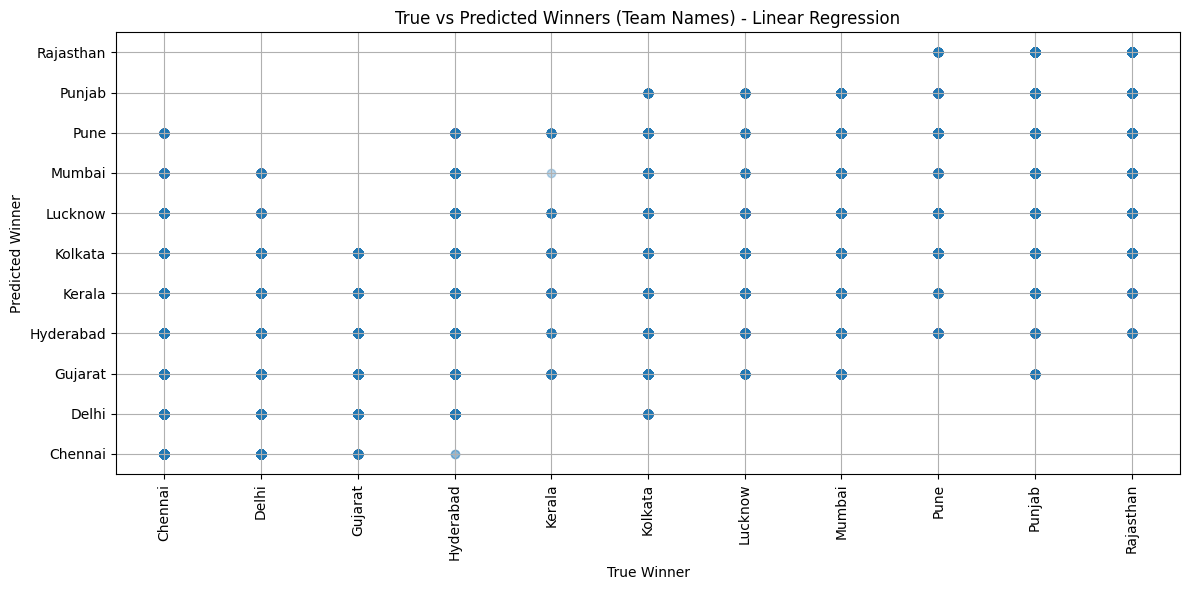

In [ ]:
# Check team_true and team_pred lengths
print("team_true length:", len(team_true))
print("team_pred length:", len(team_pred))

# Trim to shortest length
min_len = min(len(team_true), len(team_pred))
team_true = team_true[:min_len]
team_pred = team_pred[:min_len]

# Map to integers for plotting
team_to_int = {team: i for i, team in enumerate(le.classes_)}
x_vals = [team_to_int[team] for team in team_true]
y_vals = [team_to_int[team] for team in team_pred]

# Final check before plotting
assert len(x_vals) == len(y_vals), "Mismatch in x and y lengths after mapping."

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(x_vals, y_vals, alpha=0.3)
plt.xlabel("True Winner")
plt.ylabel("Predicted Winner")
plt.title("True vs Predicted Winners (Team Names) - Linear Regression")
plt.xticks(ticks=list(team_to_int.values()), labels=list(team_to_int.keys()), rotation=90)
plt.yticks(ticks=list(team_to_int.values()), labels=list(team_to_int.keys()))
plt.grid(True)
plt.tight_layout()
plt.show()

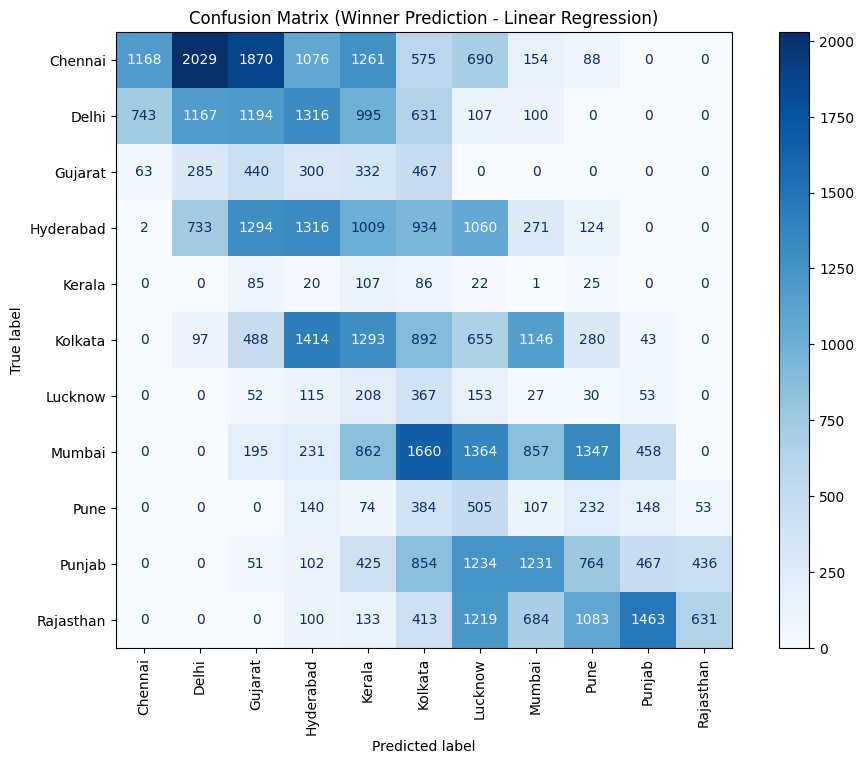

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(team_true, team_predictions, labels=le.classes_)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(12, 8))
disp.plot(xticks_rotation=90, ax=ax, cmap='Blues')
plt.title("Confusion Matrix (Winner Prediction - Linear Regression)")
plt.show()

(LLM model was used for refining the text)

**Note on Predicting Match Winners Using Ball-by-Ball Data**

Using ball-by-ball data (as in `sample_cricket.csv`) to predict match winners can lead to **artificially inflated accuracy**.

#### Why This Happens:

* In ball-by-ball datasets, each row represents a single delivery, but the **winner column remains the same** for all rows from the same match.
* As a result, the model is not truly predicting the winner based on match conditions or aggregated features.
* Instead, it **learns the outcome repeatedly**, since every ball carries the same label for the winner.
* This creates a misleadingly high accuracy—often exceeding 40%—because the model is effectively "seeing the answer" multiple times during training.

#### What We Actually Want:

Currently, we are predicting: *"Given the match details, which of these 8 teams will be the winner?"*

However, what we actually aim for is a **win/loss prediction for a single match**, which is a binary classification problem.

Instead of predicting the winner from multiple possible teams, we want the model to predict whether a team wins or loses within a match. This can be accomplished using a **binary classifier** on the winner column (i.e., win = 1, loss = 0).

To build a realistic predictor, it's better to use pre-match or aggregated features per match rather than individual ball records.



#### Linear Regression using Binary Classification Approach

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error


In [ ]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /Users/venkateshpujari/DS/DS_PROJEKT_AIM/02_models


In [ ]:
df = pd.read_csv('aggregated_match_data_by_innings_wo_small_dataset.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'aggregated_match_data_by_innings_wo_small_dataset.csv'

In [ ]:
df.shape
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       893 non-null    int64 
 1   id               893 non-null    int64 
 2   inning1_runs     893 non-null    int64 
 3   inning1_wickets  893 non-null    int64 
 4   inning1_balls    893 non-null    int64 
 5   inning2_runs     893 non-null    int64 
 6   inning2_wickets  893 non-null    int64 
 7   inning2_balls    893 non-null    int64 
 8   season           893 non-null    int64 
 9   city             893 non-null    object
 10  venue            893 non-null    object
 11  toss_winner      893 non-null    object
 12  toss_decision    893 non-null    object
 13  team1            893 non-null    object
 14  team2            893 non-null    object
 15  winner           893 non-null    object
 16  result           893 non-null    object
 17  umpire1          893 non-null    ob

In [ ]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'id', 'result', 'player_of_match']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Create binary target: 1 if team1 wins, else 0
df['winner_binary'] = (df['winner'] == df['team1']).astype(int)


In [ ]:
print(f"Shape of target (y): {y.shape}")
print("-" * 30)

Shape of target (y): (256796, 22)
------------------------------


In [ ]:
# Select features
features = ['team1', 'team2', 'city', 'venue', 'toss_winner', 'toss_decision',
            'inning1_runs', 'season', 'umpire1', 'umpire2', 'inning1_balls', 'inning1_wickets']
X = df[features].copy()
y = df['winner_binary']


In [ ]:
# Label Encoding for categorical features
cat_features = ['team1', 'team2', 'city', 'venue', 'toss_winner', 'toss_decision', 'umpire1', 'umpire2']
num_features = ['inning1_runs', 'season', 'inning1_balls', 'inning1_wickets']

encoders = {}
for col in cat_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le
  
# Print encoded features
print("\nEncoded features (first 5 rows):")
print(X.head())


Encoded features (first 5 rows):
   team1  team2  city  venue  toss_winner  toss_decision  inning1_runs  \
0      0      4     2     16            0              1           222   
1      6      1     7     26            1              0           240   
2      2      7    10     11            7              0           129   
3      5      0    23     37            5              0           165   
4      4      3    21     10            3              0           110   

   season  umpire1  umpire2  inning1_balls  inning1_wickets  
0    2008        9       41            124                3  
1    2008       34       52            124                5  
2    2008        8       15            122                8  
3    2008       51       14            123                7  
4    2008       10       24            118               10  


In [ ]:
# Scale numerical features
scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predictions
y_pred_continuous = model.predict(X_test)
y_pred_binary = (y_pred_continuous >= 0.5).astype(int)

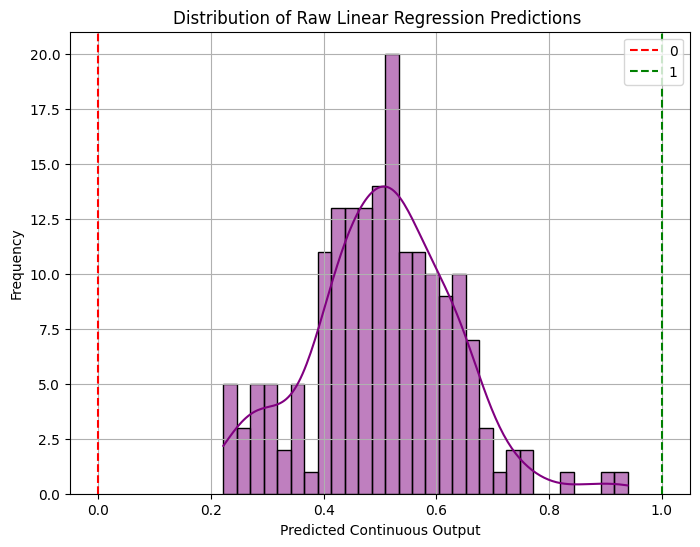

In [ ]:
# Plot prediction distribution before thresholding
plt.figure(figsize=(8,6))
sns.histplot(y_pred_continuous, bins=30, kde=True, color='purple')
plt.title("Distribution of Raw Linear Regression Predictions ")
plt.xlabel("Predicted Continuous Output")
plt.ylabel("Frequency")
plt.axvline(x=0, color='red', linestyle='--', label='0')
plt.axvline(x=1, color='green', linestyle='--', label='1')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Train predictions
y_pred_train_continuous = model.predict(X_train)

# Test predictions (already calculated as y_pred_continuous)
# y_pred_continuous = model.predict(X_test)

# Training metrics
mae_train = mean_absolute_error(y_train, y_pred_train_continuous)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_continuous))

# Testing metrics
mae_test = mean_absolute_error(y_test, y_pred_continuous)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_continuous))

# Print metrics
print("\n--- Regression Evaluation ---")
print(f"Train MAE: {mae_train:.4f}, Train RMSE: {rmse_train:.4f}")
print(f"Test MAE: {mae_test:.4f}, Test RMSE: {rmse_test:.4f}")

# Custom MAE Degree Evaluation for multiple degrees
for degree in [2, 3, 4, 5]:
    custom_train_error = np.mean(np.abs(y_train - y_pred_train_continuous)**degree)**(1/degree)
    custom_test_error = np.mean(np.abs(y_test - y_pred_continuous)**degree)**(1/degree)
    print(f"The MAE for Degree-{degree} (Train): {custom_train_error:.4f}")
    print(f"The MAE for Degree-{degree} (Test): {custom_test_error:.4f}")


--- Regression Evaluation ---
Train MAE: 0.4721, Train RMSE: 0.4859
Test MAE: 0.4759, Test RMSE: 0.4920
The MAE for Degree-2 (Train): 0.4859
The MAE for Degree-2 (Test): 0.4920
The MAE for Degree-3 (Train): 0.4983
The MAE for Degree-3 (Test): 0.5074
The MAE for Degree-4 (Train): 0.5099
The MAE for Degree-4 (Test): 0.5226
The MAE for Degree-5 (Train): 0.5208
The MAE for Degree-5 (Test): 0.5380


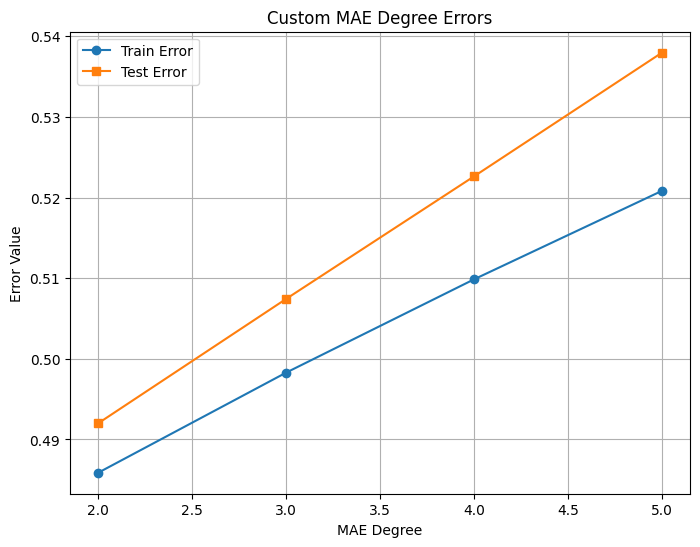

In [ ]:
degrees = [2, 3, 4, 5]
train_errors = []
test_errors = []

for degree in degrees:
    custom_train_error = np.mean(np.abs(y_train - y_pred_train_continuous)**degree)**(1/degree)
    custom_test_error = np.mean(np.abs(y_test - y_pred_continuous)**degree)**(1/degree)
    train_errors.append(custom_train_error)
    test_errors.append(custom_test_error)

# Plotting the custom MAE degree errors
plt.figure(figsize=(8,6))
plt.plot(degrees, train_errors, marker='o', label='Train Error')
plt.plot(degrees, test_errors, marker='s', label='Test Error')
plt.title("Custom MAE Degree Errors")
plt.xlabel("MAE Degree")
plt.ylabel("Error Value")
plt.legend()
plt.grid()
plt.show()

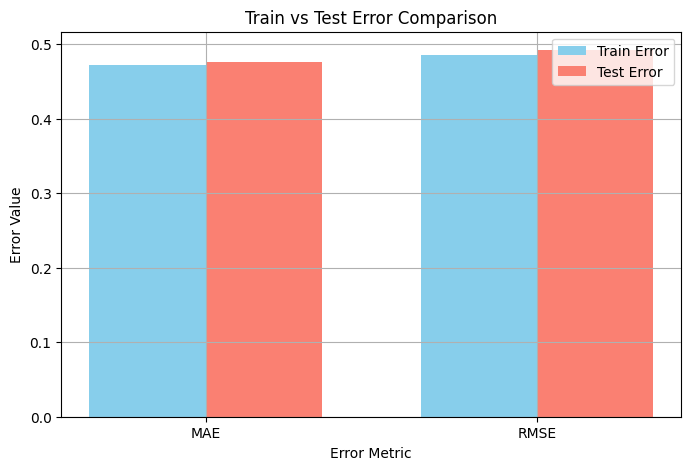

In [ ]:
# Plot train vs test error
plt.figure(figsize=(8, 5))
errors = ['MAE', 'RMSE']
train_errors = [mae_train, rmse_train]
test_errors = [mae_test, rmse_test]
bar_width = 0.35
index = np.arange(len(errors))

plt.bar(index, train_errors, bar_width, label='Train Error', color='skyblue')
plt.bar(index + bar_width, test_errors, bar_width, label='Test Error', color='salmon')
plt.xlabel('Error Metric')
plt.ylabel('Error Value')
plt.title('Train vs Test Error Comparison')
plt.xticks(index + bar_width / 2, errors)
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize model
lr_model = LinearRegression(fit_intercept=True)

# Evaluate using 5-fold CV
mae_scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_absolute_error')
rmse_scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Convert negative scores to positive
mae_scores = -mae_scores
rmse_scores = -rmse_scores

# Print results
print("\nCross-Validation Results:")
print(f"Mean MAE: {mae_scores.mean():.4f} ± {mae_scores.std():.4f}")
print(f"Mean RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")


Cross-Validation Results:
Mean MAE: 0.4868 ± 0.0116
Mean RMSE: 0.5014 ± 0.0197


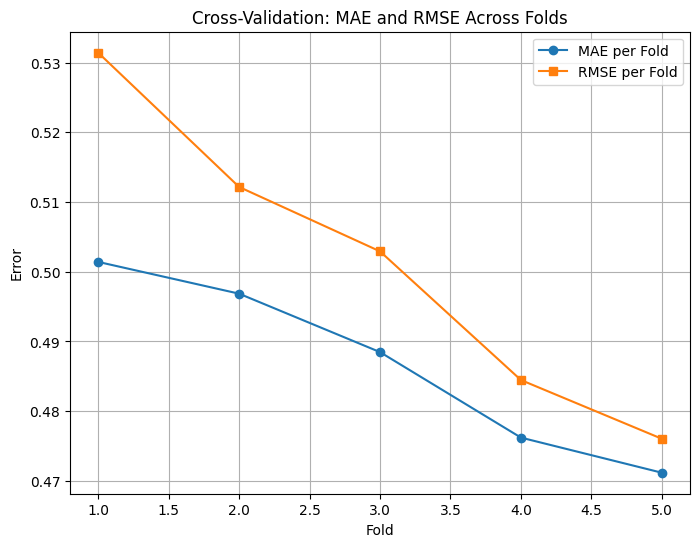

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1, 6), mae_scores, marker='o', label='MAE per Fold')
plt.plot(range(1, 6), rmse_scores, marker='s', label='RMSE per Fold')
plt.title("Cross-Validation: MAE and RMSE Across Folds")
plt.xlabel("Fold")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Classification Evaluation
acc = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", acc)
print("Classification Report:\n", classification_report(y_test, y_pred_binary))


Accuracy: 0.5698324022346368
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.54      0.55        87
           1       0.58      0.60      0.59        92

    accuracy                           0.57       179
   macro avg       0.57      0.57      0.57       179
weighted avg       0.57      0.57      0.57       179



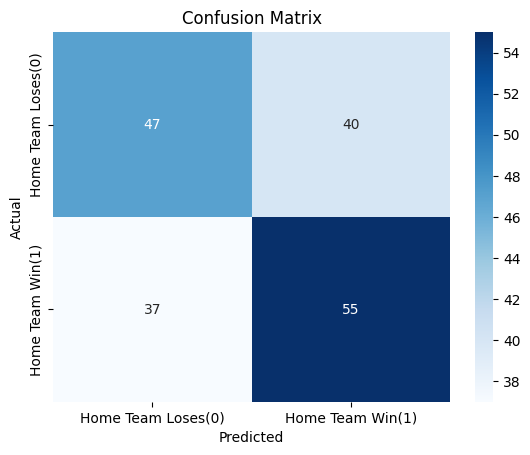

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Home Team Loses(0)','Home Team Win(1)'], yticklabels=['Home Team Loses(0)','Home Team Win(1)'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print(df['winner_binary'].value_counts())

1    461
0    432
Name: winner_binary, dtype: int64


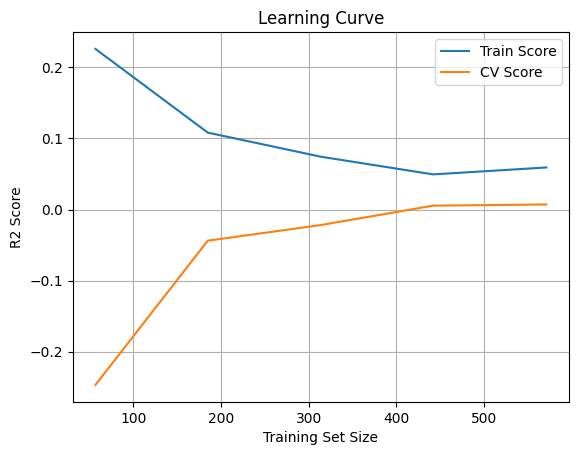

In [ ]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='CV Score')
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.legend()
plt.grid()
plt.show()


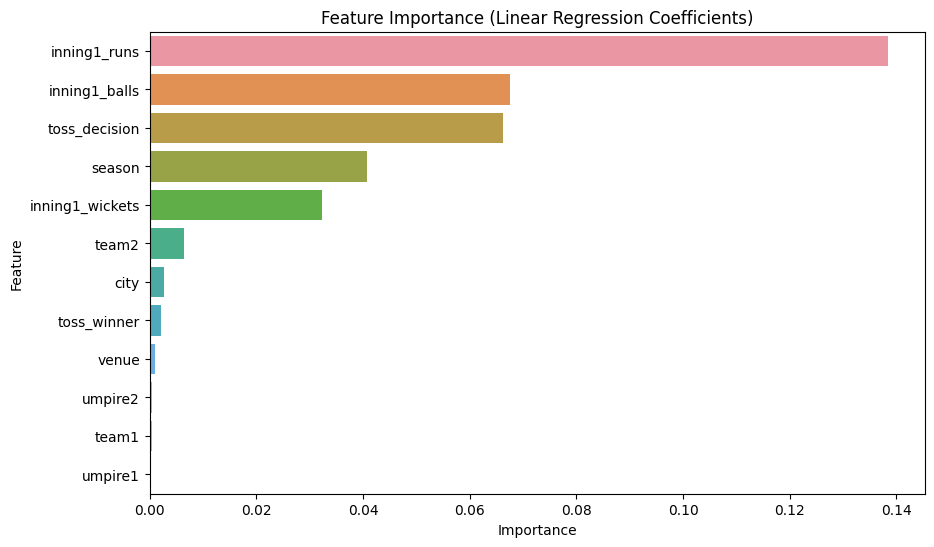

In [ ]:
# Feature Importance
importances = np.abs(model.coef_)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

Hyperparameter Tuning for Linear Regression

In [ ]:
# Hyperparameter tuning for fit_intercept
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'fit_intercept': True}


In [ ]:
# Train model with best parameters 
best_model = LinearRegression(**grid_search.best_params_)
best_model.fit(X_train, y_train)

# Predictions 
y_pred_continuous_best = best_model.predict(X_test)
y_pred_binary_best = (y_pred_continuous_best >= 0.5).astype(int)

y_pred_train_continuous_best = best_model.predict(X_train)

# Regression Evaluation (After Tuning for both Train and Test)
mae_train_best = mean_absolute_error(y_train, y_pred_train_continuous_best)
rmse_train_best = np.sqrt(mean_squared_error(y_train, y_pred_train_continuous_best))

mae_test_best = mean_absolute_error(y_test, y_pred_continuous_best)
rmse_test_best = np.sqrt(mean_squared_error(y_test, y_pred_continuous_best))

print("\n Regression Evaluation After Hyperparameter Tuning ")
print(f"Train MAE: {mae_train_best:.4f}, Train RMSE: {rmse_train_best:.4f}")
print(f"Test MAE: {mae_test_best:.4f}, Test RMSE: {rmse_test_best:.4f}")




--- Regression Evaluation After Hyperparameter Tuning ---
Train MAE: 0.4721, Train RMSE: 0.4859
Test MAE: 0.4759, Test RMSE: 0.4920


In [ ]:
# --- Cross-Validation Evaluation ---

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score

# Define custom accuracy scorer for regression output
def thresholded_accuracy(y_true, y_pred_cont):
    y_pred_bin = (y_pred_cont >= 0.5).astype(int)
    return accuracy_score(y_true, y_pred_bin)

thresholded_accuracy_scorer = make_scorer(thresholded_accuracy, greater_is_better=True)

# Run cross-validation on entire dataset X, y
cv_accuracy_scores = cross_val_score(LinearRegression(), X, y, cv=2, scoring=thresholded_accuracy_scorer)

print("\n Cross-Validated Accuracy")
print(f"Cross-Validated Accuracy: {cv_accuracy_scores.mean():.4f}")

# Custom MAE Degree Evaluation after Hyperparameter Tuning
print("\n Custom MAE Degree Evaluation (After Tuning)")
for degree in [2, 3, 4, 5]:
    custom_train_error_best = np.mean(np.abs(y_train - y_pred_train_continuous_best)**degree)**(1/degree)
    custom_test_error_best = np.mean(np.abs(y_test - y_pred_continuous_best)**degree)**(1/degree)
    print(f"Custom MAE Degree-{degree} (Train): {custom_train_error_best:.4f}")
    print(f"Custom MAE Degree-{degree} (Test): {custom_test_error_best:.4f}")




 Cross-Validated Accuracy
Cross-Validated Accuracy: 0.4860

 Custom MAE Degree Evaluation (After Tuning)
Custom MAE Degree-2 (Train): 0.4859
Custom MAE Degree-2 (Test): 0.4920
Custom MAE Degree-3 (Train): 0.4983
Custom MAE Degree-3 (Test): 0.5074
Custom MAE Degree-4 (Train): 0.5099
Custom MAE Degree-4 (Test): 0.5226
Custom MAE Degree-5 (Train): 0.5208
Custom MAE Degree-5 (Test): 0.5380


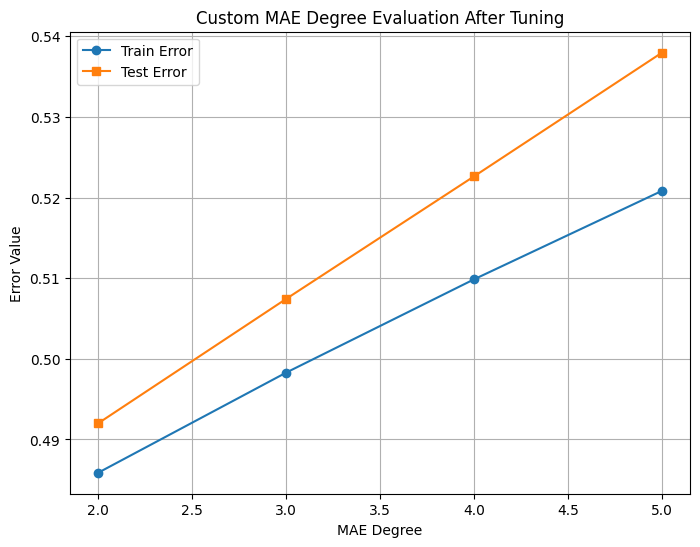

In [ ]:
# Plot Custom MAE Degree Evaluation (After Tuning)
train_errors = []
test_errors = []
degrees = [2, 3, 4, 5]

for degree in degrees:
    custom_train_error_best = np.mean(np.abs(y_train - y_pred_train_continuous_best)**degree)**(1/degree)
    custom_test_error_best = np.mean(np.abs(y_test - y_pred_continuous_best)**degree)**(1/degree)
    train_errors.append(custom_train_error_best)
    test_errors.append(custom_test_error_best)

plt.figure(figsize=(8,6))
plt.plot(degrees, train_errors, marker='o', label='Train Error')
plt.plot(degrees, test_errors, marker='s', label='Test Error')
plt.title("Custom MAE Degree Evaluation After Tuning")
plt.xlabel("MAE Degree")
plt.ylabel("Error Value")
plt.legend()
plt.grid()
plt.show()


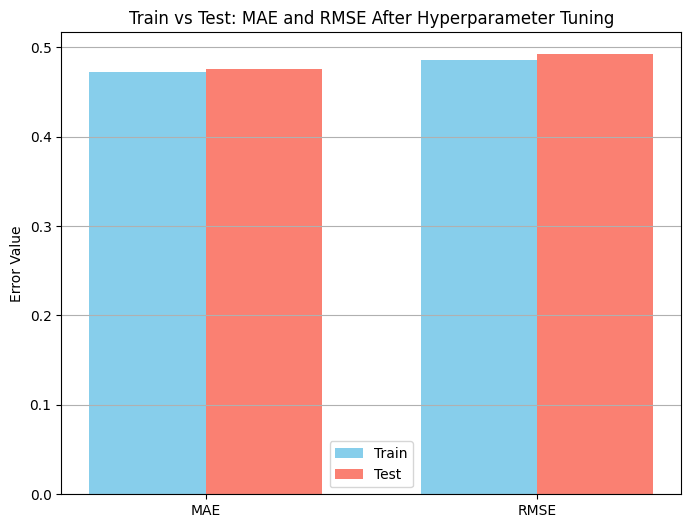

In [ ]:
# Combined Plot for Train vs Test for MAE and RMSE After Hyperparameter Tuning
plt.figure(figsize=(8,6))
bar_width = 0.35
index = np.arange(2)

plt.bar(index, [mae_train_best, rmse_train_best], bar_width, label='Train', color='skyblue')
plt.bar(index + bar_width, [mae_test_best, rmse_test_best], bar_width, label='Test', color='salmon')

plt.xticks(index + bar_width / 2, ['MAE', 'RMSE'])
plt.title("Train vs Test: MAE and RMSE After Hyperparameter Tuning")
plt.ylabel("Error Value")
plt.legend()
plt.grid(axis='y')
plt.show()


In [ ]:
# Classification Evaluation (After Tuning)
acc_best = accuracy_score(y_test, y_pred_binary_best)
print("Accuracy:", acc_best)
print("Classification Report:\n", classification_report(y_test, y_pred_binary_best))

Accuracy: 0.5698324022346368
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.54      0.55        87
           1       0.58      0.60      0.59        92

    accuracy                           0.57       179
   macro avg       0.57      0.57      0.57       179
weighted avg       0.57      0.57      0.57       179



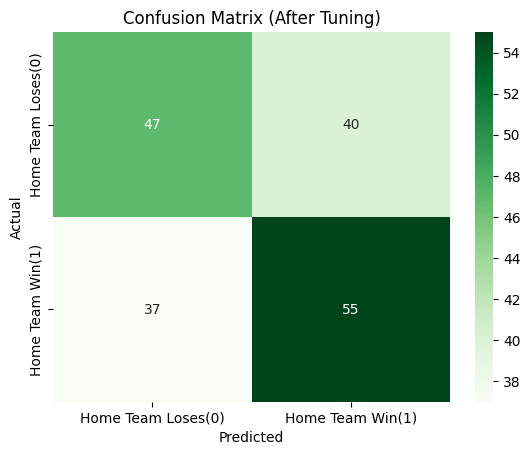

In [ ]:
# Confusion Matrix 
cm_best = confusion_matrix(y_test, y_pred_binary_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Home Team Loses(0)','Home Team Win(1)'], yticklabels=['Home Team Loses(0)','Home Team Win(1)'])
plt.title("Confusion Matrix (After Tuning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

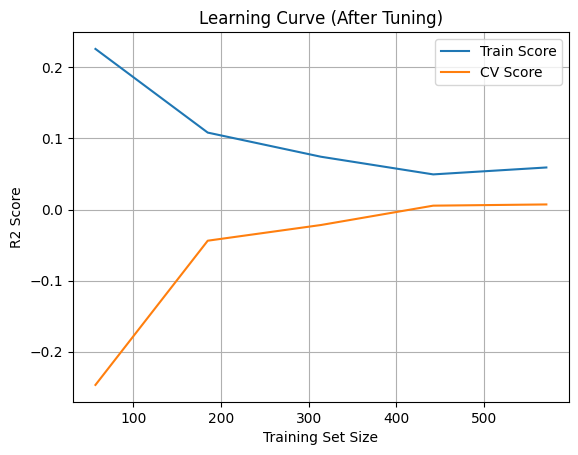

In [ ]:
# Learning Curve 
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='CV Score')
plt.title("Learning Curve (After Tuning)")
plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.legend()
plt.grid()
plt.show()

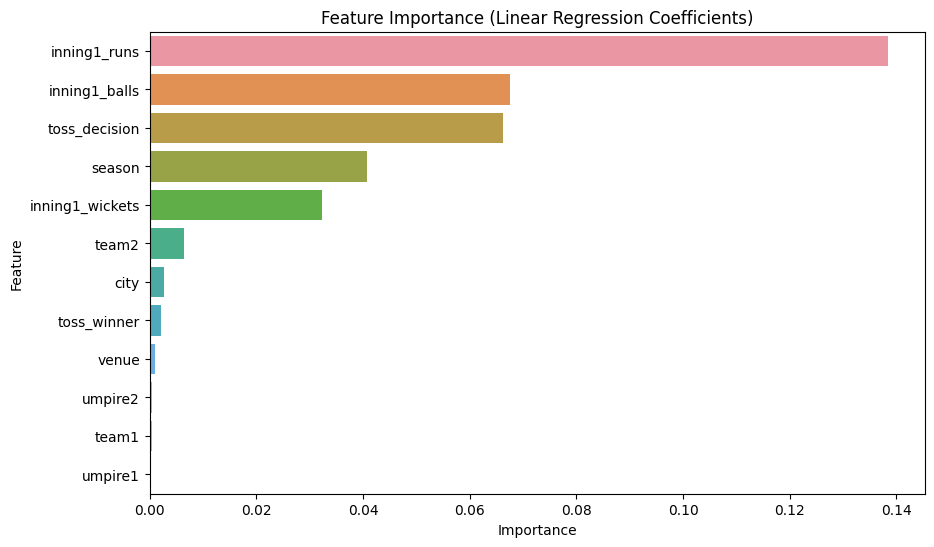

In [ ]:
# Feature Importance 
importances = np.abs(best_model.coef_)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()


###  Using RandomForest Model (GBN Deepak)

#### Initating the Random Forest Model

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [97]:
ml_deepak = pd.read_csv("gold_df.csv")
df = ml_deepak.copy()

In [98]:
unique_venues = df['venue'].nunique()
print(f"Total number of unique venues IPL matches were played at: {unique_venues}")

Total number of unique venues IPL matches were played at: 41


In [99]:
df.shape
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256796 entries, 0 to 256795
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        256796 non-null  int64  
 1   inning            256796 non-null  int64  
 2   batting_team      256796 non-null  object 
 3   bowling_team      256796 non-null  object 
 4   over              256796 non-null  int64  
 5   ball              256796 non-null  int64  
 6   batter            256796 non-null  object 
 7   bowler            256796 non-null  object 
 8   non_striker       256796 non-null  object 
 9   batsman_runs      256796 non-null  int64  
 10  extra_runs        256796 non-null  int64  
 11  total_runs        256796 non-null  int64  
 12  extras_type       256796 non-null  object 
 13  is_wicket         256796 non-null  int64  
 14  player_dismissed  256796 non-null  object 
 15  dismissal_kind    256796 non-null  object 
 16  id                25

#### Initial Approach for Predicting the match winner

In [100]:
# Data for model training
# Keeing only the necessary columns
columns_to_keep = ["winner", "team1", "team2", "city", "venue"]
df_bmp = df[columns_to_keep]
df_bmp = df_bmp.dropna()


In [101]:
#describing the before match prediction data
df_bmp.shape
df_bmp.describe()
df_bmp.count()
df_bmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256796 entries, 0 to 256795
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   winner  256796 non-null  object
 1   team1   256796 non-null  object
 2   team2   256796 non-null  object
 3   city    256796 non-null  object
 4   venue   256796 non-null  object
dtypes: object(5)
memory usage: 9.8+ MB


In [102]:
#Feature Selection  
features = ["team1", "team2", "city", "venue"]
target = "winner"

# Drop missing and make a copy
df_model = df_bmp[features + [target]].dropna().copy()


In [103]:
#Encoding categorical variables
label_encoders = {}
for col in df_model.columns:
    if df_model[col].dtype == 'object':
        le = LabelEncoder()
        df_model[col] = le.fit_transform(df_model[col])
        label_encoders[col] = le


   Train Size  Test Size  Accuracy
0         0.9        0.1     80.17
1         0.8        0.2     80.20
2         0.7        0.3     79.99
3         0.6        0.4     79.99


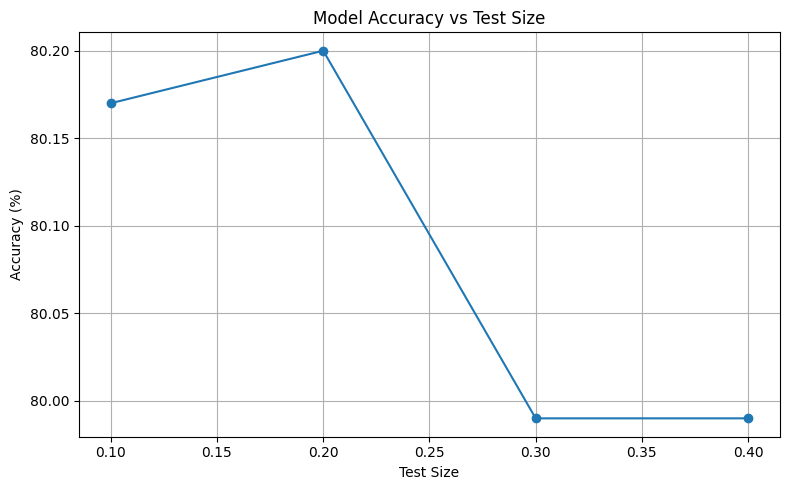

In [104]:
# Splitting the data into training and testing sets
# Split features and target
X = df_model[features]
y = df_model[target]

# Define test size range
test_sizes = [0.1, 0.2, 0.3, 0.4]
results = []

# Train and evaluate model on different test sizes
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results.append({
        "Train Size": round(1 - test_size, 2),
        "Test Size": test_size,
        "Accuracy": round(acc * 100, 2)
    })

    # Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
# Plot the accuracy vs test size
plt.figure(figsize=(8, 5))
plt.plot(results_df["Test Size"], results_df["Accuracy"], marker='o')
plt.title("Model Accuracy vs Test Size")
plt.xlabel("Test Size")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


Best test size: 0.2 with Accuracy: 80.2%


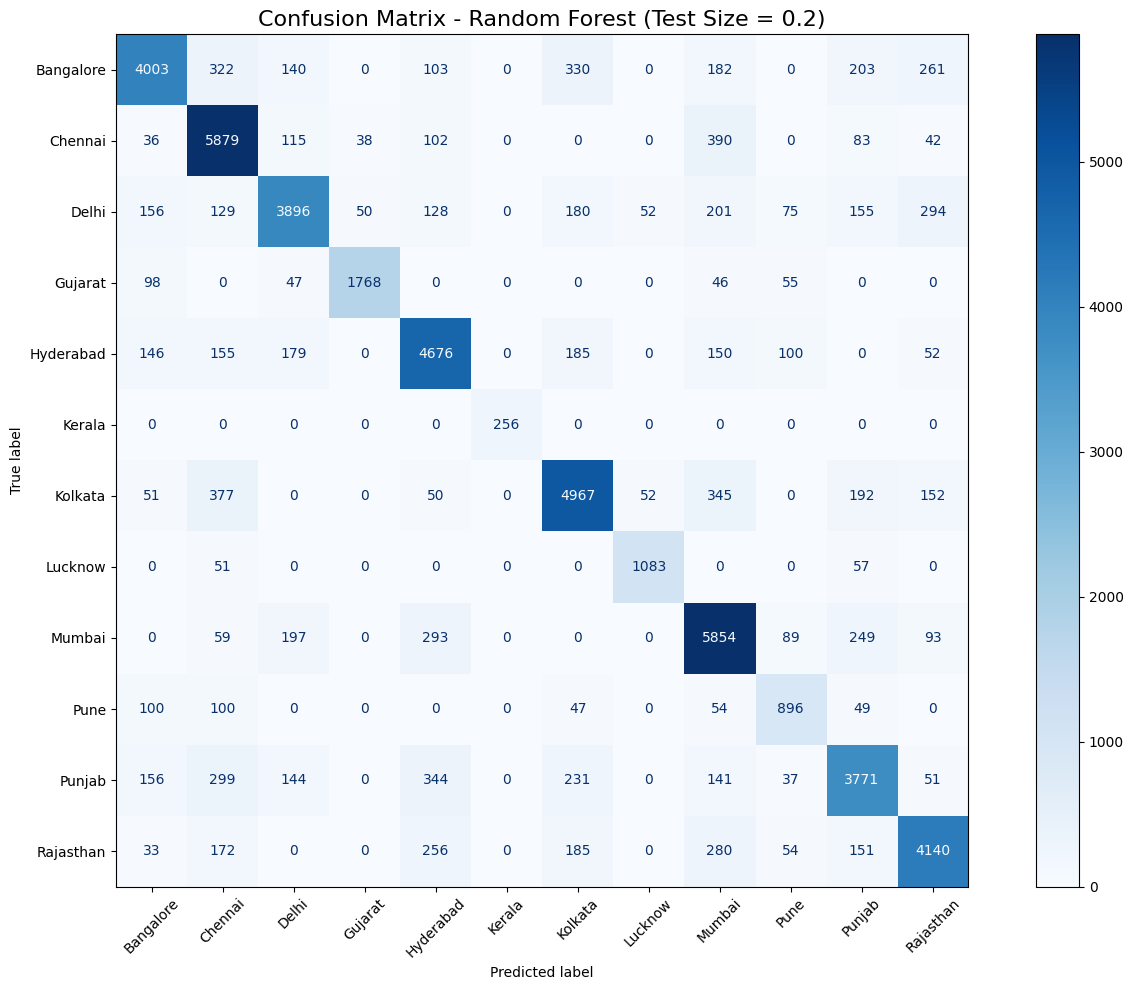

In [105]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


best_split = max(results, key=lambda x: x['Accuracy'])
best_test_size = best_split["Test Size"]
print(f"\nBest test size: {best_test_size} with Accuracy: {best_split['Accuracy']}%")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=best_test_size, random_state=42)
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

target_names = label_encoders[target].classes_
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

fig, ax = plt.subplots(figsize=(14, 10))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45, values_format='.0f')
plt.title(f"Confusion Matrix - Random Forest (Test Size = {best_test_size})", fontsize=16)
plt.grid(False)
plt.tight_layout()
plt.show()


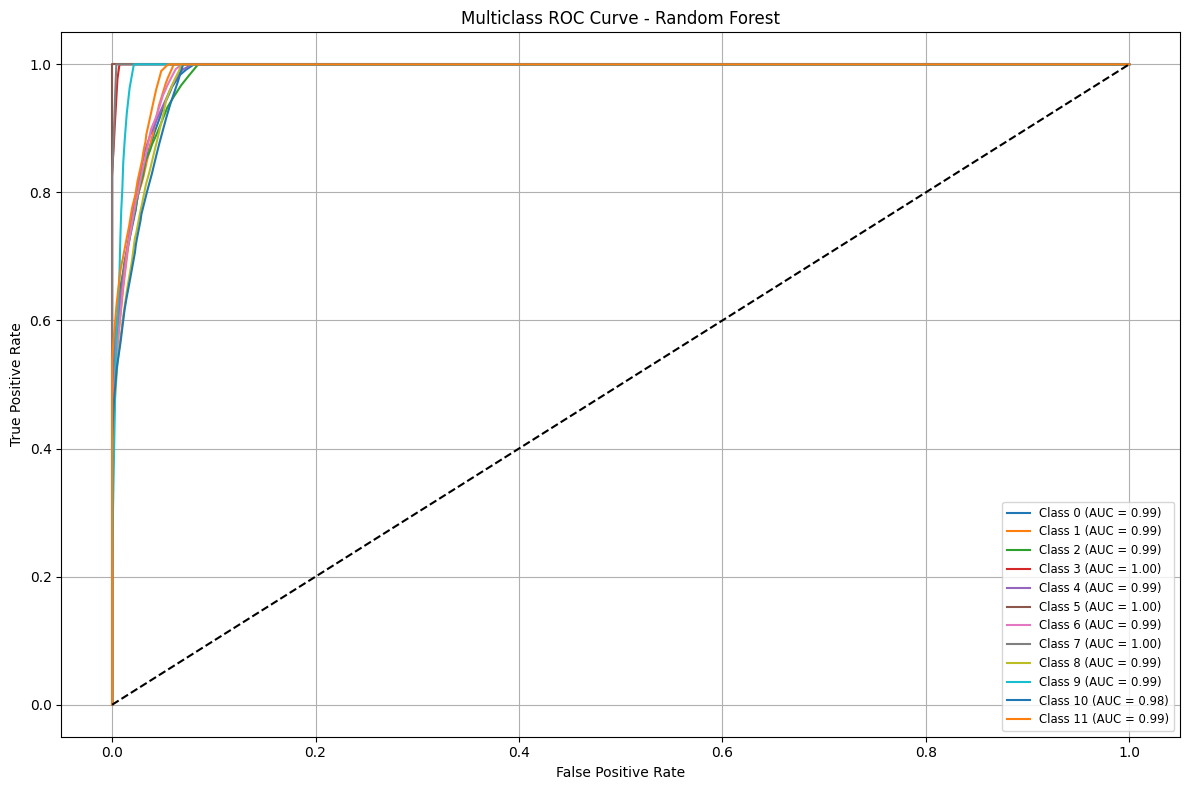

In [106]:
#ROC Curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# Binarize the true labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_score = model.predict_proba(X_test)

fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(12, 8))
for i in range(y_score.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("Multiclass ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right", fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


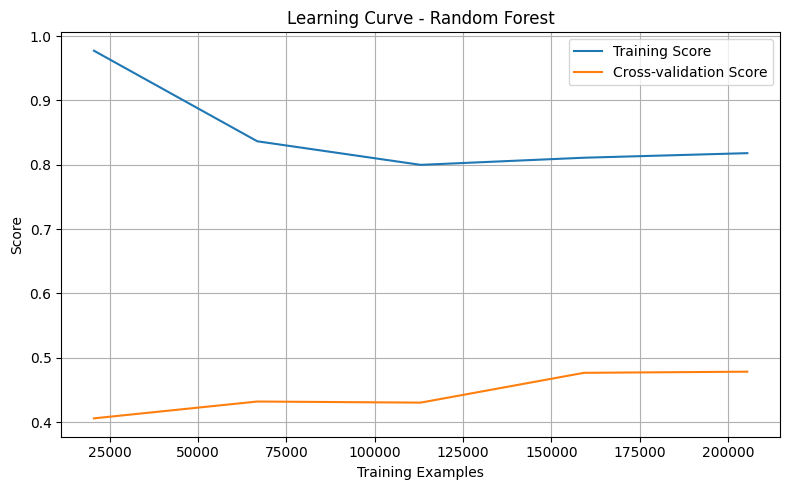

In [107]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, label="Training Score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation Score")
plt.title("Learning Curve - Random Forest")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [108]:
#Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.78      5544
           1       0.78      0.88      0.83      6685
           2       0.83      0.73      0.78      5316
           3       0.95      0.88      0.91      2014
           4       0.79      0.83      0.81      5643
           5       1.00      1.00      1.00       256
           6       0.81      0.80      0.81      6186
           7       0.91      0.91      0.91      1191
           8       0.77      0.86      0.81      6834
           9       0.69      0.72      0.70      1246
          10       0.77      0.73      0.75      5174
          11       0.81      0.79      0.80      5271

    accuracy                           0.80     51360
   macro avg       0.83      0.82      0.82     51360
weighted avg       0.80      0.80      0.80     51360



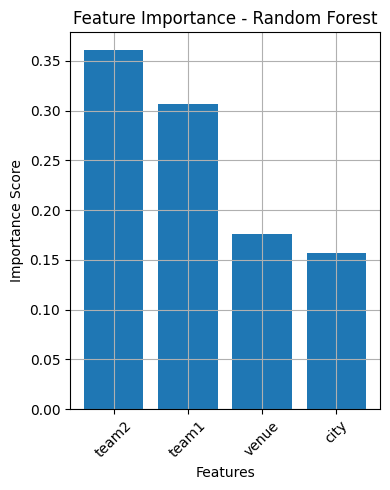

In [109]:
# Feature Importance Plot

feature_names = ["team1", "team2", "city", "venue"]

importances = best_model.feature_importances_
indices = importances.argsort()[::-1]
plt.figure(figsize=(4, 5))
plt.bar(range(len(feature_names)), importances[indices], align="center")
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=45)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()


#### Hyper-Parameter tuning the initail Approach model


In [112]:
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=50000, stratify=y, random_state=42)

# Using 80/20 split on the sample
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Randomized Search
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    scoring='accuracy'
)

# Run the search
start = time.time()
random_search.fit(X_train, y_train)
end = time.time()

# Results
print(f"\n RandomizedSearchCV completed in {round((end - start) / 60, 2)} minutes")
print("Best Parameters:", random_search.best_params_)

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))
print(f" Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Fitting 5 folds for each of 30 candidates, totalling 150 fits

 RandomizedSearchCV completed in 4.87 minutes
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}

 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77      1114
           1       0.80      0.86      0.83      1244
           2       0.81      0.76      0.78      1040
           3       0.94      0.92      0.93       381
           4       0.78      0.81      0.79      1053
           5       1.00      1.00      1.00        55
           6       0.78      0.84      0.81      1211
           7       0.88      0.94      0.91       235
           8       0.77      0.87      0.82      1349
           9       0.66      0.66      0.66       222
          10       0.76      0.70      0.73      1018
          11       0.83      0.76      0.79      1078

    accuracy 


 #### Why diffferent approach? 
 #### the initial random forest model suffered from data leakage, resulting in unrealistically high accuracy scores.  

##### Building a Robust Model:To address this, the dataset was aggregated at the match level. Instead of using the original gold_df, a new, appropriately structured DataFrame is referenced to ensure a more robust modeling process.

##### Limitation of the Initial Model: The initial model was misleading—not only did it display inflated accuracy, but it also attempted to predict the winning team from all possible teams, rather than focusing on the specific teams playing each match. This approach did not align with our actual business requirement.



#### Random Forest Classifier - Binary classification Approach

##### if Team1 win == 1 else == 0, 0 to be considered as Team2 as winner of the match, and introduced a new target column

In [113]:
df = pd.read_csv('aggregated_match_data_by_innings_wo_small_dataset.csv') # Loading the Aggrigated dataset
df = df[(df['winner'] == df['team1']) | (df['winner'] == df['team2'])]
df['target_binary'] = (df['winner'] == df['team1']).astype(int)

X = df[['season', 'city', 'venue', 'toss_winner', 'toss_decision', 'team1', 'team2',
        'inning1_runs', 'inning1_wickets', 'inning1_balls']]
X = pd.get_dummies(X)
y = df['target_binary']

In [114]:
#Trainig the model in different test sizes

test_sizes = [0.1, 0.2, 0.3, 0.4]
split_results = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Test size: {test_size:.2f}, Accuracy: {acc * 100:.2f}%")
    split_results.append((test_size, acc))

Test size: 0.10, Accuracy: 60.23%
Test size: 0.20, Accuracy: 63.07%
Test size: 0.30, Accuracy: 56.44%
Test size: 0.40, Accuracy: 57.67%


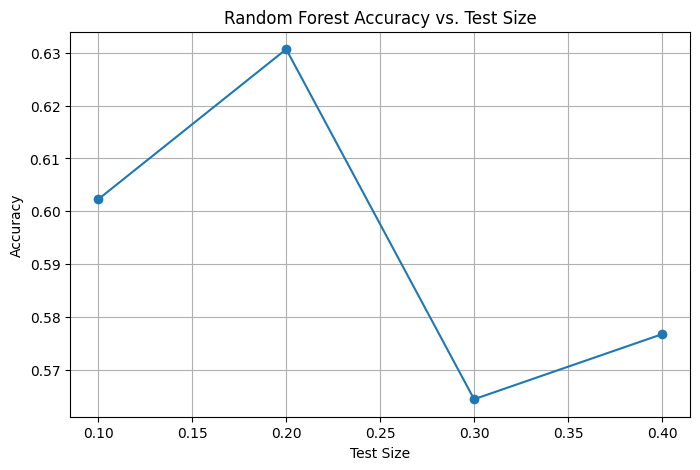

In [115]:
#Plot accuracy vs test sizes
split_results_df = pd.DataFrame(split_results, columns=["Test Size", "Accuracy"])
plt.figure(figsize=(8,5))
plt.plot(split_results_df["Test Size"], split_results_df["Accuracy"], marker='o')
plt.title("Random Forest Accuracy vs. Test Size")
plt.xlabel("Test Size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [116]:
#Plotting the Confusion Matrix for the best test size
chosen_test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=chosen_test_size, stratify=y, random_state=42
)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

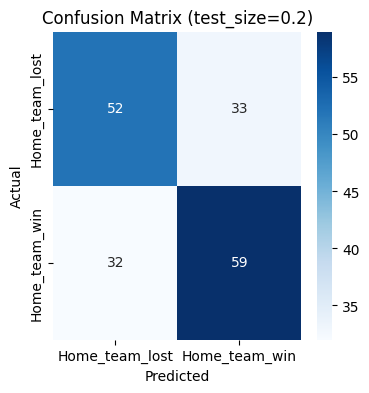

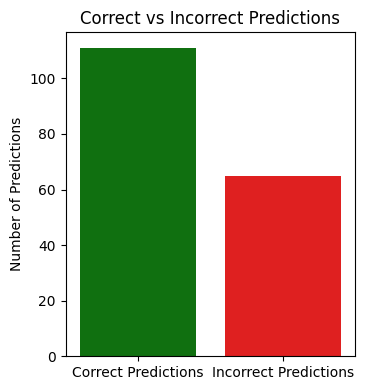

In [117]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Home_team_lost', 'Home_team_win'], yticklabels=['Home_team_lost', 'Home_team_win'])
plt.title(f"Confusion Matrix (test_size={chosen_test_size})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Correct vs Incorrect Predictions
tn, fp, fn, tp = cm.ravel()
correct = tp + tn
incorrect = fp + fn
# Plot bar chart
plt.figure(figsize=(3.75, 4))
sns.barplot(x=["Correct Predictions", "Incorrect Predictions"], y=[correct, incorrect], palette=["green", "red"])
plt.title("Correct vs Incorrect Predictions")
plt.ylabel("Number of Predictions")
plt.tight_layout()
plt.show()


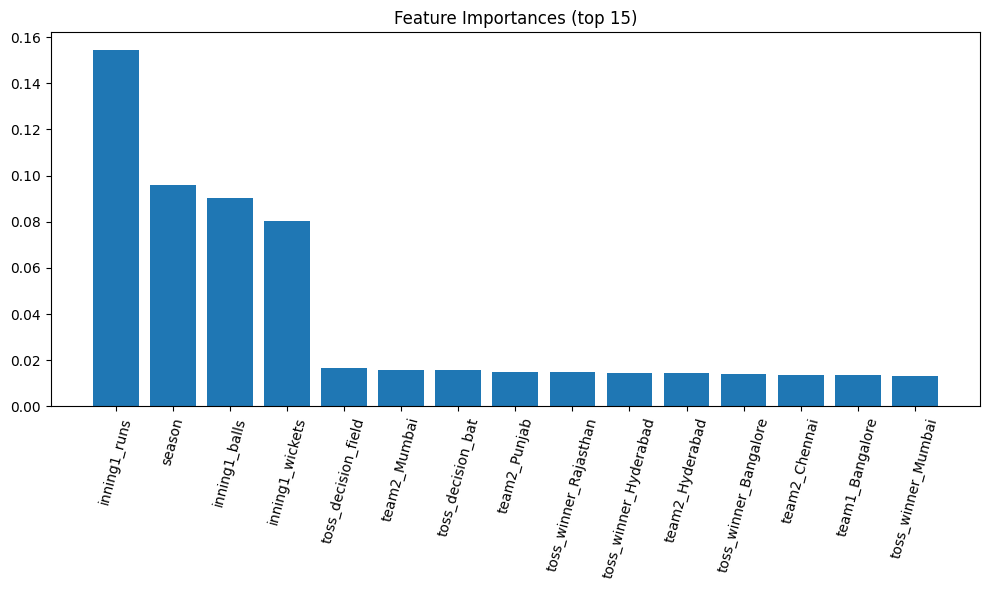

In [118]:
# Feature importance
importances = rf.feature_importances_
indices = importances.argsort()[::-1]
feature_names = X.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importances (top 15)")
plt.bar(range(15), importances[indices][:15], align="center")
plt.xticks(range(15), [feature_names[i] for i in indices[:15]], rotation=75)
plt.tight_layout()
plt.show()


                precision  recall  f1-score  support
Home_team_lost      0.619   0.612     0.615   85.000
Home_team_win       0.641   0.648     0.645   91.000
accuracy            0.631   0.631     0.631    0.631
macro avg           0.630   0.630     0.630  176.000
weighted avg        0.631   0.631     0.631  176.000


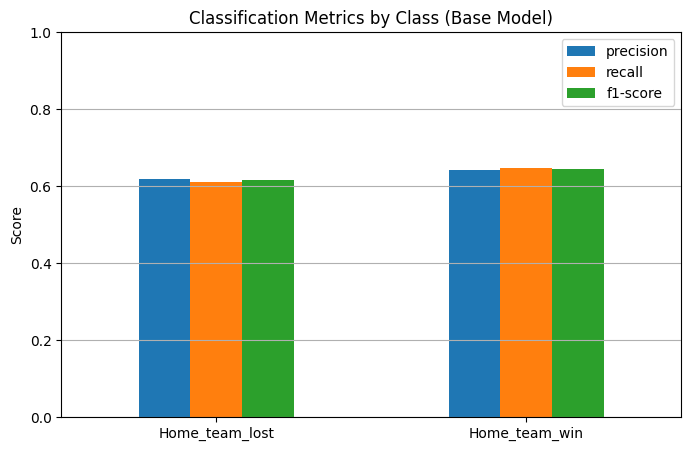

In [119]:
#Classification report
report = classification_report(y_test, y_pred, target_names=['Home_team_lost', 'Home_team_win'], output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.round(3)
# Show as table
print(report_df)
report_df

plot_df = report_df.loc[['Home_team_lost', 'Home_team_win'], ['precision', 'recall', 'f1-score']]
plot_df.plot(kind='bar', figsize=(8, 5))
plt.title('Classification Metrics by Class (Base Model)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



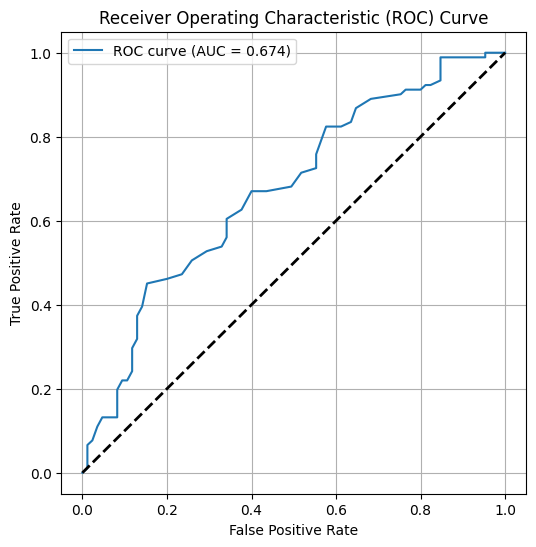

In [120]:
# Probabilities for the positive class (team1_win, which is 1)
y_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid(True)
plt.show()

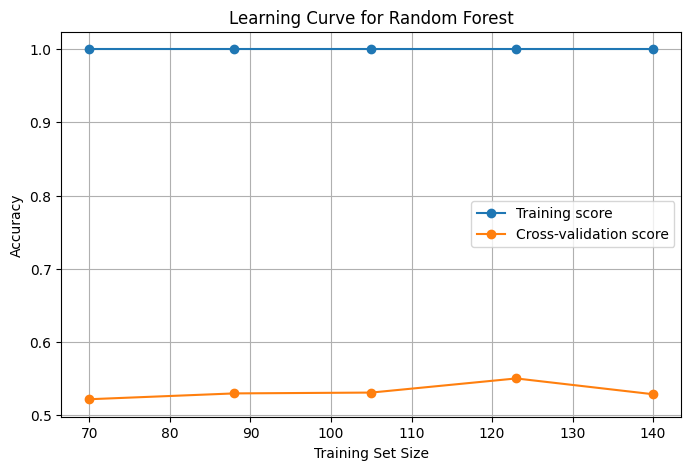

In [121]:
#Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(random_state=42),
    X, y,
    train_sizes=np.linspace(0.1, 0.2, 5),
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
plt.title("Learning Curve for Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


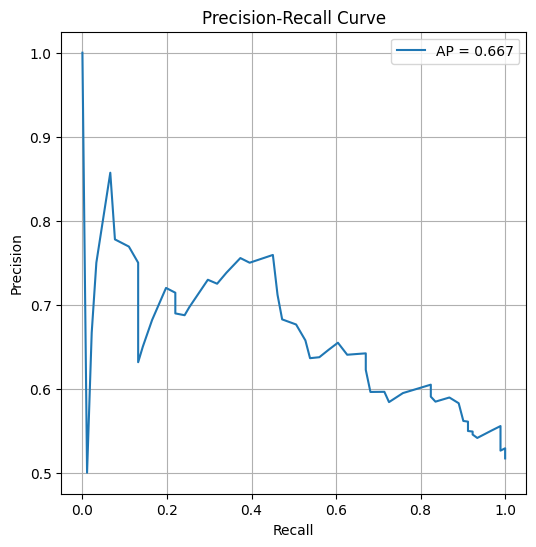

In [122]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(6,6))
plt.plot(recall, precision, label=f"AP = {ap:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

#### Hyper-parameter tuning RF binary approach model 


In [123]:
test_sizes = [0.2]
split_results = []

# Define a small parameter grid for quick search (expand for serious tuning!)
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    # Baseline model
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Test size: {test_size:.2f}, Baseline Accuracy: {acc:.4f}")

    # Hyperparameter tuning
    grid = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid,
        cv=5,           
        n_jobs=-1,
        verbose=0
    )
    grid.fit(X_train, y_train)
    y_pred_tuned = grid.predict(X_test)
    acc_tuned = accuracy_score(y_test, y_pred_tuned)
    print(f"Test size: {test_size:.2f}, Tuned Accuracy: {acc_tuned:.4f}, Best Params: {grid.best_params_}")

    split_results.append((test_size, acc, acc_tuned, grid.best_params_))


Test size: 0.20, Baseline Accuracy: 0.6307
Test size: 0.20, Tuned Accuracy: 0.6364, Best Params: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [124]:
# Get best model from GridSearchCV
best_rf = grid.best_estimator_
print(f"Best parameters: {grid.best_params_}")

# Predict on test set
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

Best parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


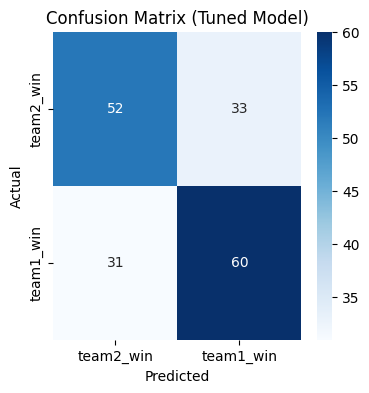

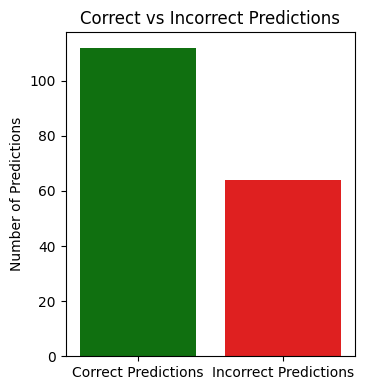

In [125]:
# Confusion Matrix and Bar Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['team2_win', 'team1_win'], 
            yticklabels=['team2_win', 'team1_win'])
plt.title("Confusion Matrix (Tuned Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

tn, fp, fn, tp = cm.ravel()
correct = tp + tn
incorrect = fp + fn
# Plot bar chart
plt.figure(figsize=(3.75, 4))
sns.barplot(x=["Correct Predictions", "Incorrect Predictions"], y=[correct, incorrect], palette=["green", "red"])
plt.title("Correct vs Incorrect Predictions")
plt.ylabel("Number of Predictions")
plt.tight_layout()
plt.show()


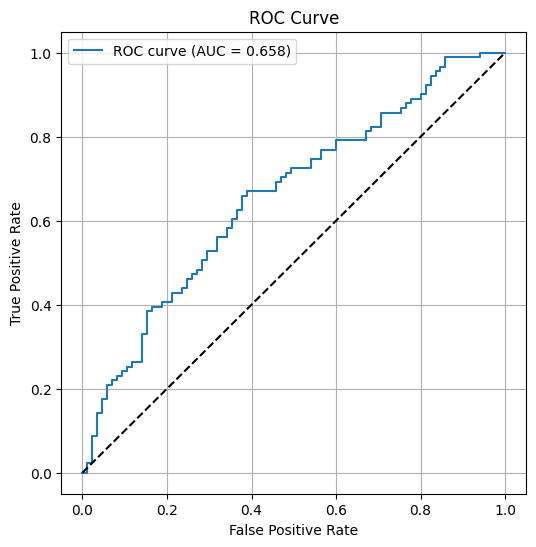

In [126]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


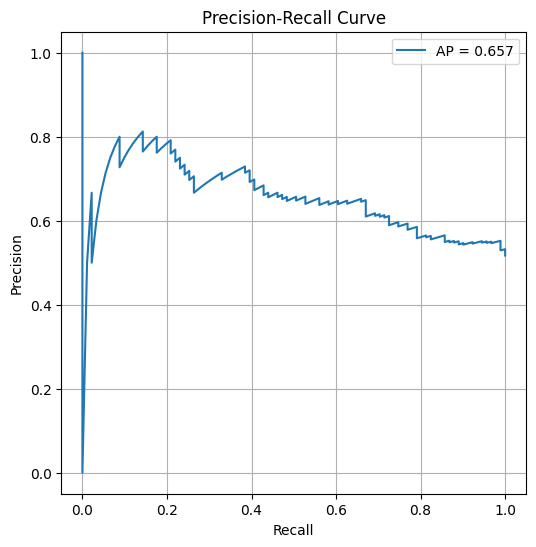

In [127]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)
plt.figure(figsize=(6,6))
plt.plot(recall, precision, label=f"AP = {ap:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

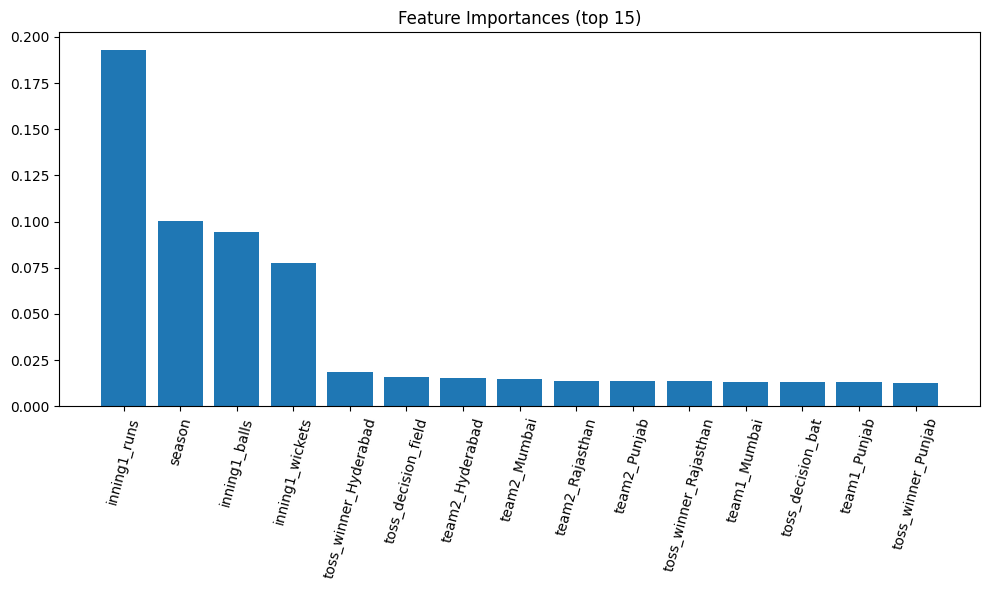

In [128]:
# Feature Importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_test.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importances (top 15)")
plt.bar(range(15), importances[indices][:15], align="center")
plt.xticks(range(15), [feature_names[i] for i in indices[:15]], rotation=75)
plt.tight_layout()
plt.show()

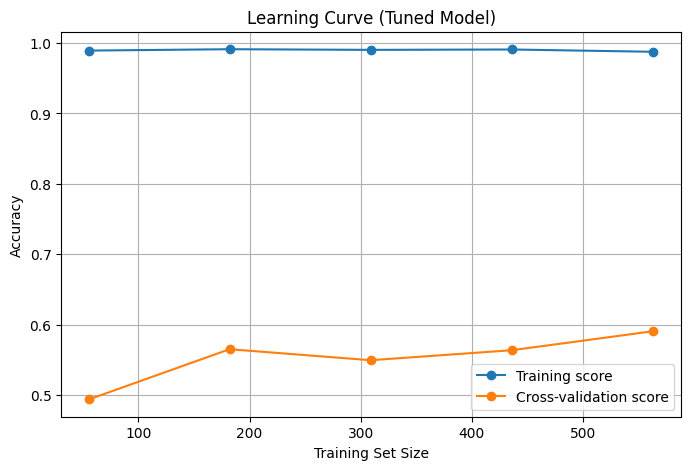

In [129]:
# Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='accuracy', n_jobs=-1, shuffle=True, random_state=42
)
plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label="Cross-validation score")
plt.title("Learning Curve (Tuned Model)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [130]:

# Classification Report as DataFrame
report = classification_report(y_test, y_pred, target_names=['team2_win', 'team1_win'], output_dict=True)
report_df = pd.DataFrame(report).transpose().round(3)
display(report_df)  



precision  recall  f1-score  support
team2_win         0.627   0.612     0.619   85.000
team1_win         0.645   0.659     0.652   91.000
accuracy          0.636   0.636     0.636    0.636
macro avg         0.636   0.636     0.636  176.000
weighted avg      0.636   0.636     0.636  176.000

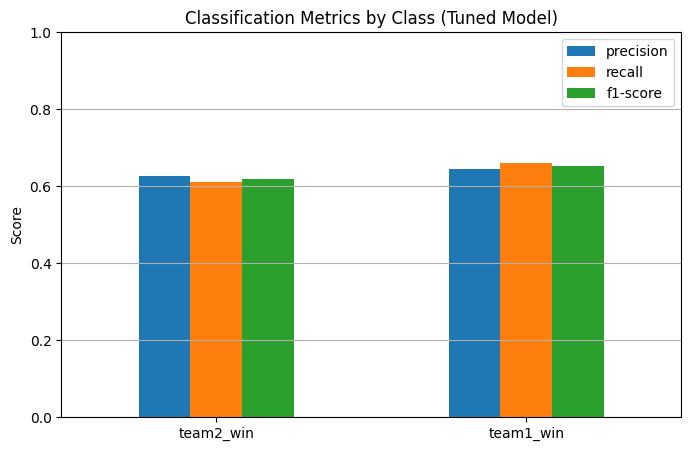

In [131]:
# Bar Plot of classification metrics
plot_df = report_df.loc[['team2_win', 'team1_win'], ['precision', 'recall', 'f1-score']]
plot_df.plot(kind='bar', figsize=(8, 5))
plt.title('Classification Metrics by Class (Tuned Model)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

#### Comparision between Untuned and Tuned model

=== Base Model Metrics ===
Accuracy: 0.6306818181818182
ROC AUC: 0.6737556561085973
              precision    recall  f1-score   support

   team2_win       0.62      0.61      0.62        85
   team1_win       0.64      0.65      0.64        91

    accuracy                           0.63       176
   macro avg       0.63      0.63      0.63       176
weighted avg       0.63      0.63      0.63       176


=== Tuned Model Metrics ===
Accuracy: 0.6363636363636364
ROC AUC: 0.6577892695539754
              precision    recall  f1-score   support

   team2_win       0.63      0.61      0.62        85
   team1_win       0.65      0.66      0.65        91

    accuracy                           0.64       176
   macro avg       0.64      0.64      0.64       176
weighted avg       0.64      0.64      0.64       176



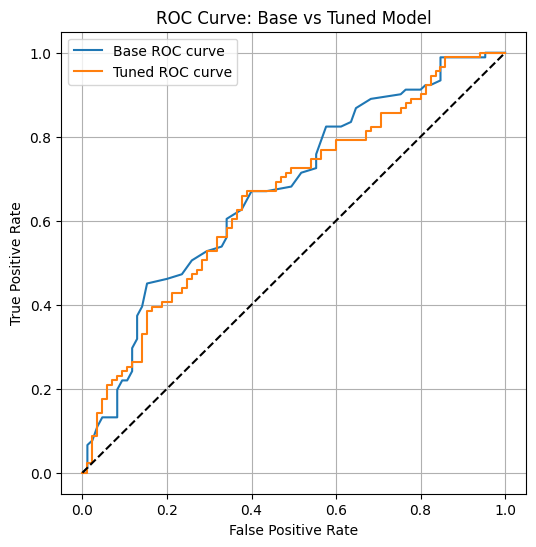

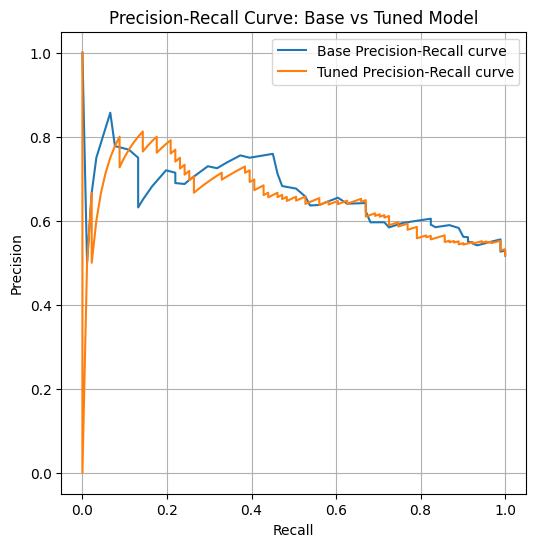

In [132]:
base_rf = RandomForestClassifier(random_state=42)
base_rf.fit(X_train, y_train)
y_pred_base = base_rf.predict(X_test)
y_proba_base = base_rf.predict_proba(X_test)[:, 1]


tuned_rf = grid.best_estimator_
y_pred_tuned = tuned_rf.predict(X_test)
y_proba_tuned = tuned_rf.predict_proba(X_test)[:, 1]

print("=== Base Model Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred_base))
print("ROC AUC:", roc_auc_score(y_test, y_proba_base))
print(classification_report(y_test, y_pred_base, target_names=['team2_win', 'team1_win']))

print("\n=== Tuned Model Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("ROC AUC:", roc_auc_score(y_test, y_proba_tuned))
print(classification_report(y_test, y_pred_tuned, target_names=['team2_win', 'team1_win']))

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_base, tpr_base, _ = roc_curve(y_test, y_proba_base)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_proba_tuned)

plt.figure(figsize=(6,6))
plt.plot(fpr_base, tpr_base, label='Base ROC curve')
plt.plot(fpr_tuned, tpr_tuned, label='Tuned ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Base vs Tuned Model")
plt.legend()
plt.grid(True)
plt.show()

precision_base, recall_base, _ = precision_recall_curve(y_test, y_proba_base)
precision_tuned, recall_tuned, _ = precision_recall_curve(y_test, y_proba_tuned)
plt.figure(figsize=(6,6))
plt.plot(recall_base, precision_base, label='Base Precision-Recall curve')
plt.plot(recall_tuned, precision_tuned, label='Tuned Precision-Recall curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve: Base vs Tuned Model")
plt.legend()
plt.grid(True)
plt.show()



In [133]:
print("Best parameters found by GridSearchCV:")
print(grid.best_params_)


print("\nBest Random Forest model:")
print(grid.best_estimator_)

Best parameters found by GridSearchCV:
{'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Best Random Forest model:
RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)


#### Cross Validation Report - to verify the model accuracy


In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Baseline model
baseline_rf = RandomForestClassifier(random_state=42)
cv_scores_baseline = cross_val_score(baseline_rf, X, y, cv=5, scoring='accuracy')
print("Baseline Model Cross-Validated Accuracy: {:.2f}% ± {:.2f}%".format(
    cv_scores_baseline.mean() * 100, cv_scores_baseline.std() * 100))

# Tuned model from GridSearchCV
tuned_rf = grid.best_estimator_
cv_scores_tuned = cross_val_score(tuned_rf, X, y, cv=5, scoring='accuracy')
print("Tuned Model Cross-Validated Accuracy: {:.2f}% ± {:.2f}%".format(
    cv_scores_tuned.mean() * 100, cv_scores_tuned.std() * 100))


Baseline Model Cross-Validated Accuracy: 52.95% ± 7.34%
Tuned Model Cross-Validated Accuracy: 53.52% ± 7.49%
